<a href="https://colab.research.google.com/github/qldduong/AACUW_Team6/blob/main/Seattle_Portland_Time_Series_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date                        0
City                        0
Spending Group              0
Spending Subgroup           0
Treasury Spend Subgroup     0
Treausry Spend Group       66
Amount                      0
dtype: int64

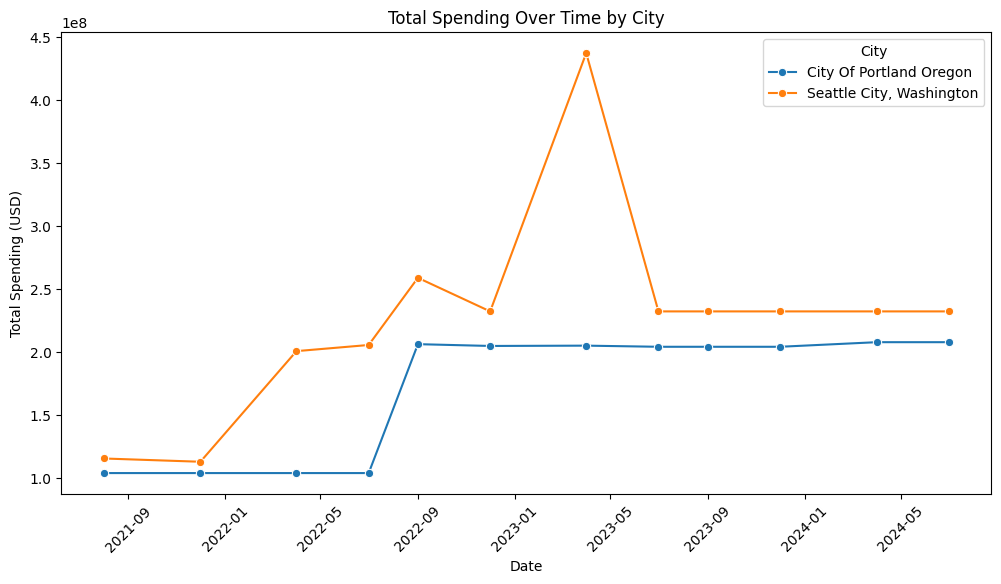

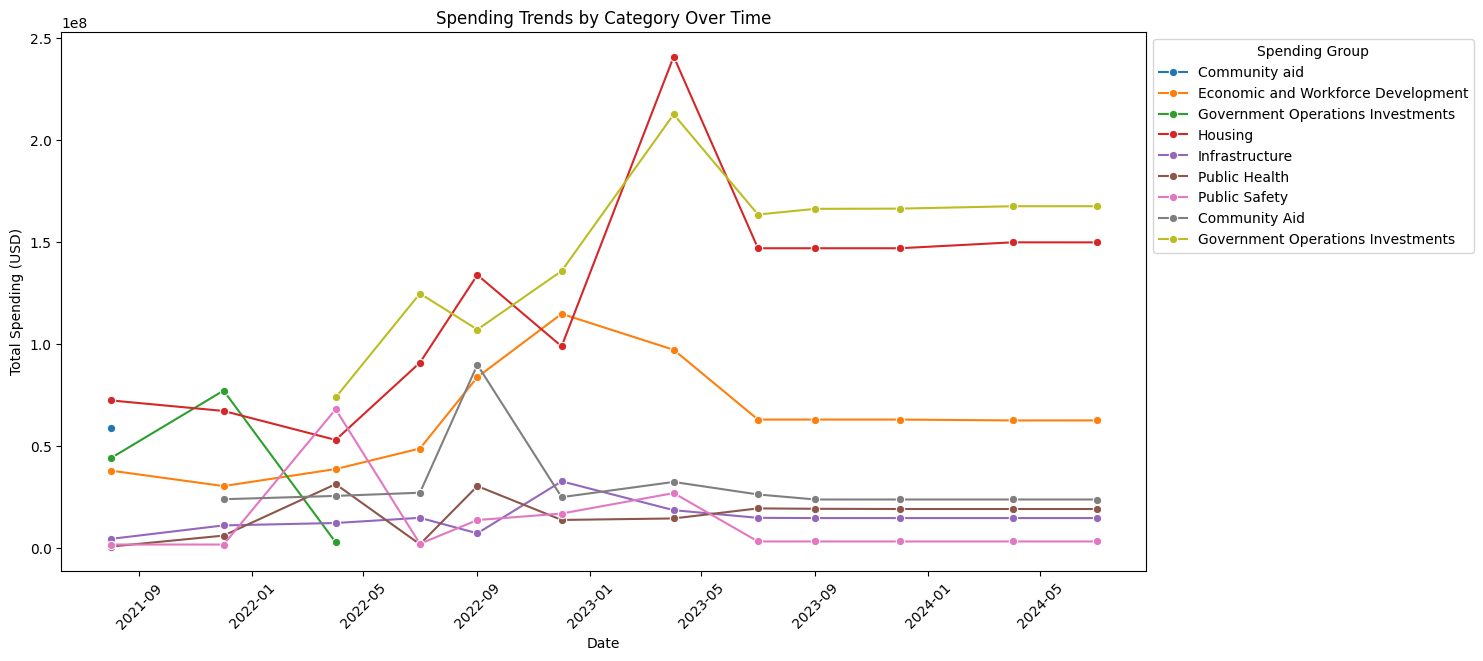

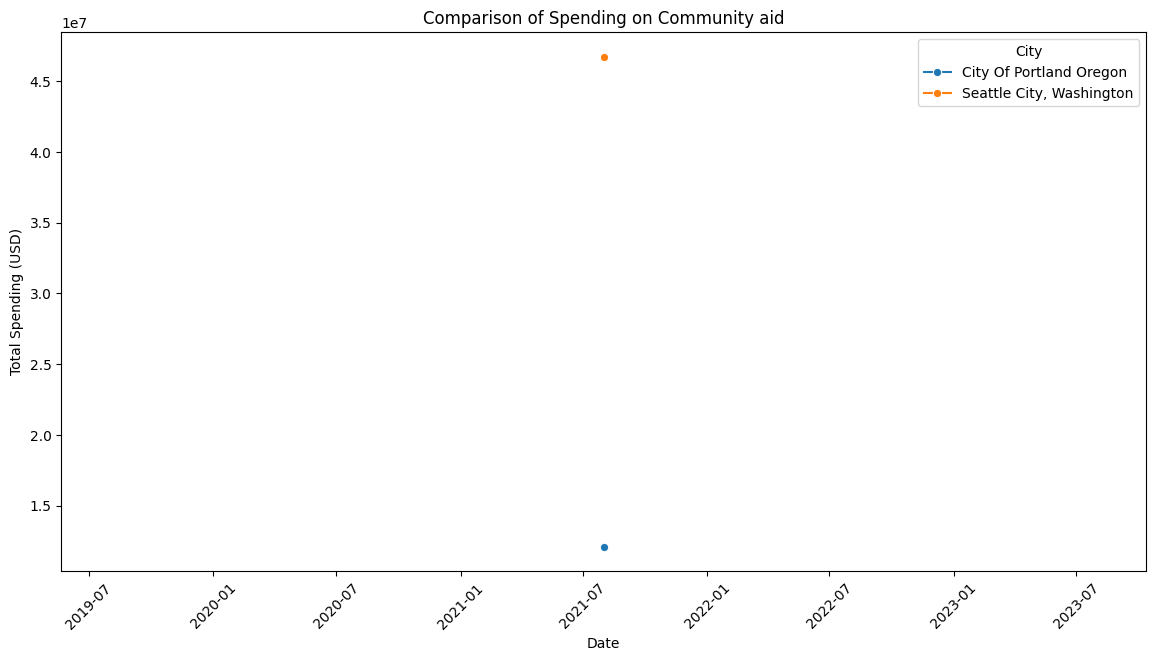

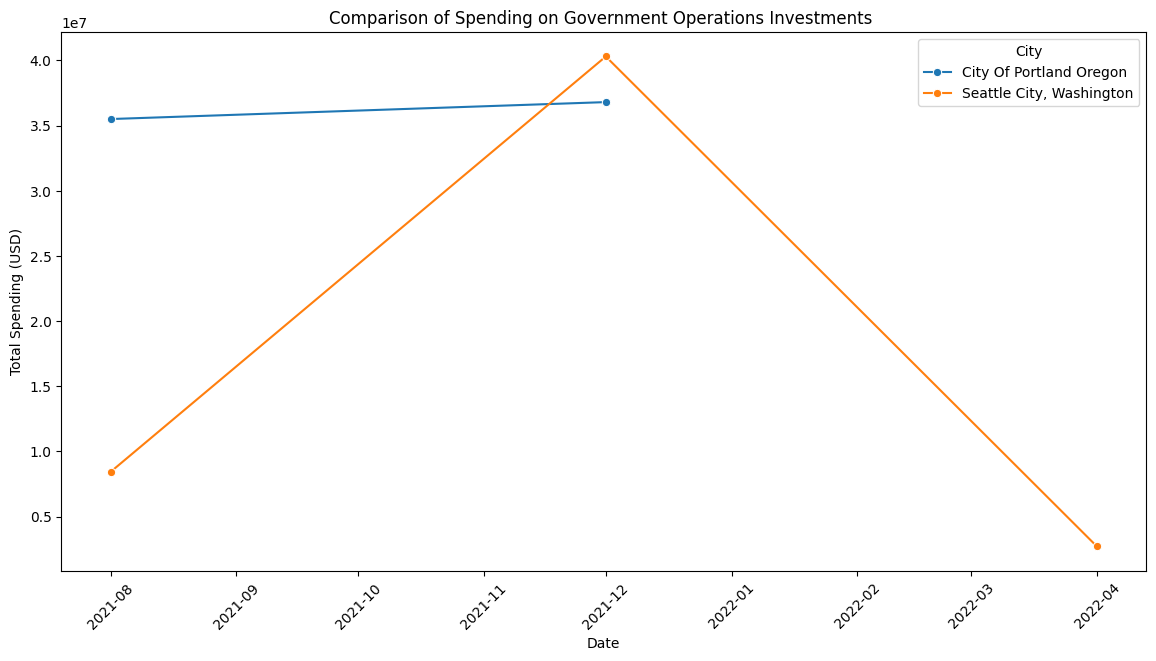

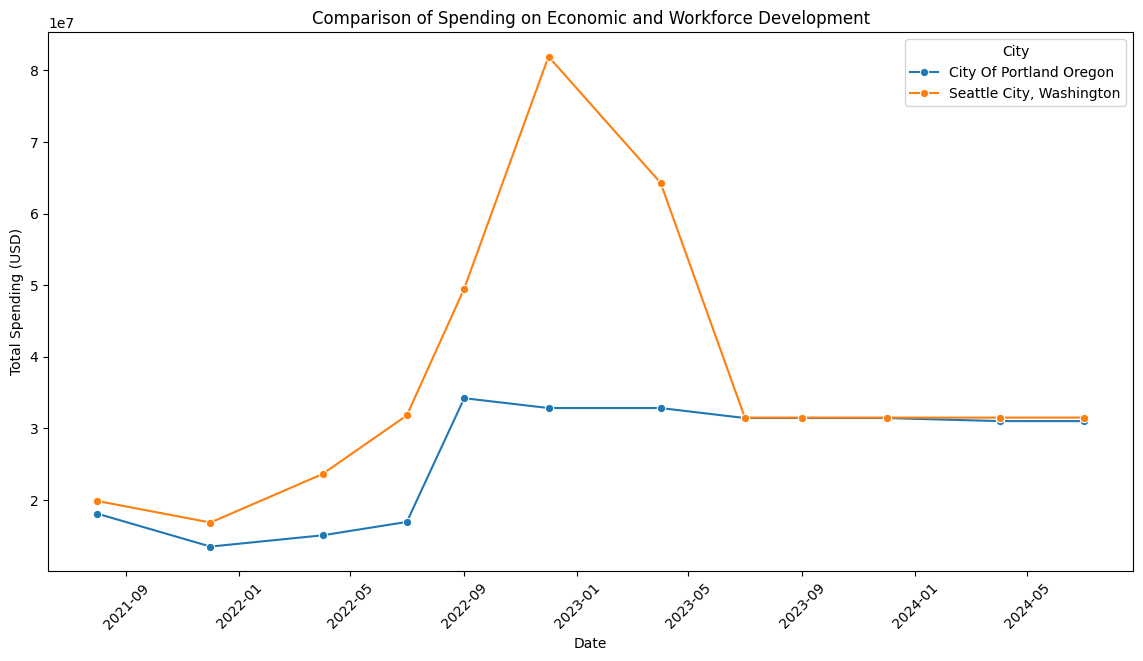

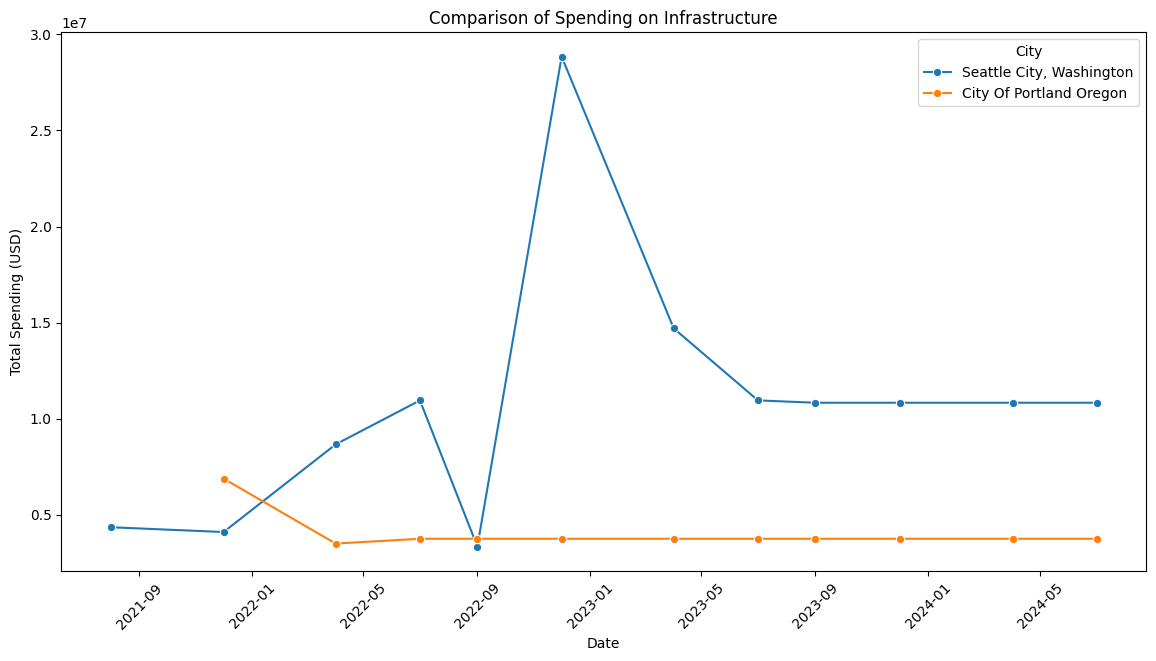

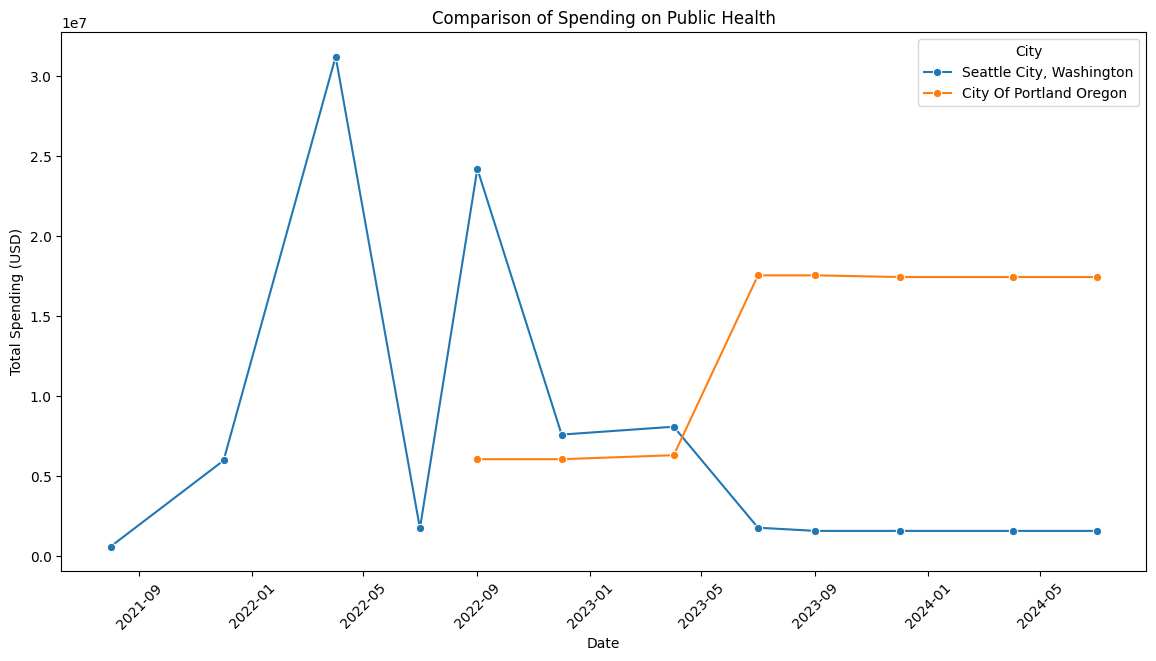

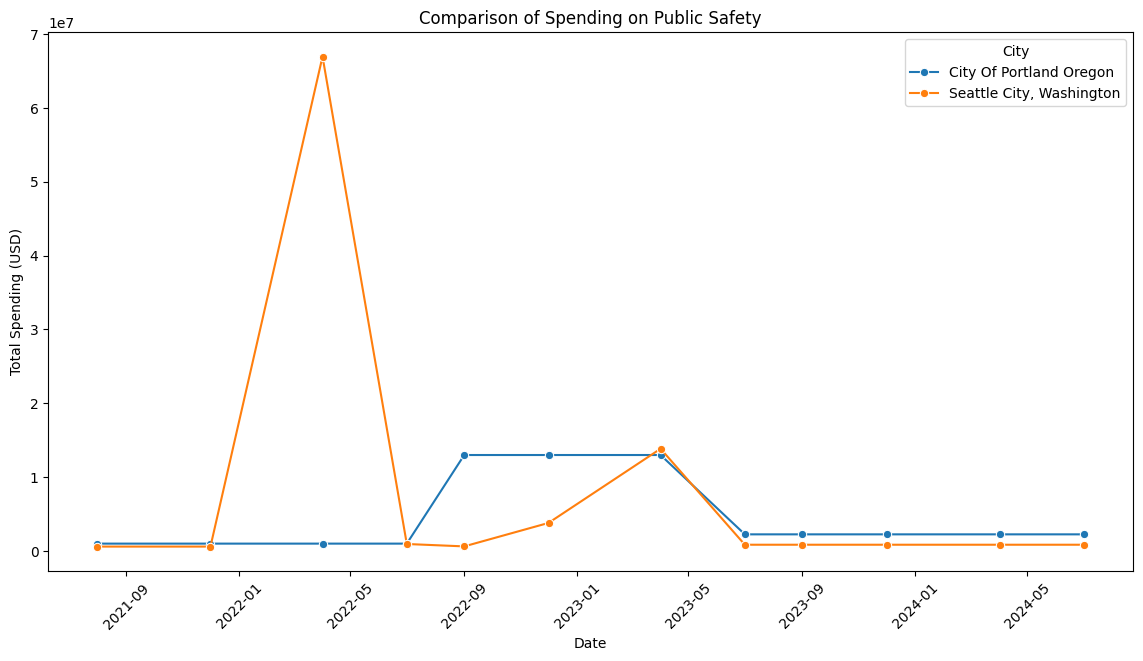

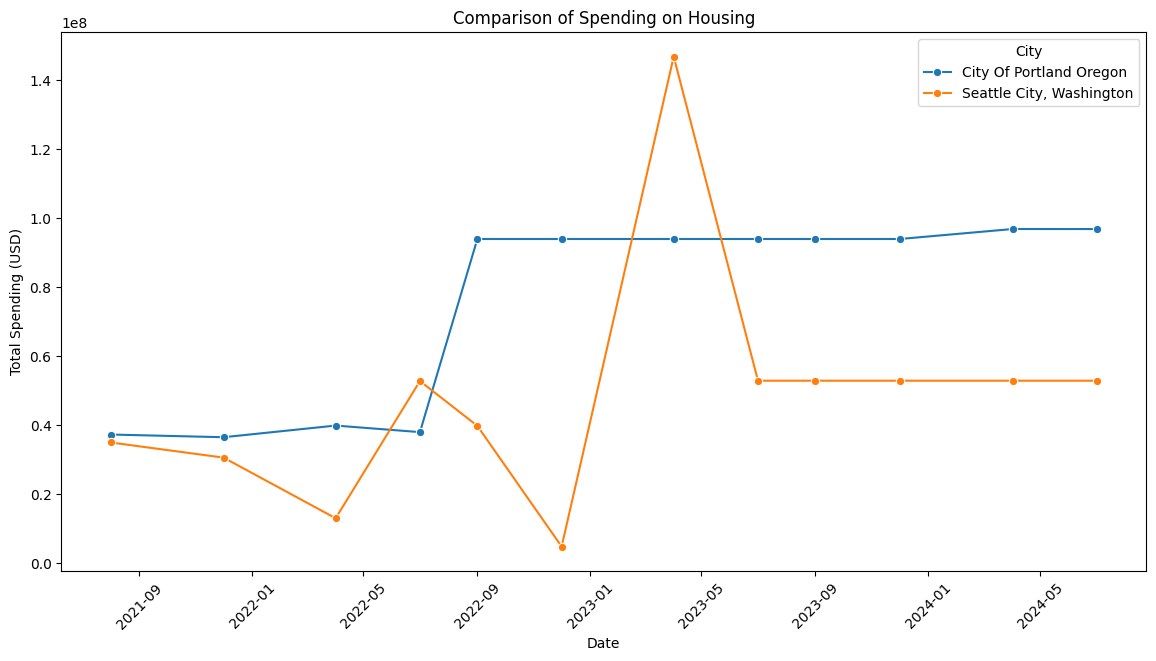

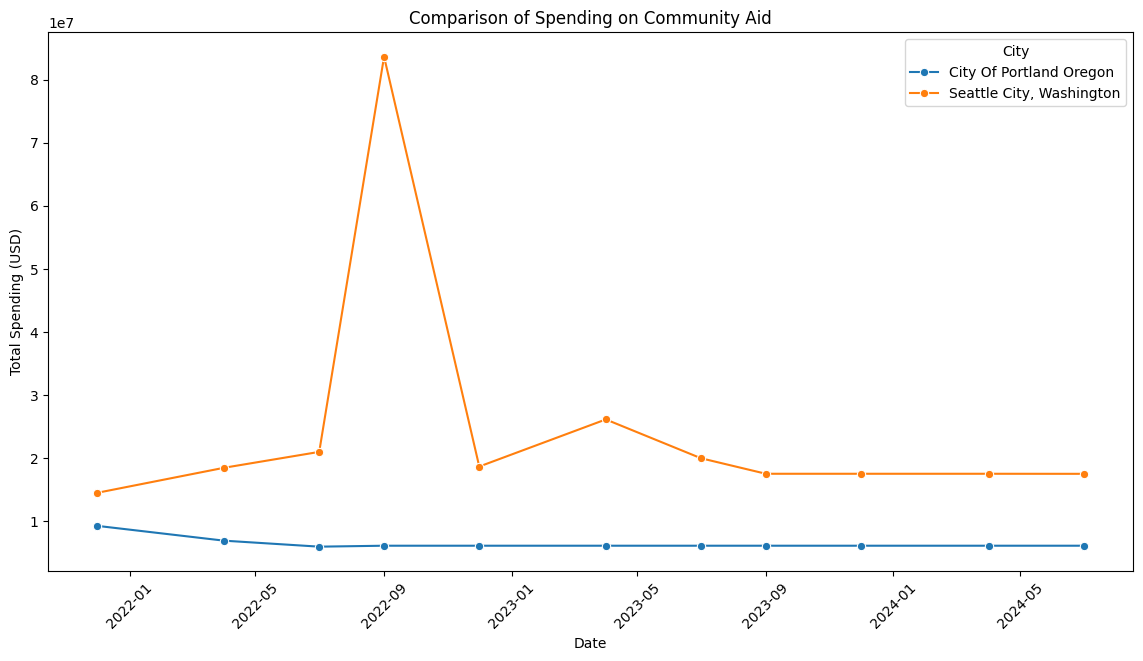

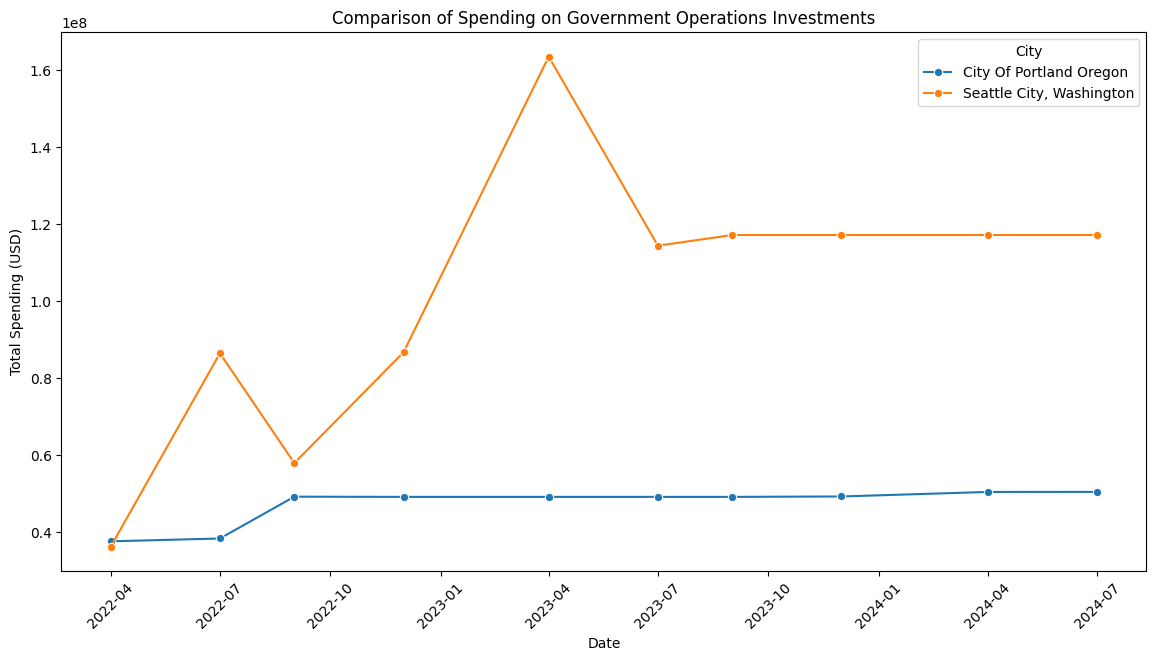

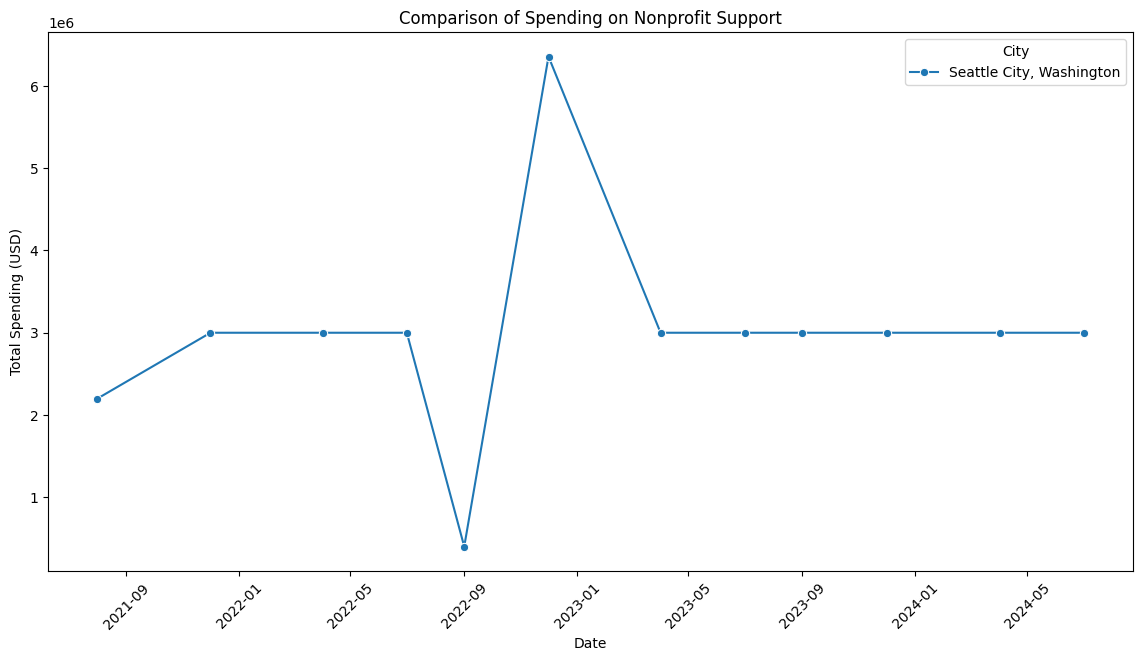

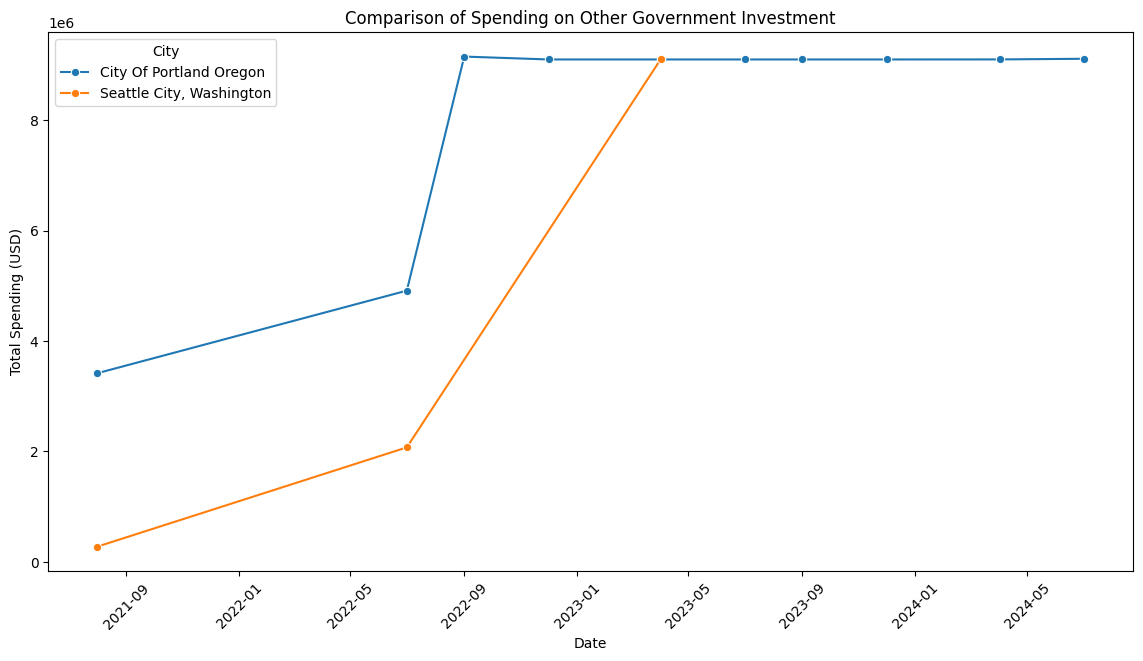

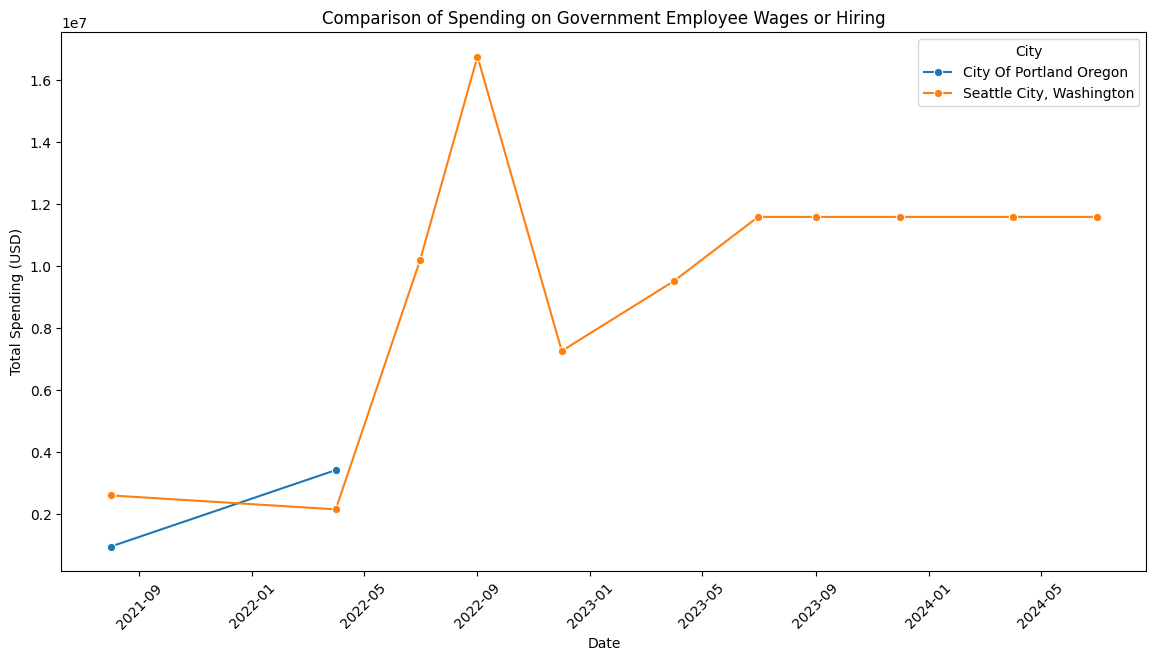

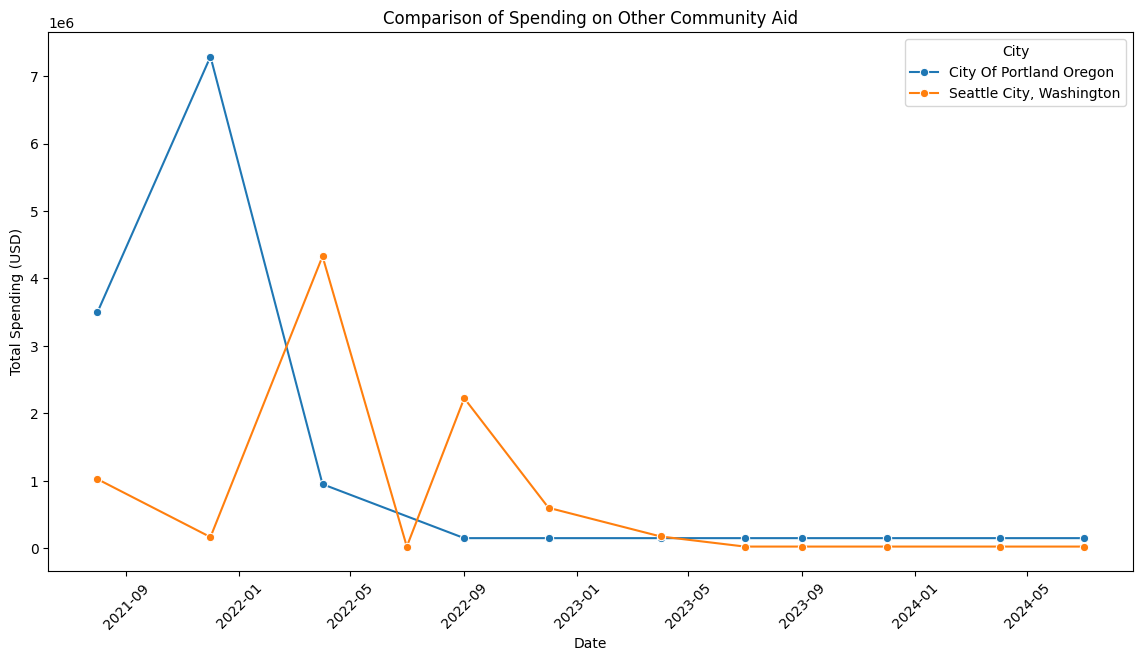

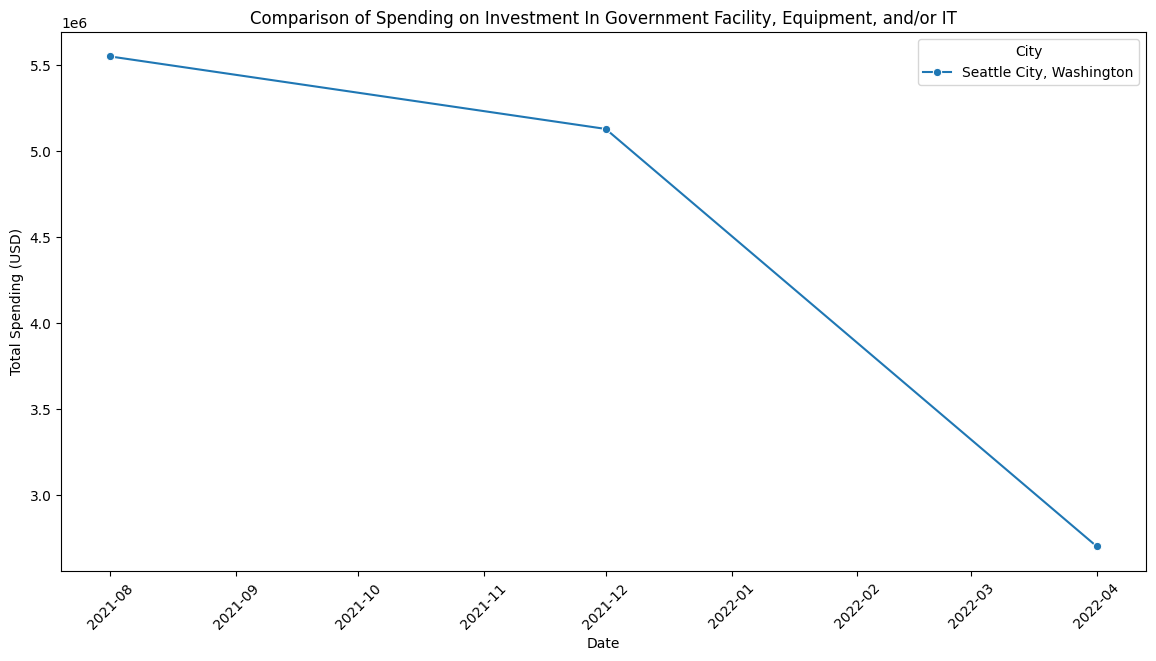

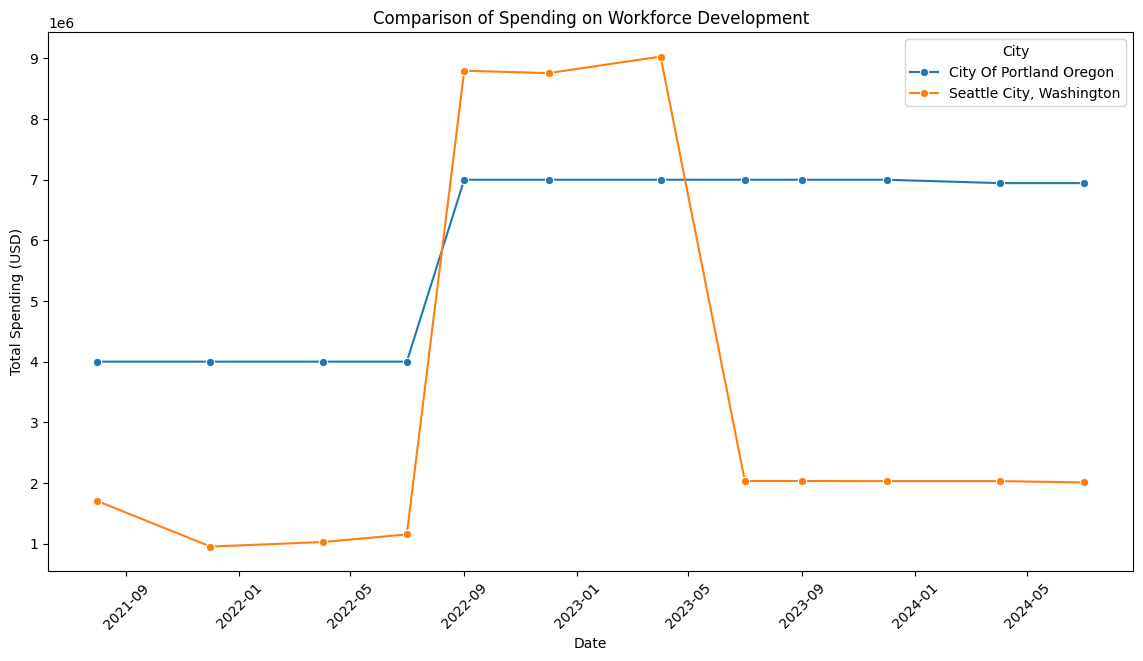

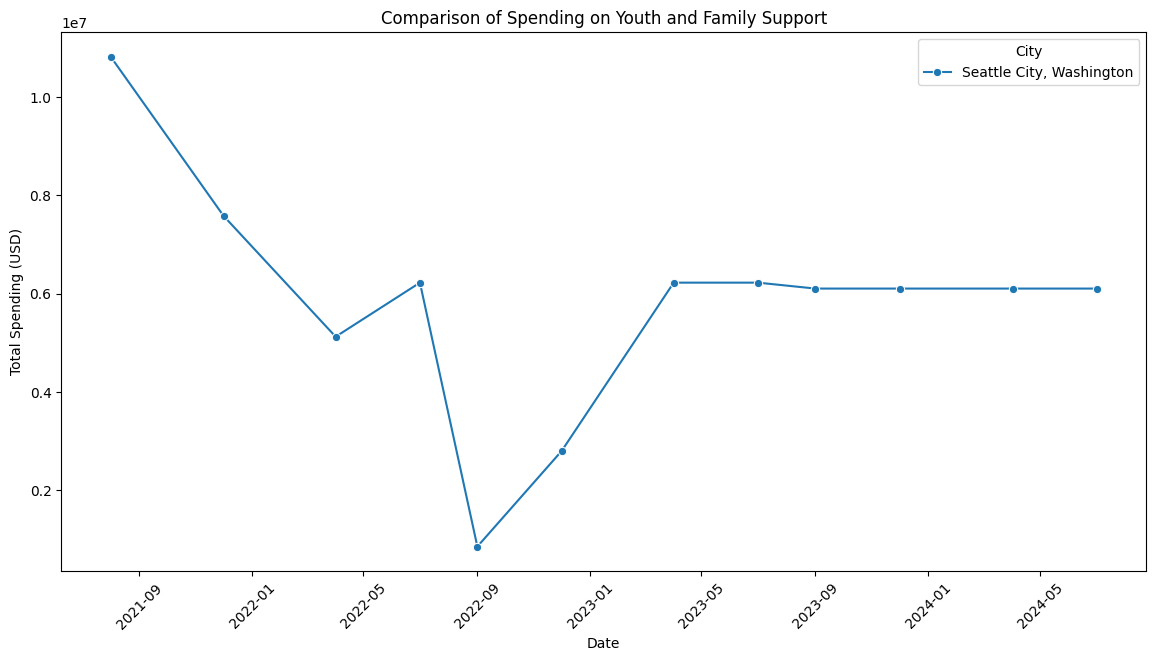

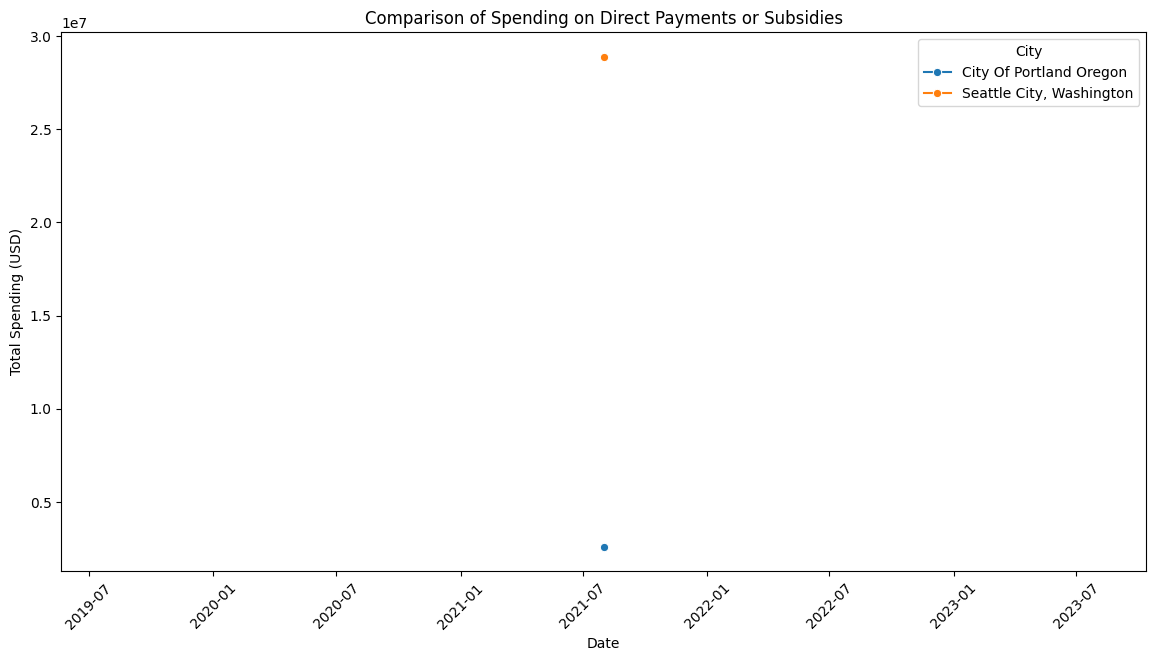

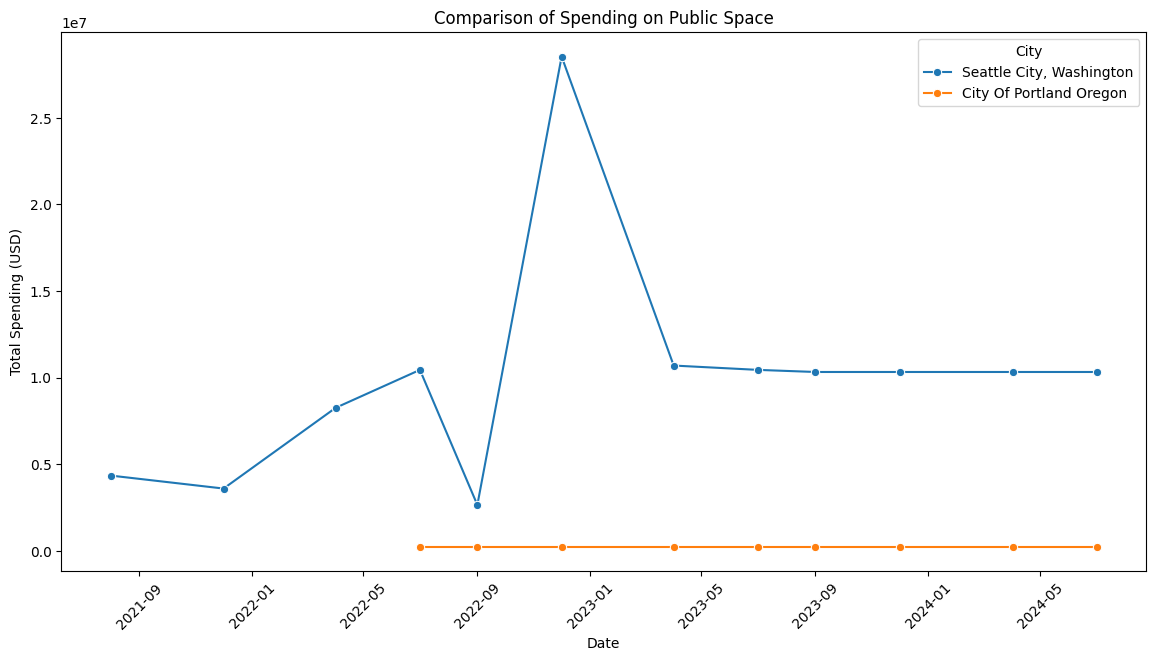

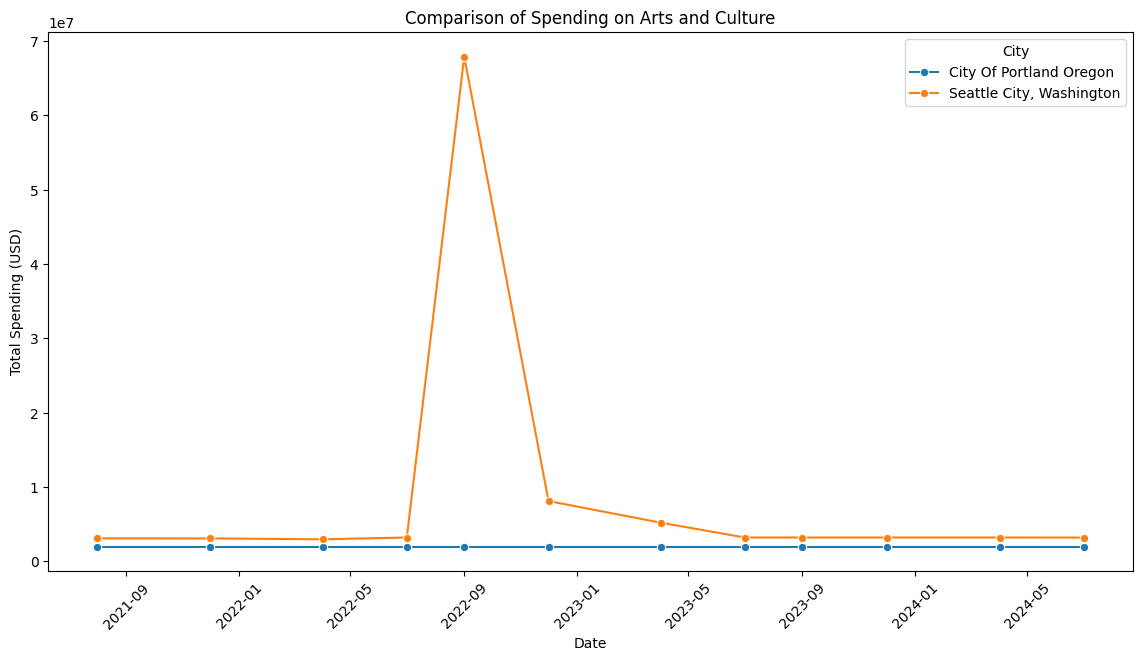

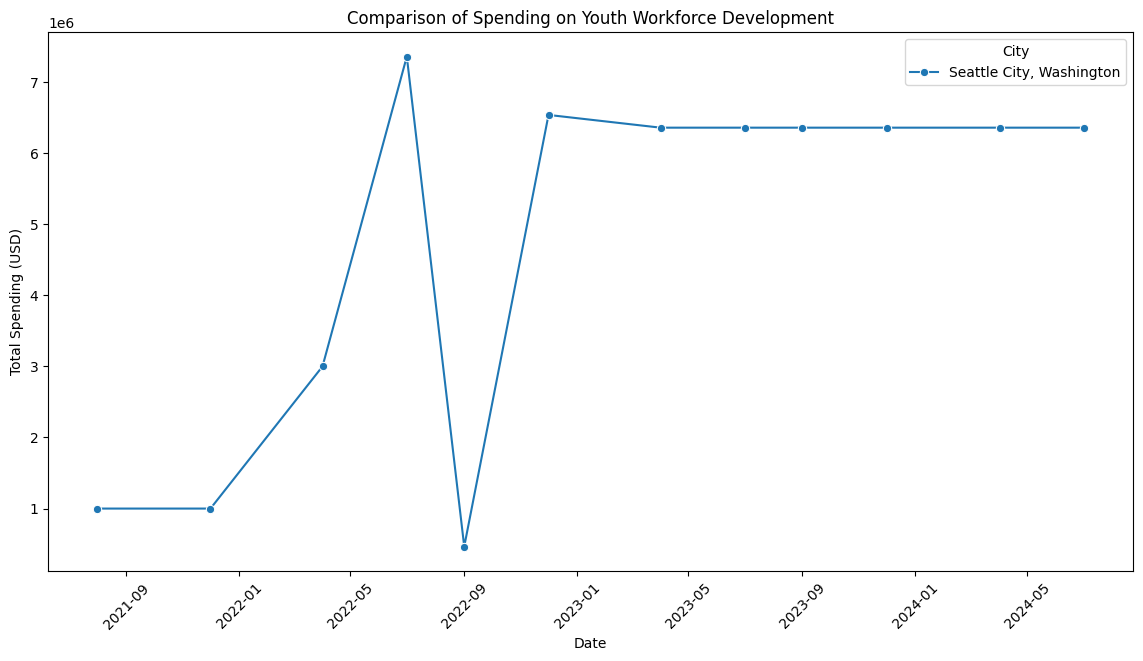

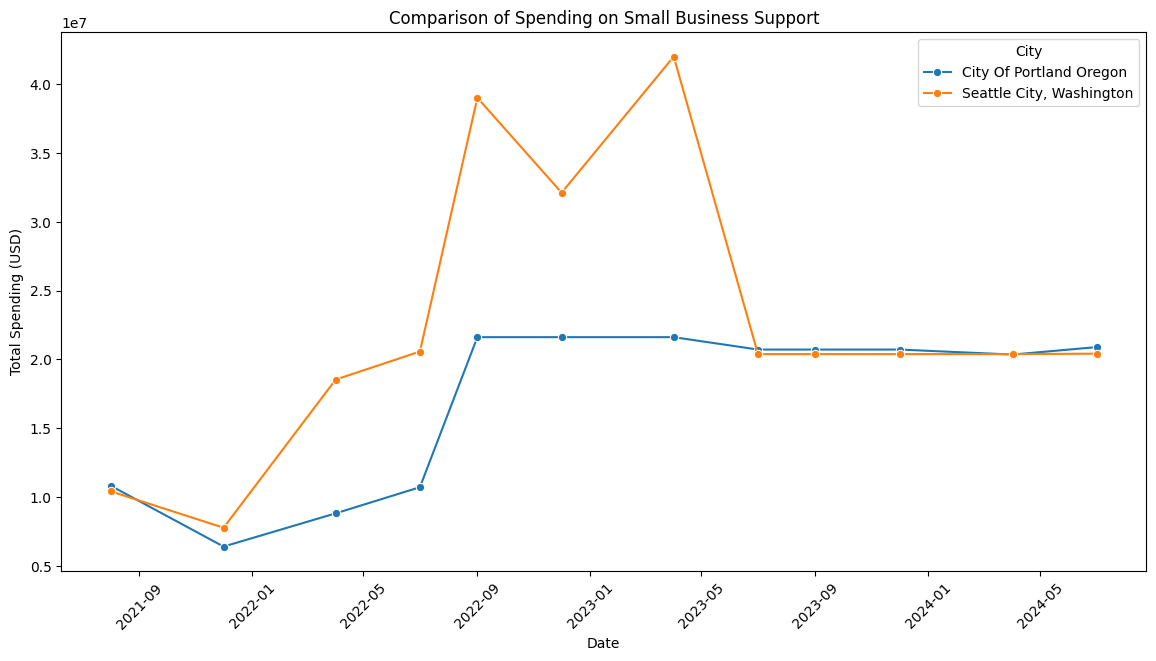

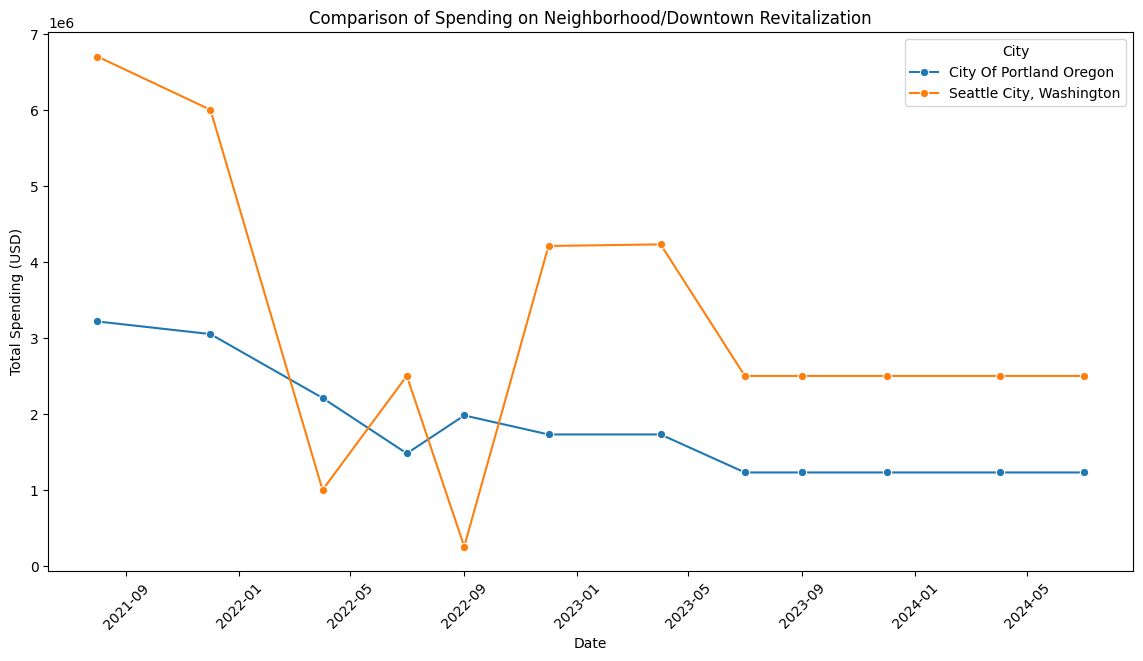

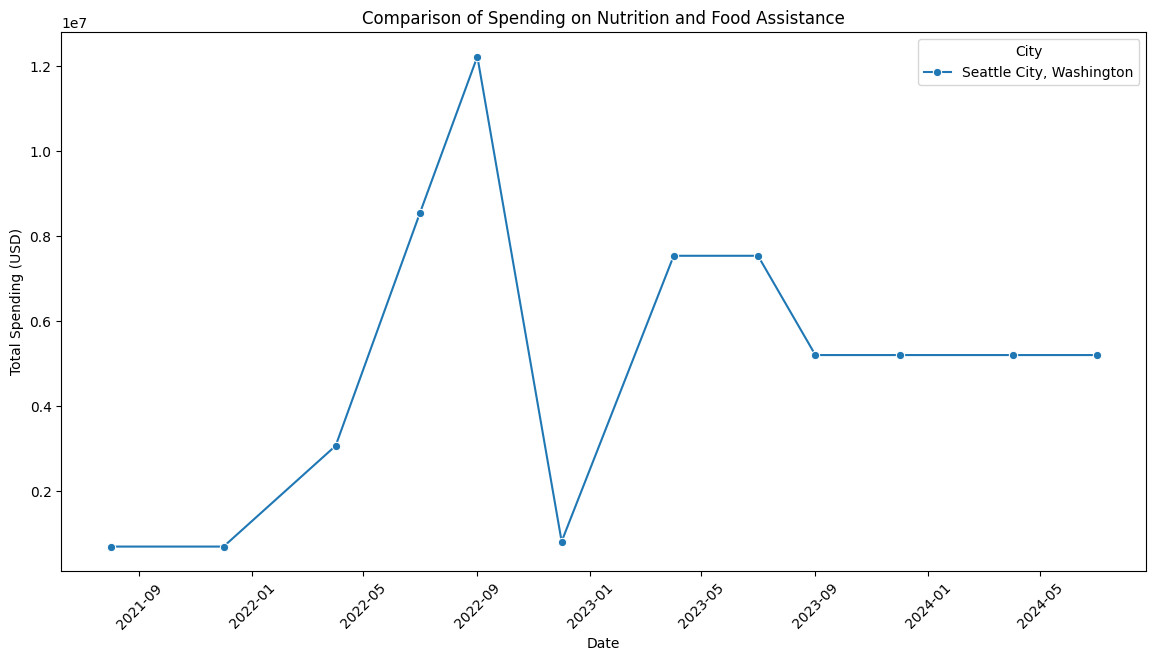

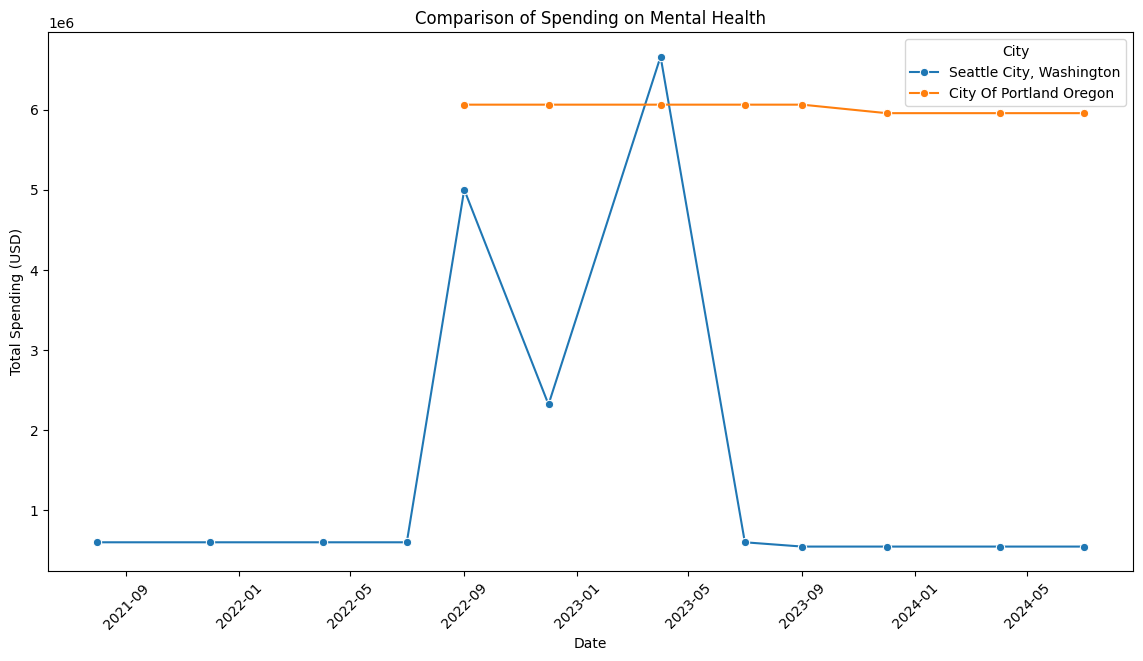

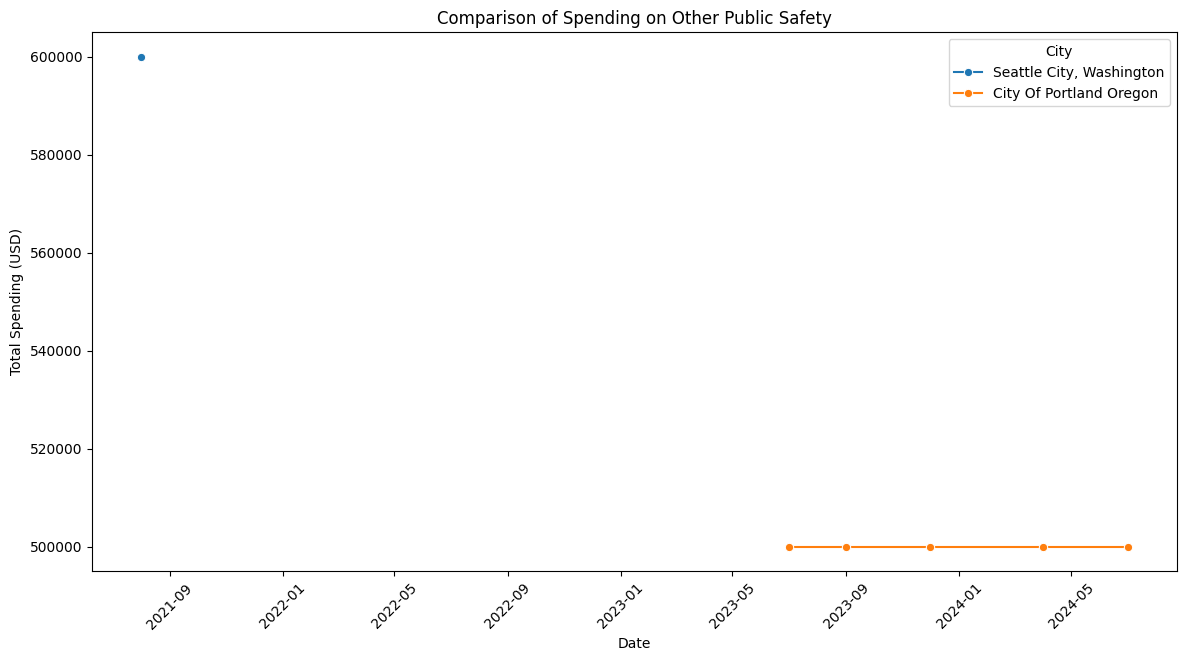

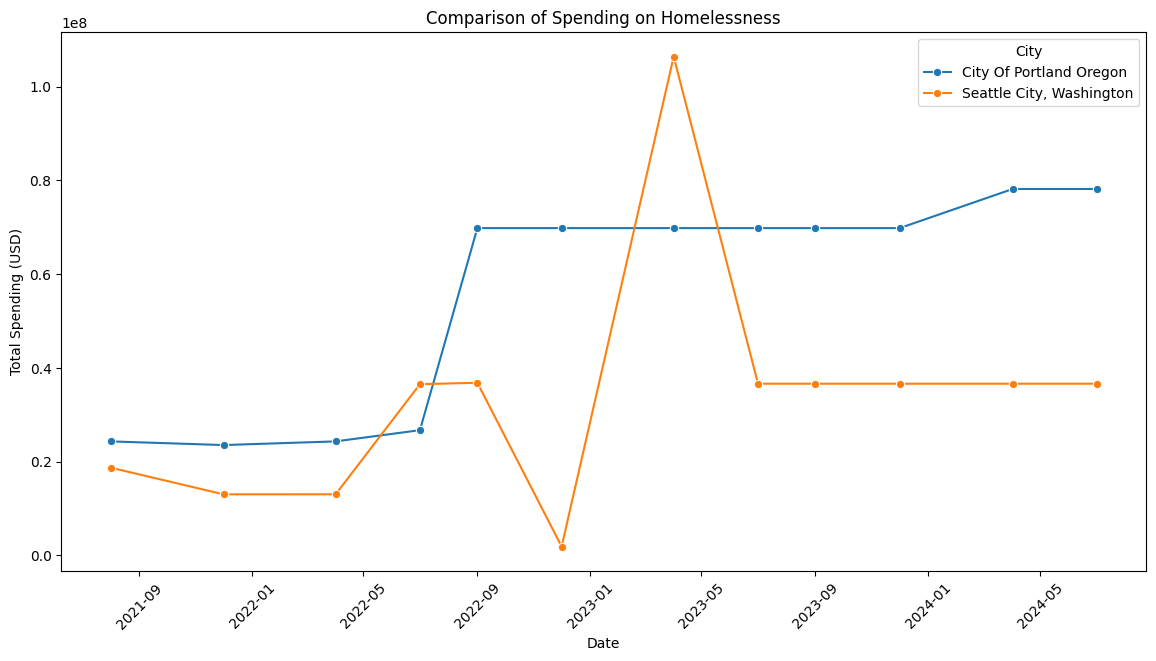

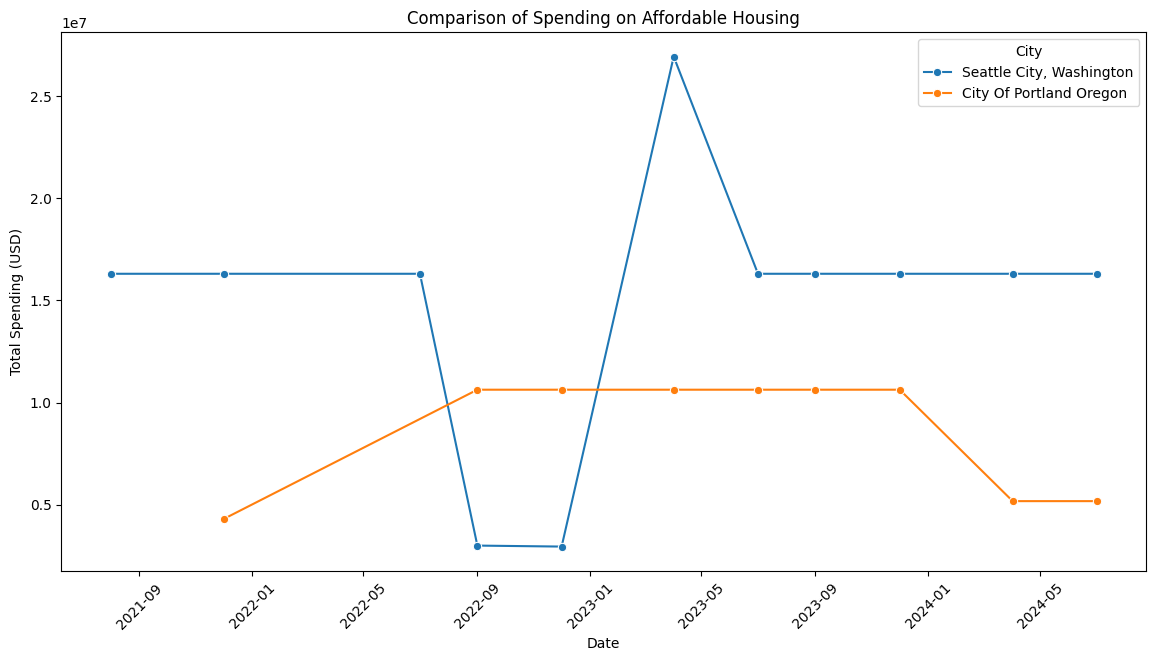

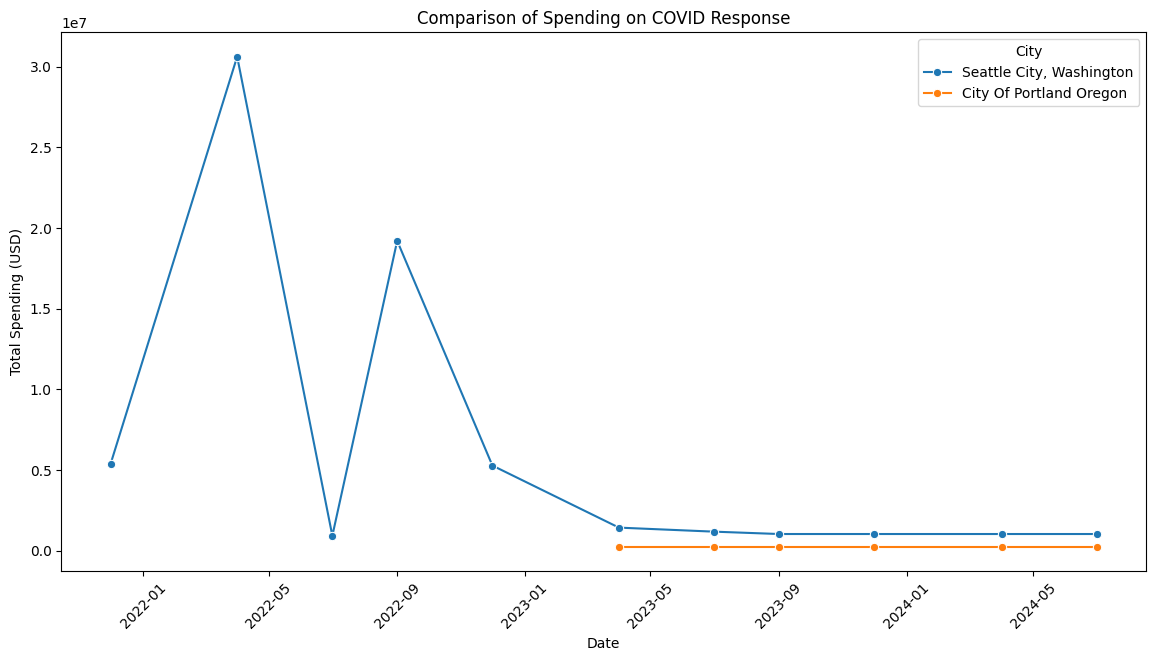

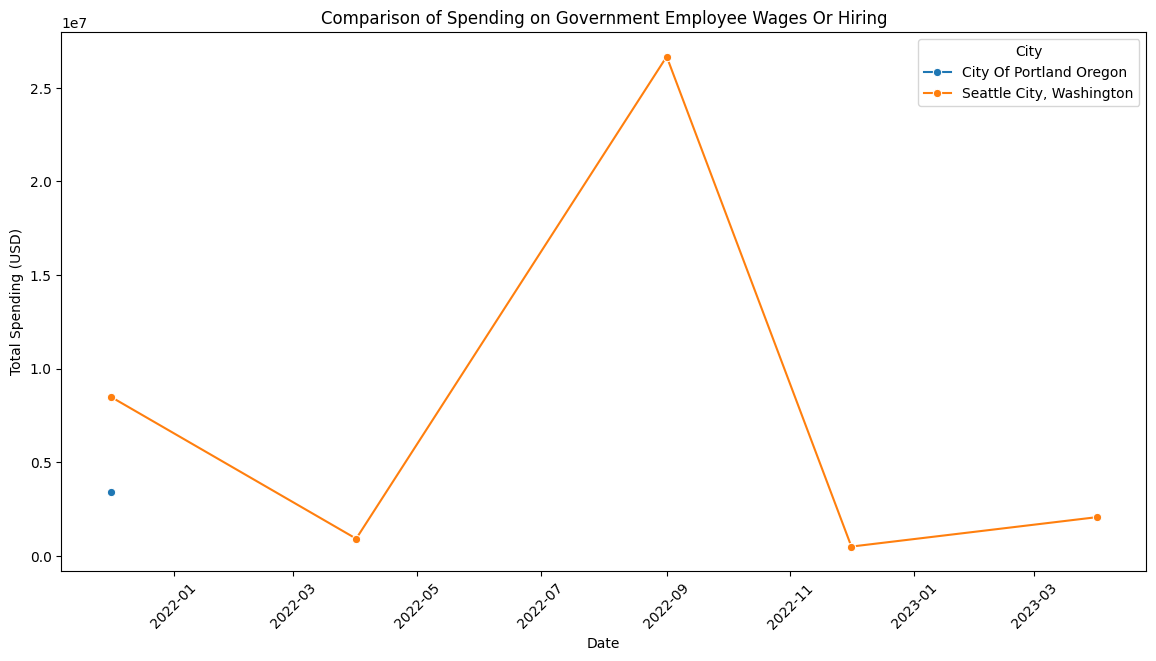

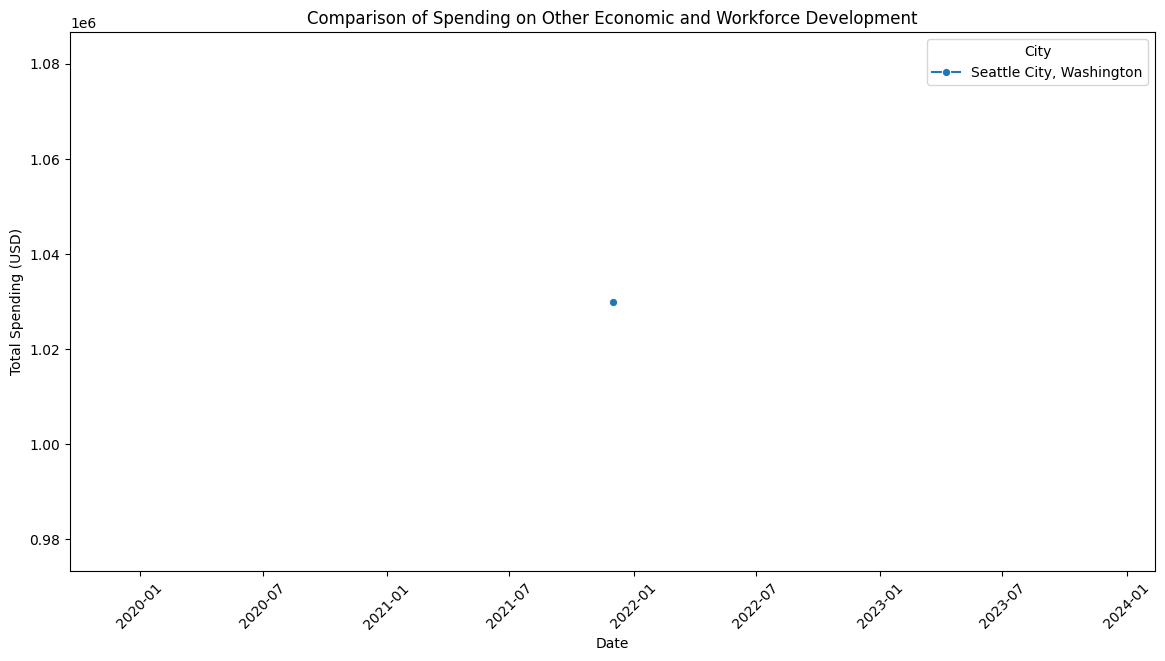

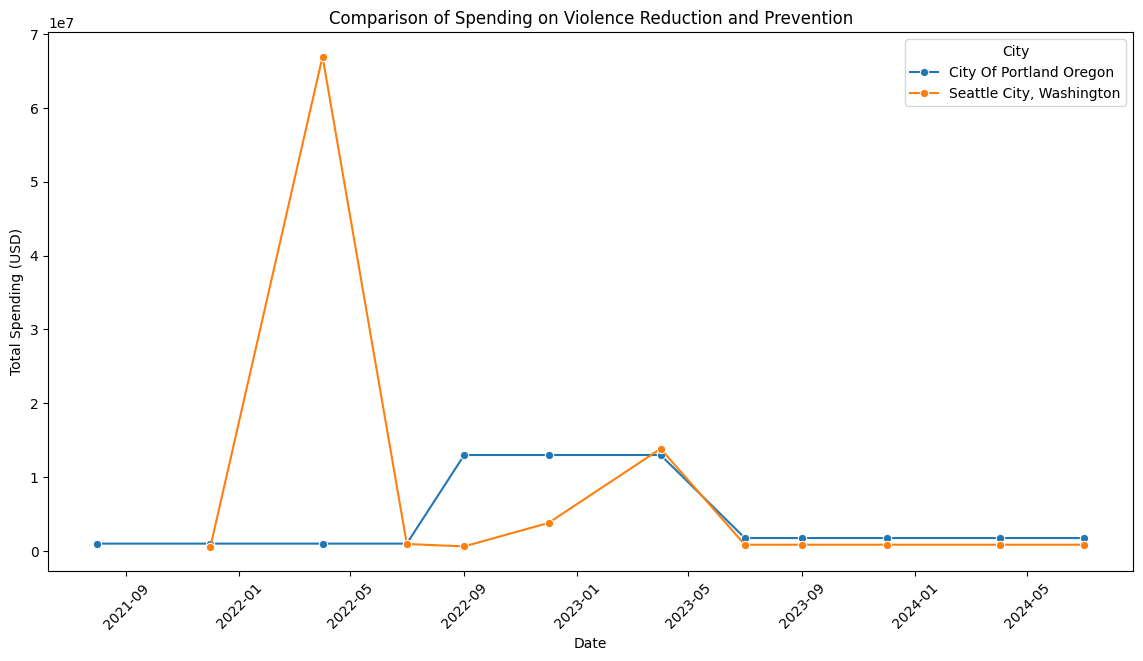

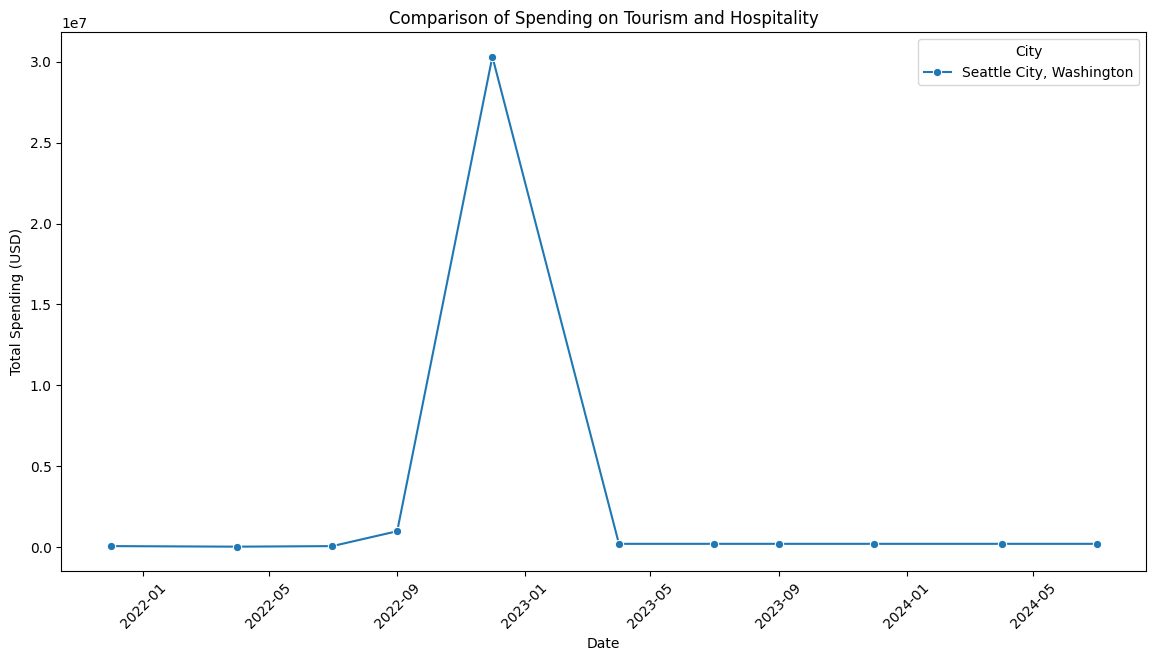

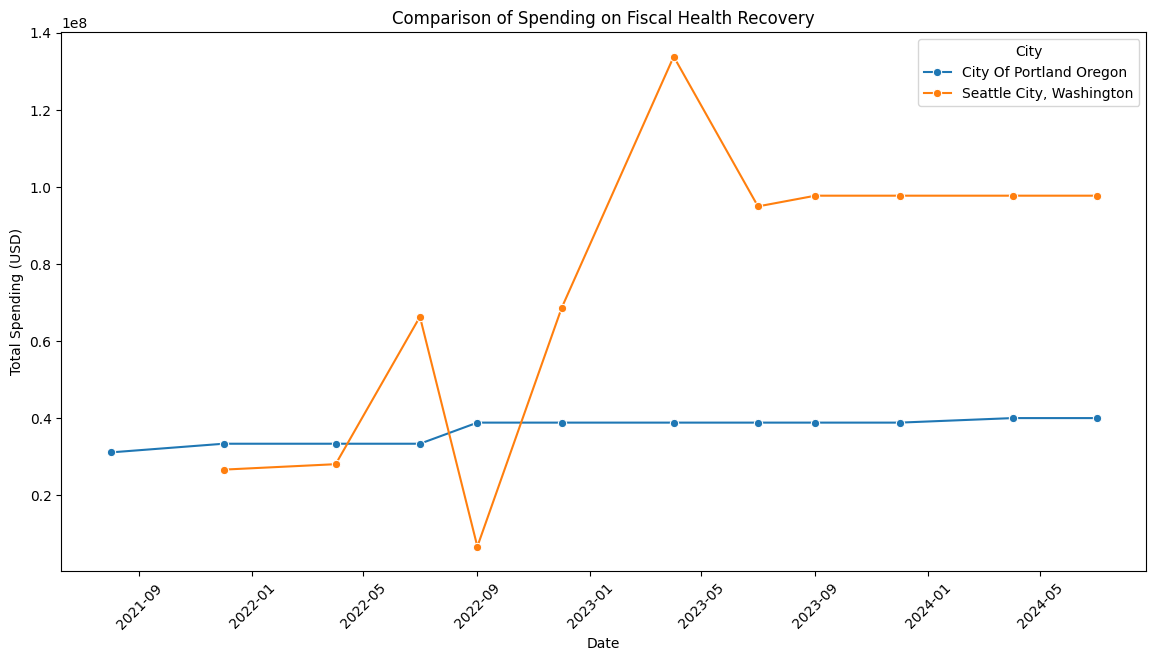

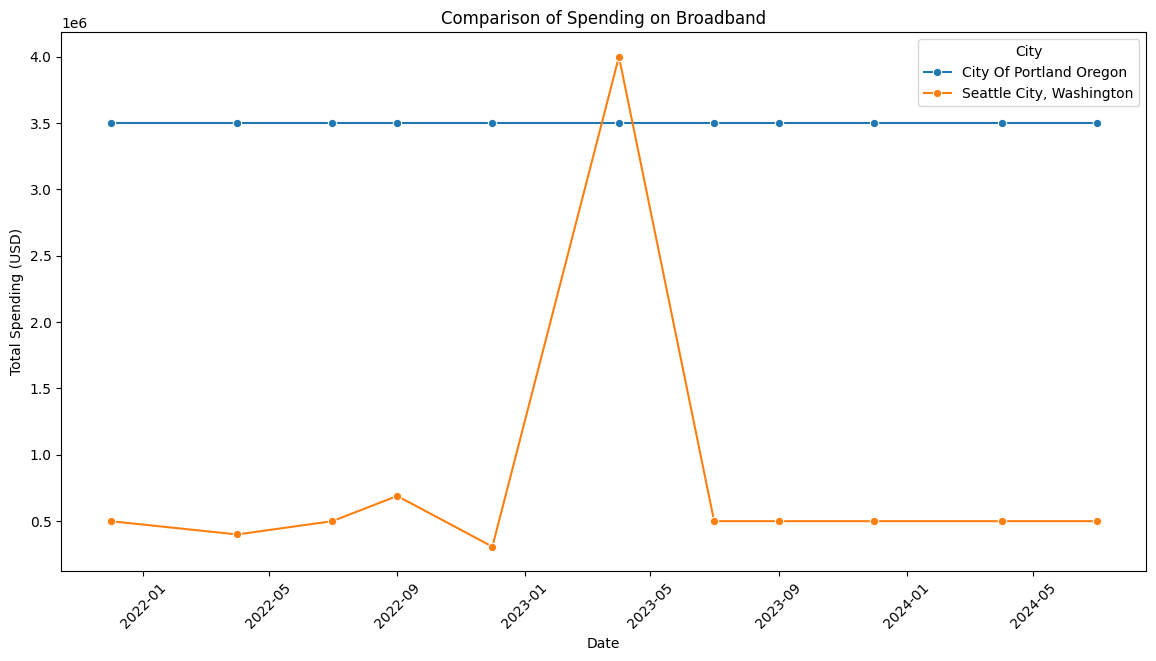

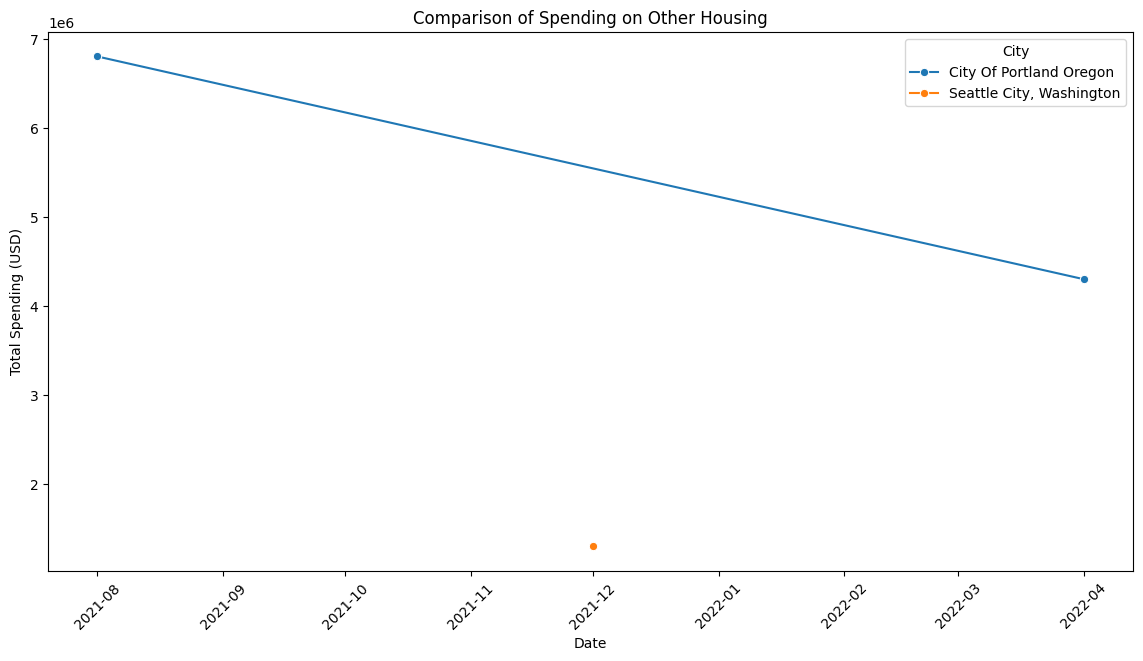

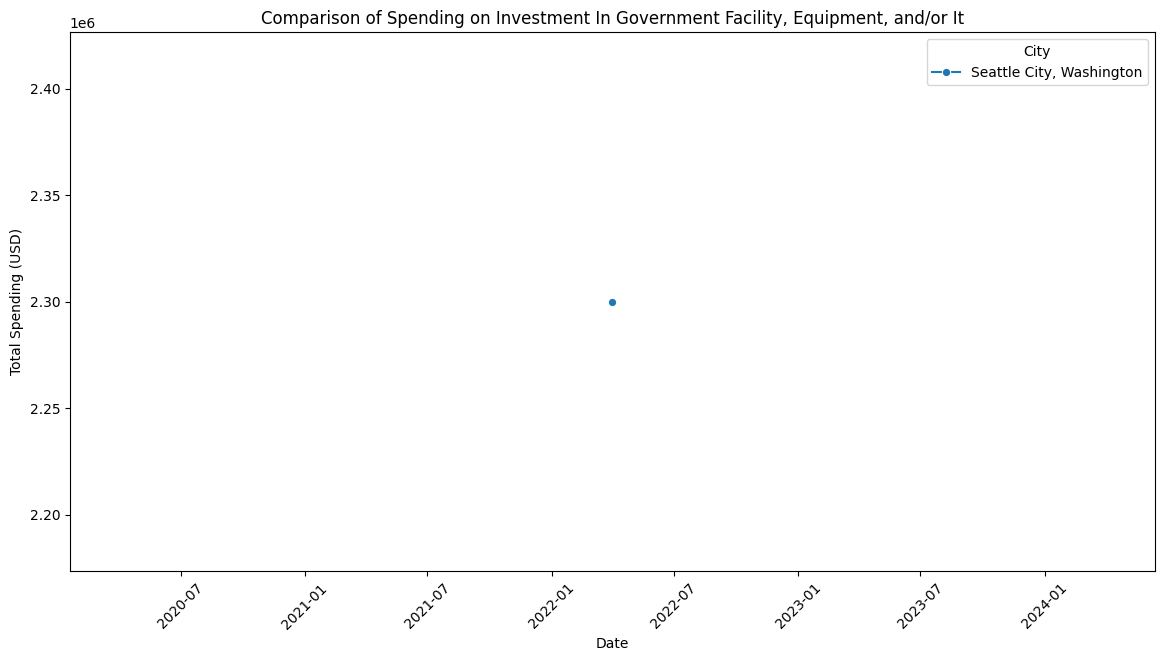

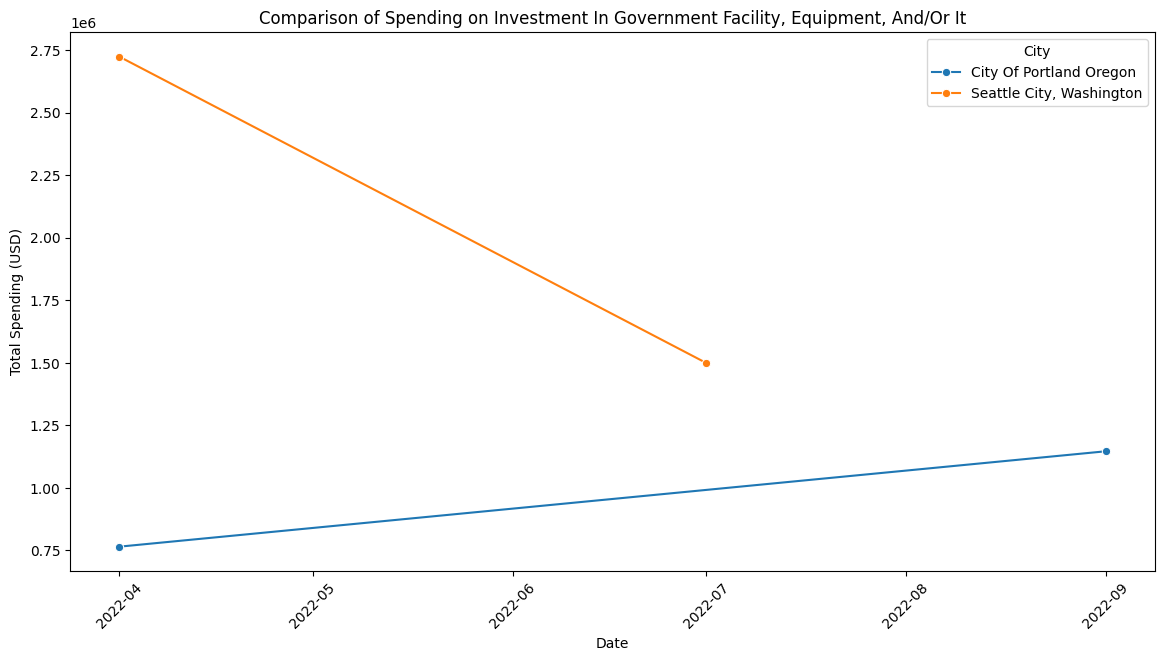

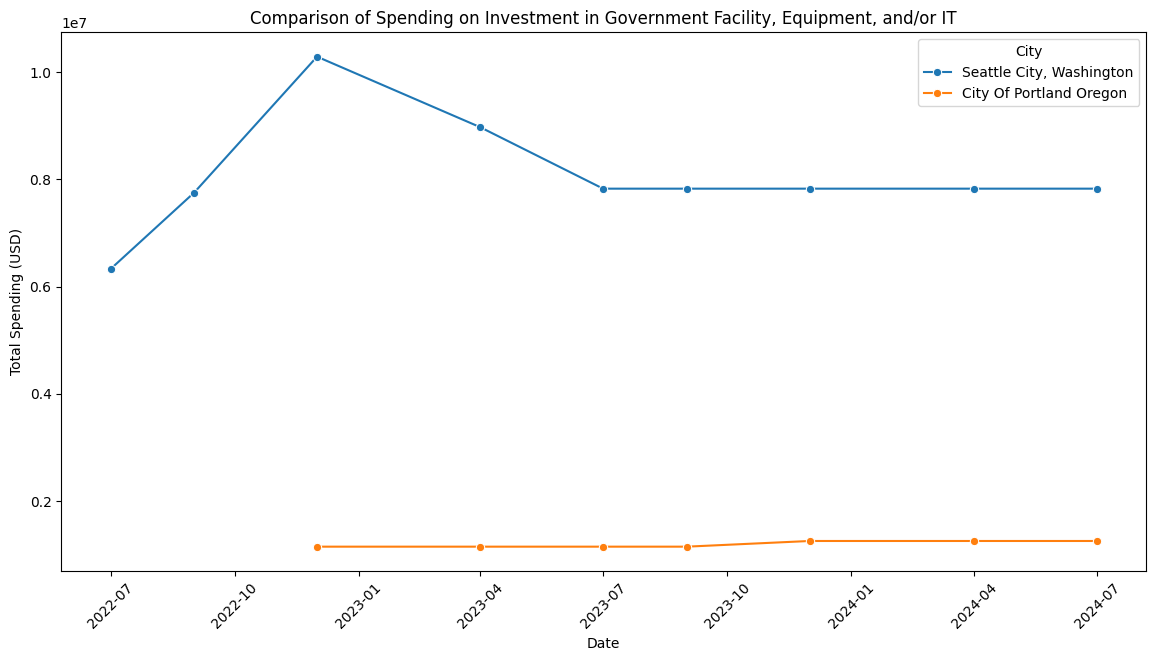

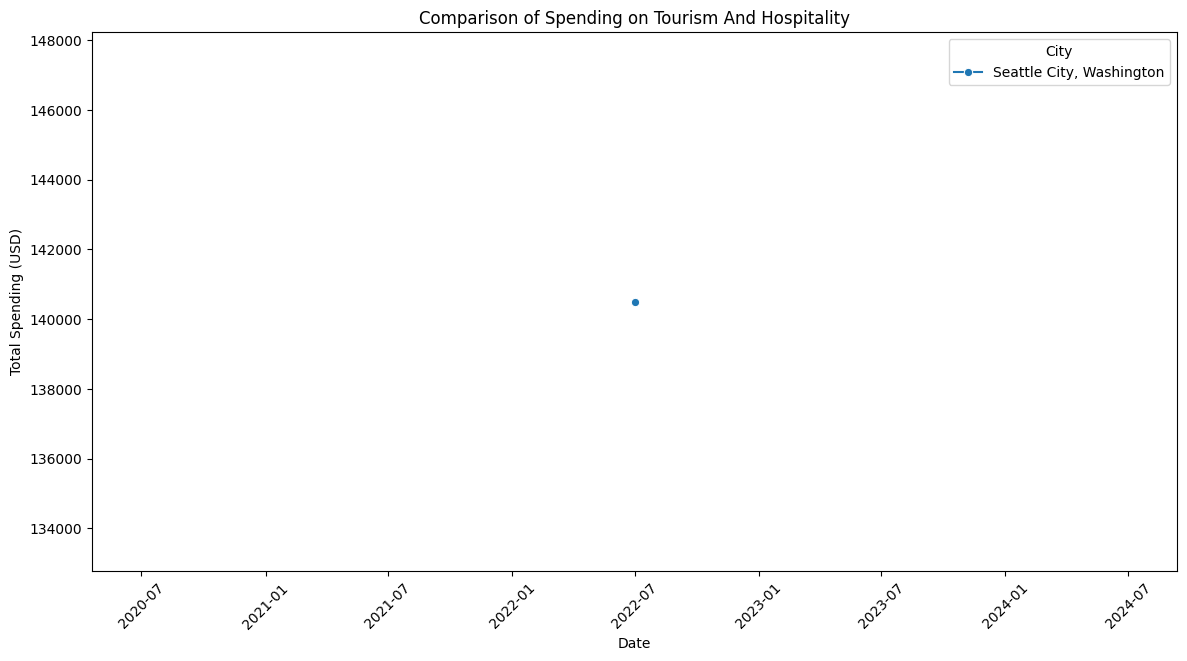

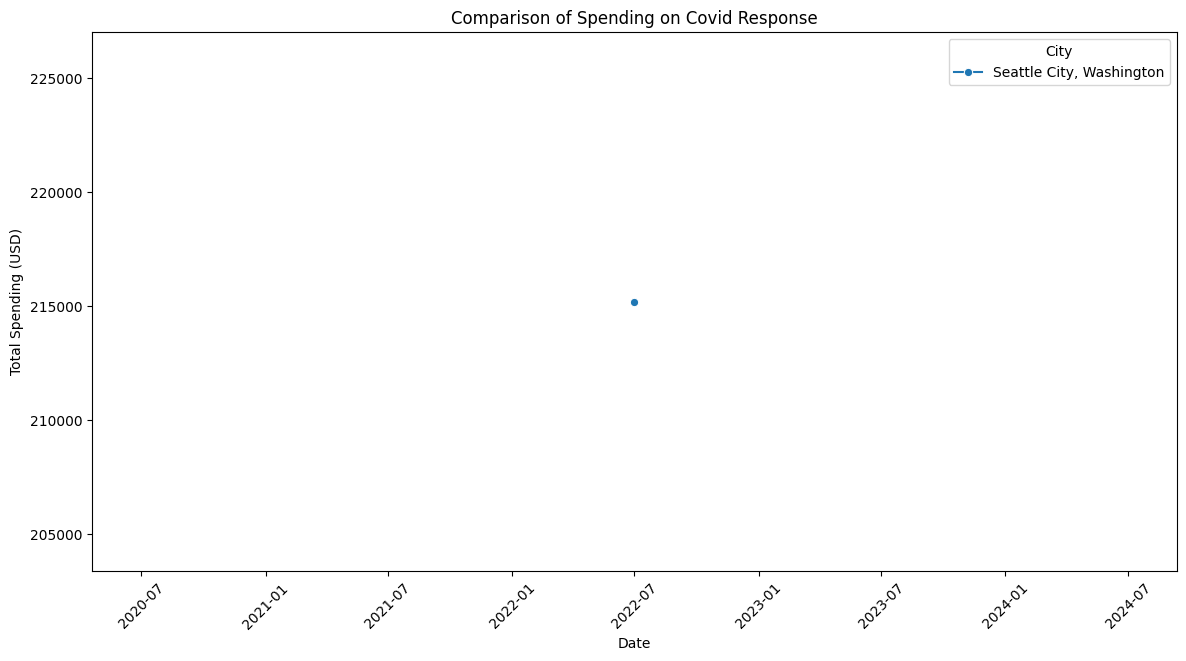

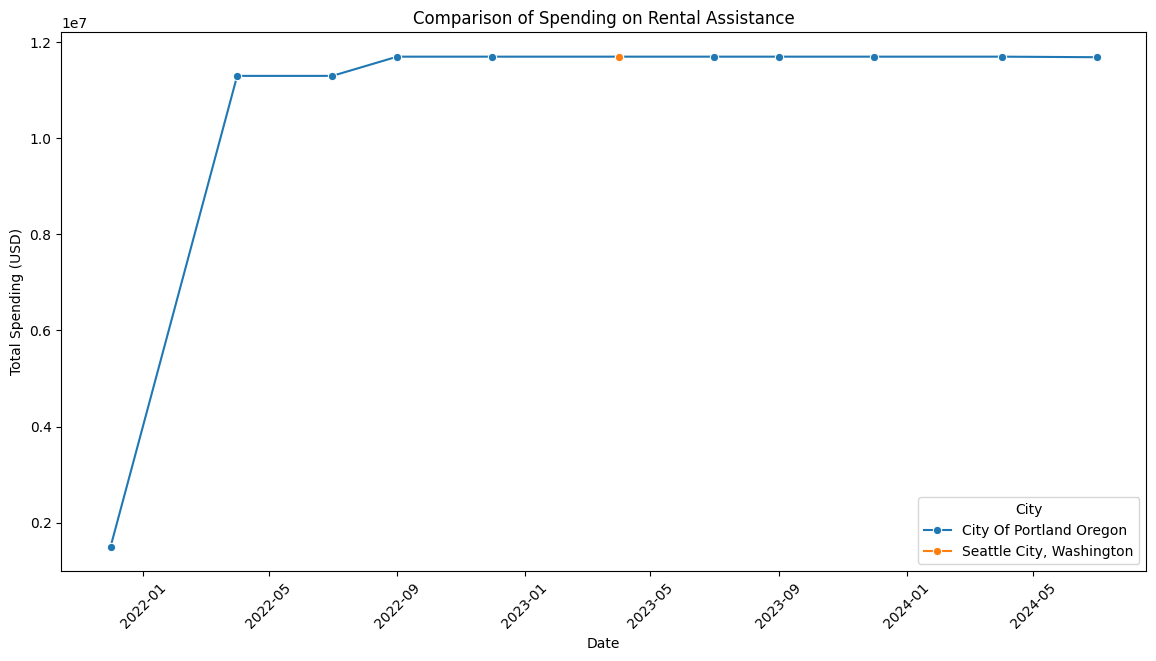

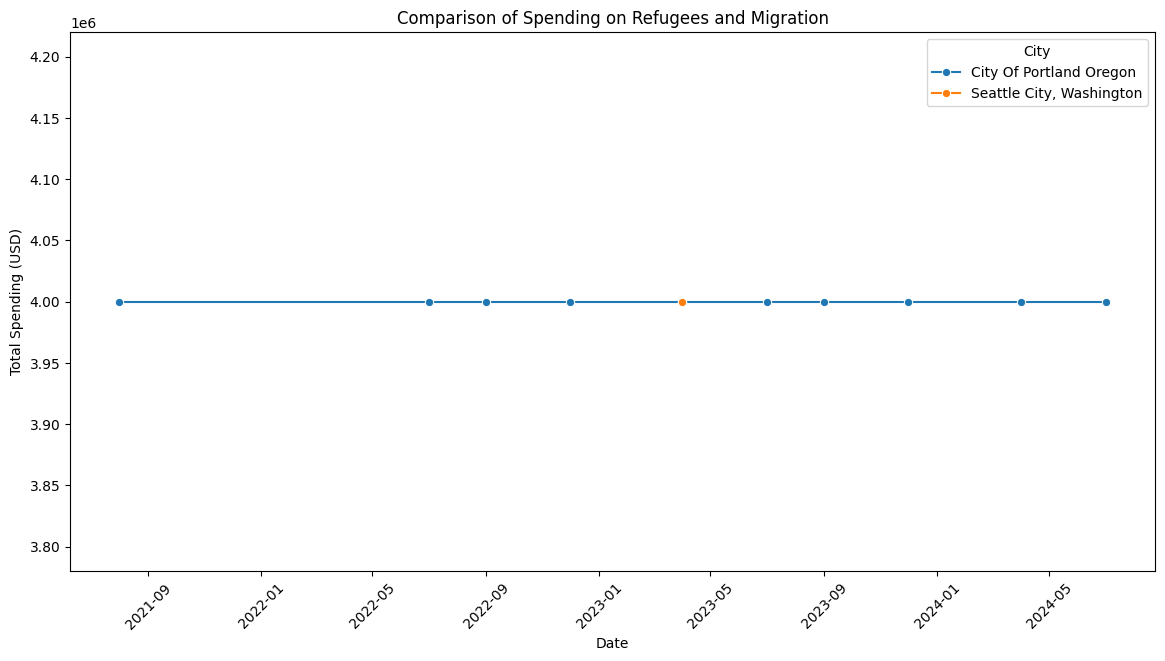

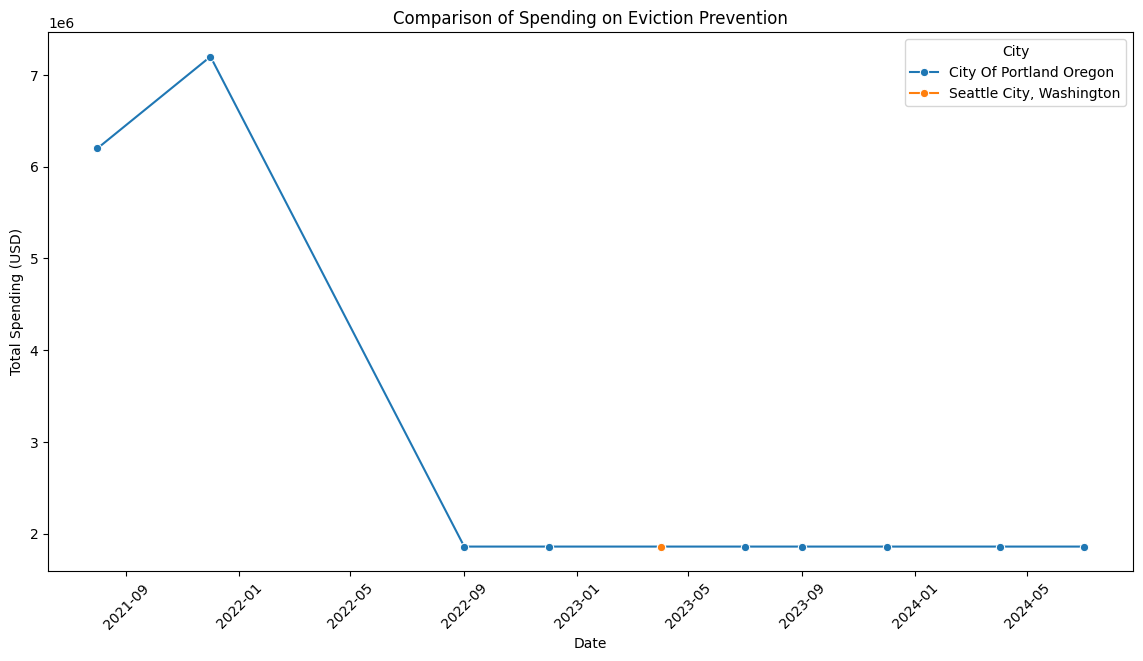

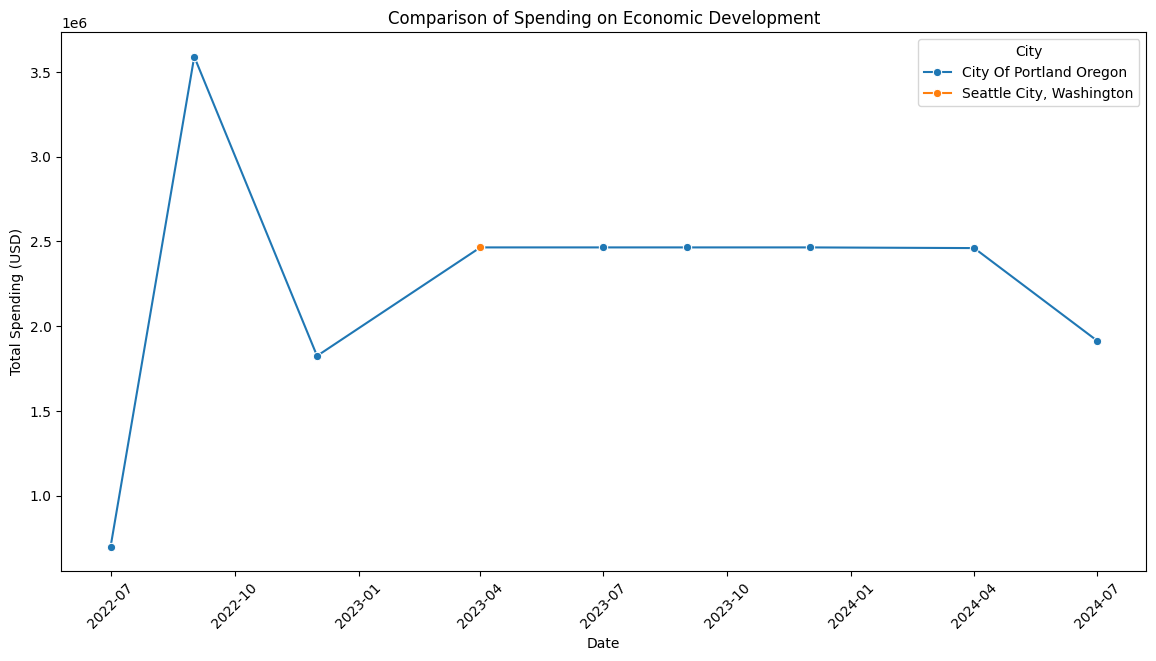

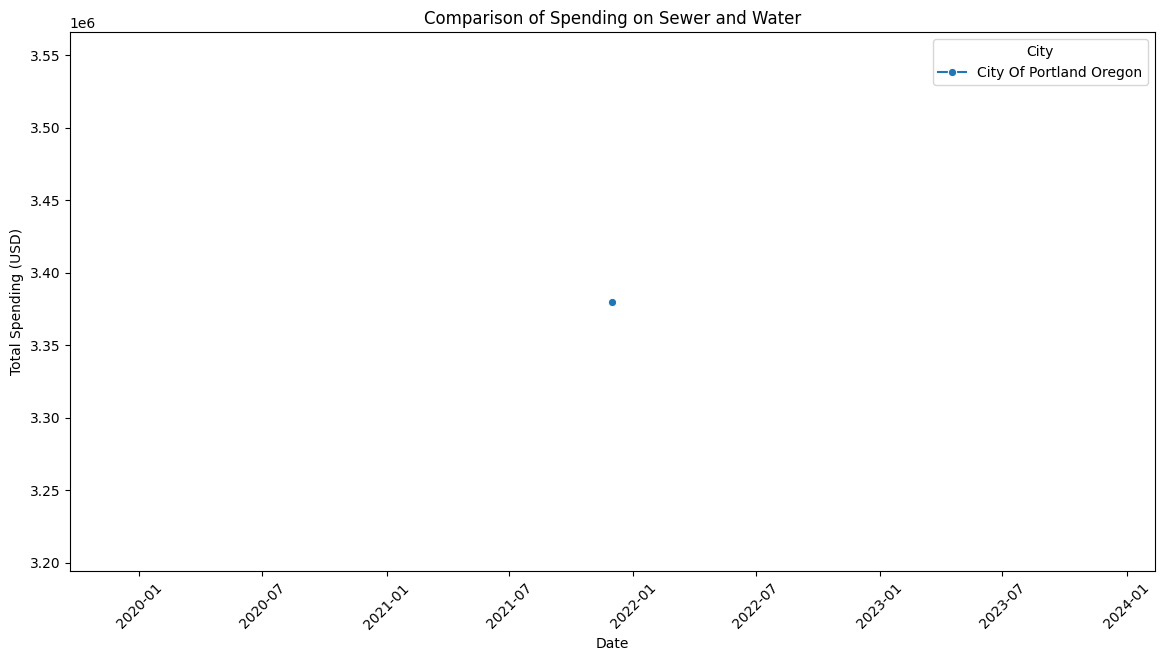

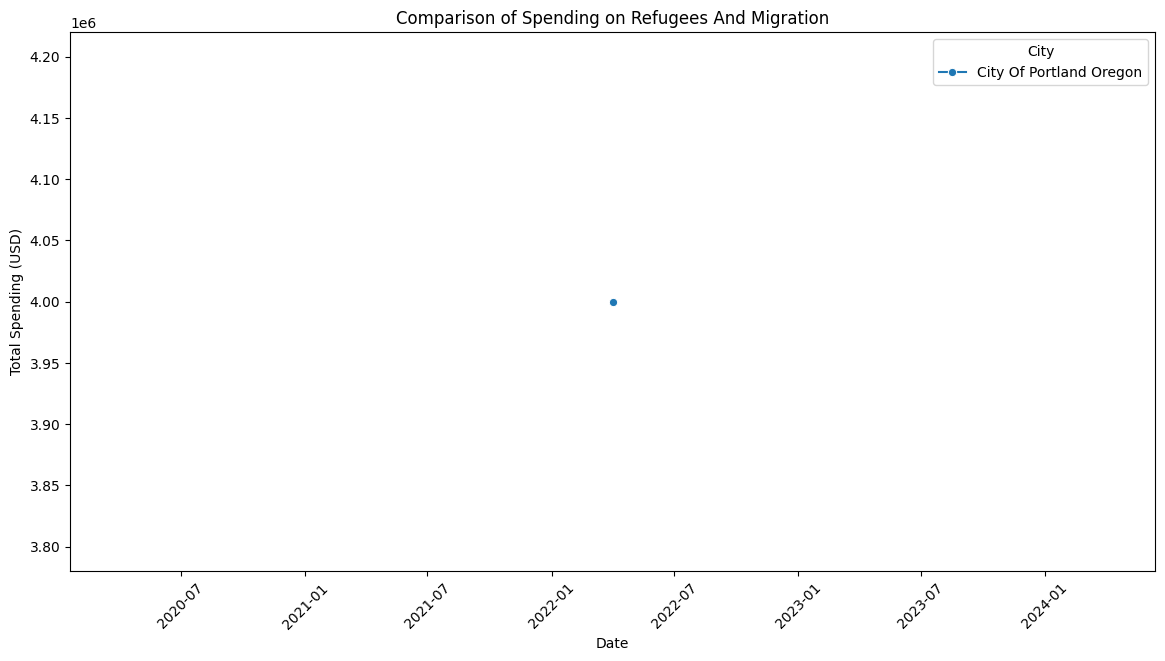

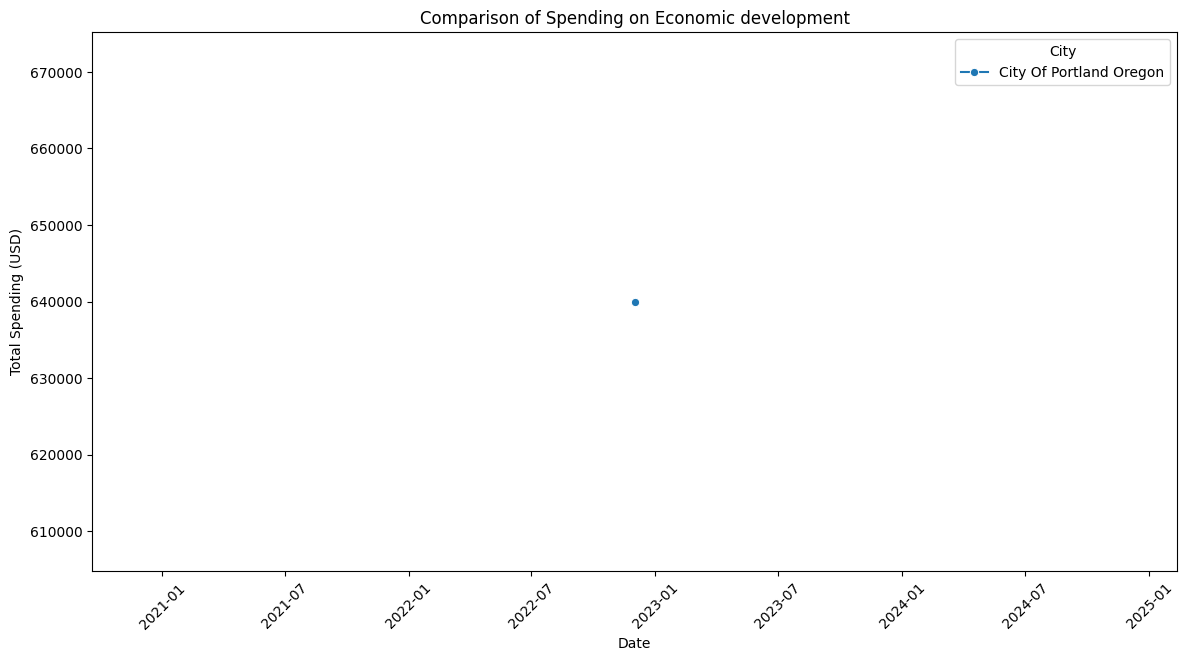

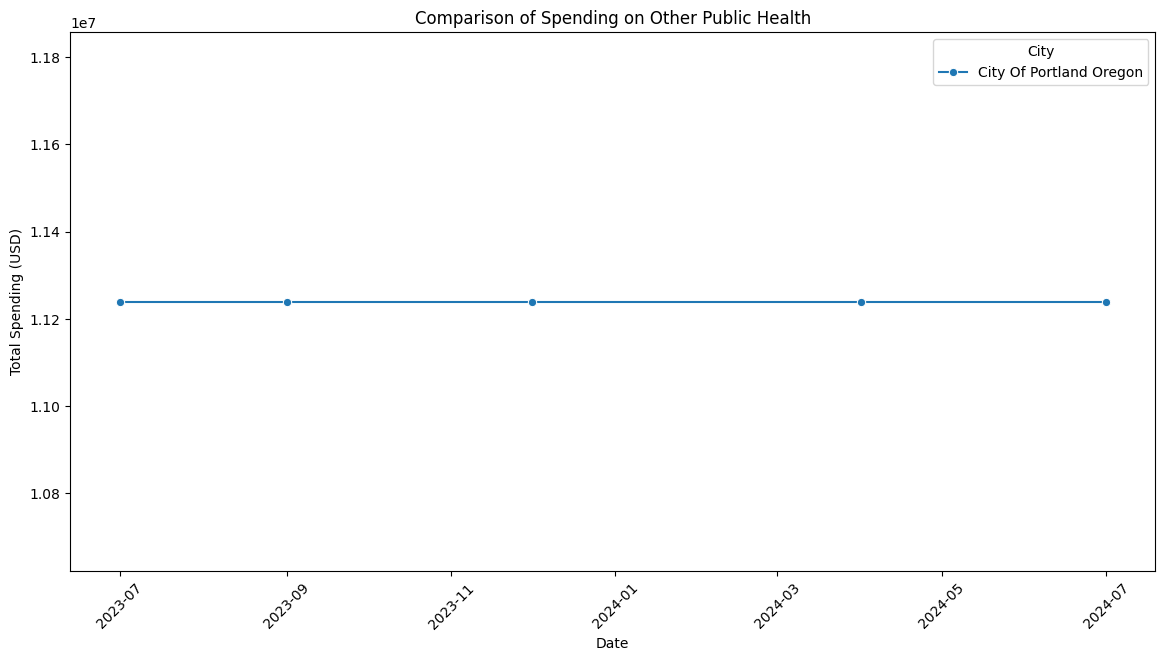

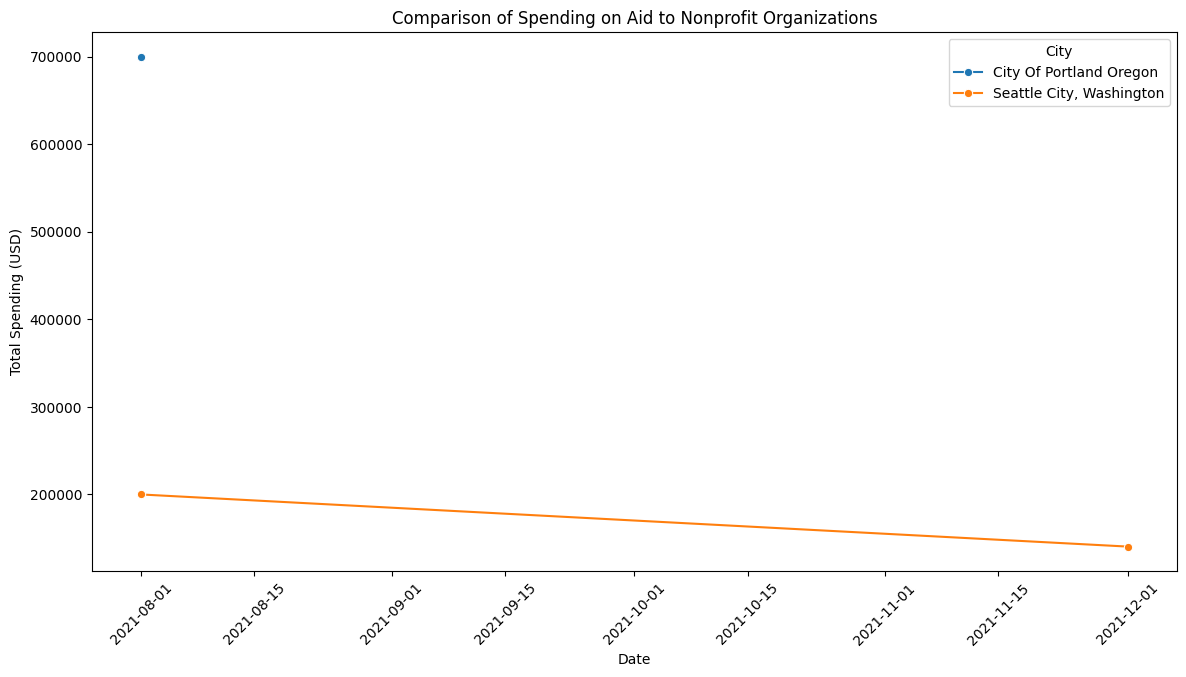

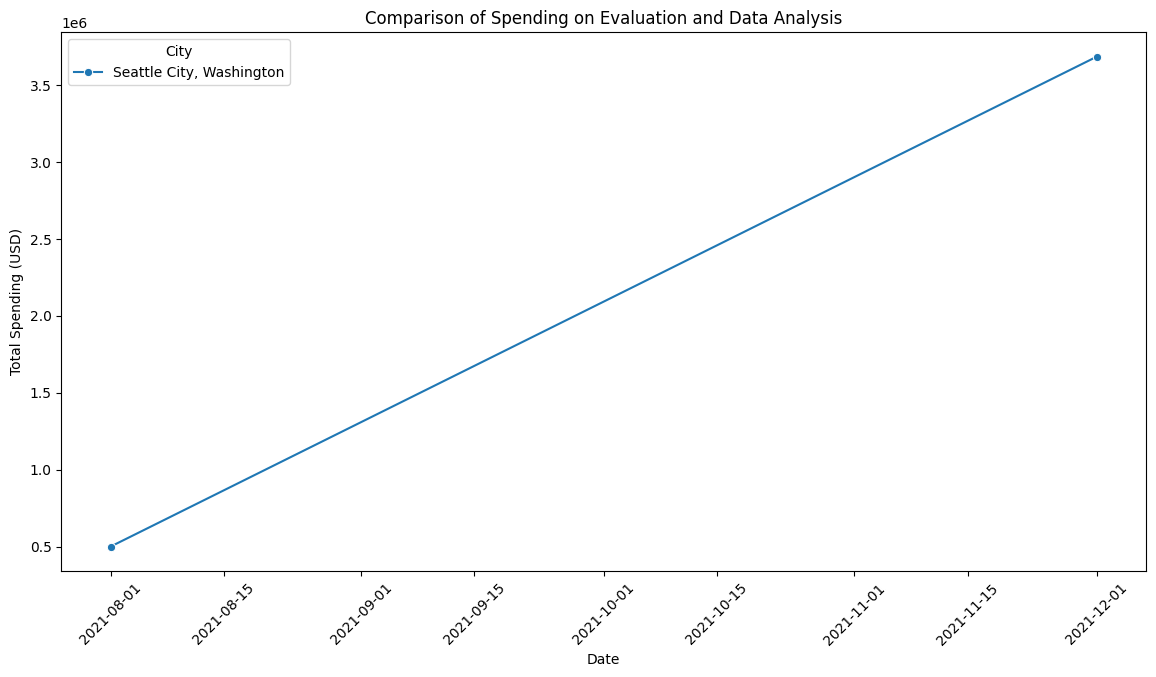

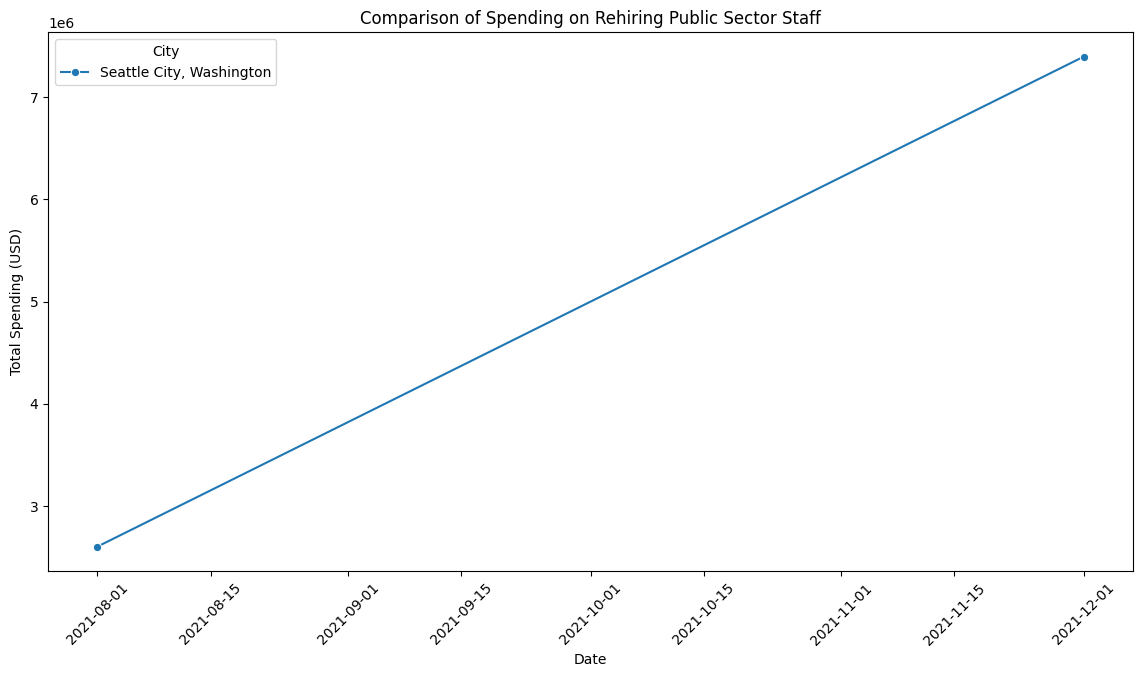

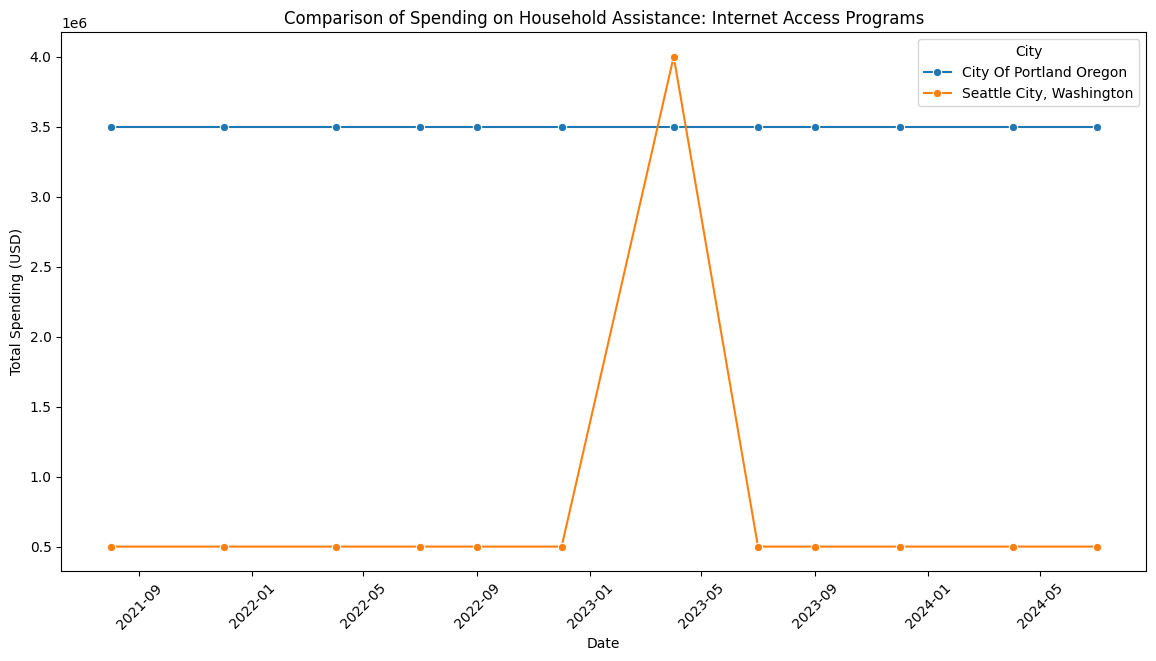

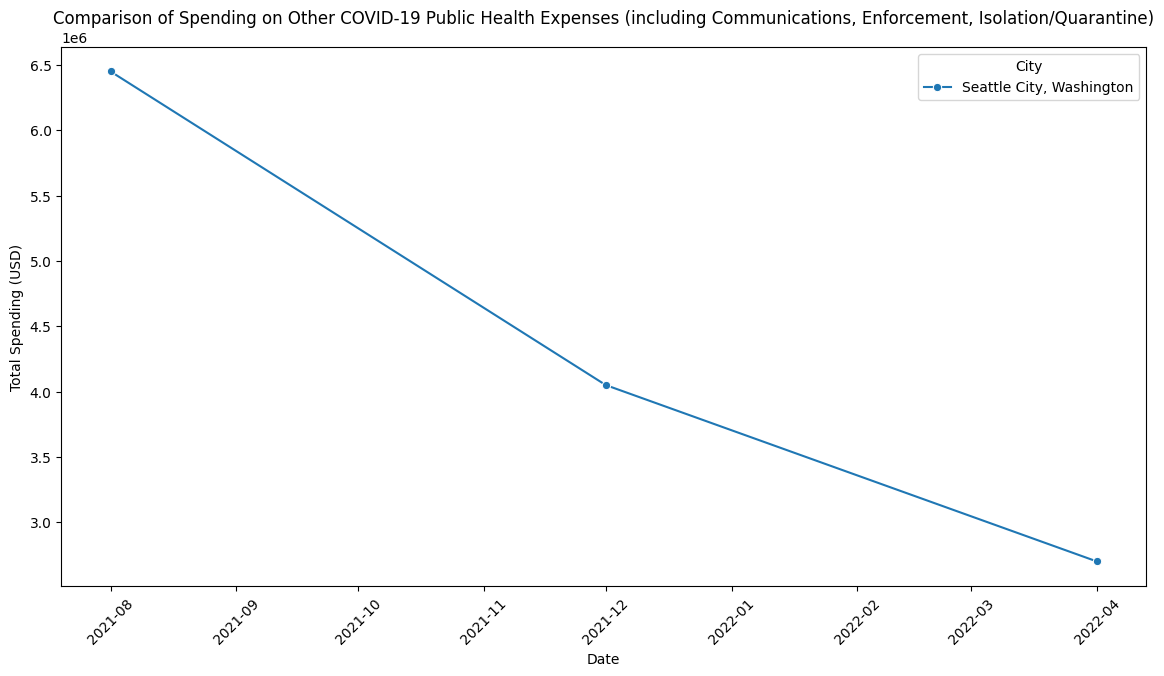

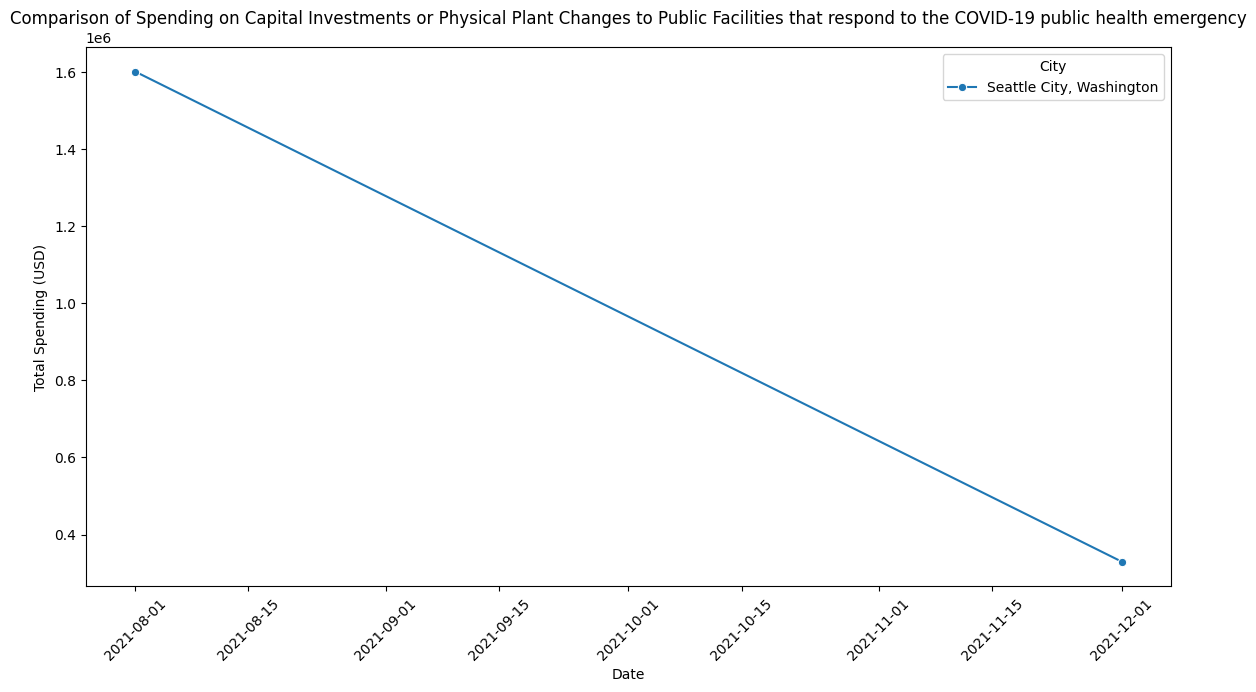

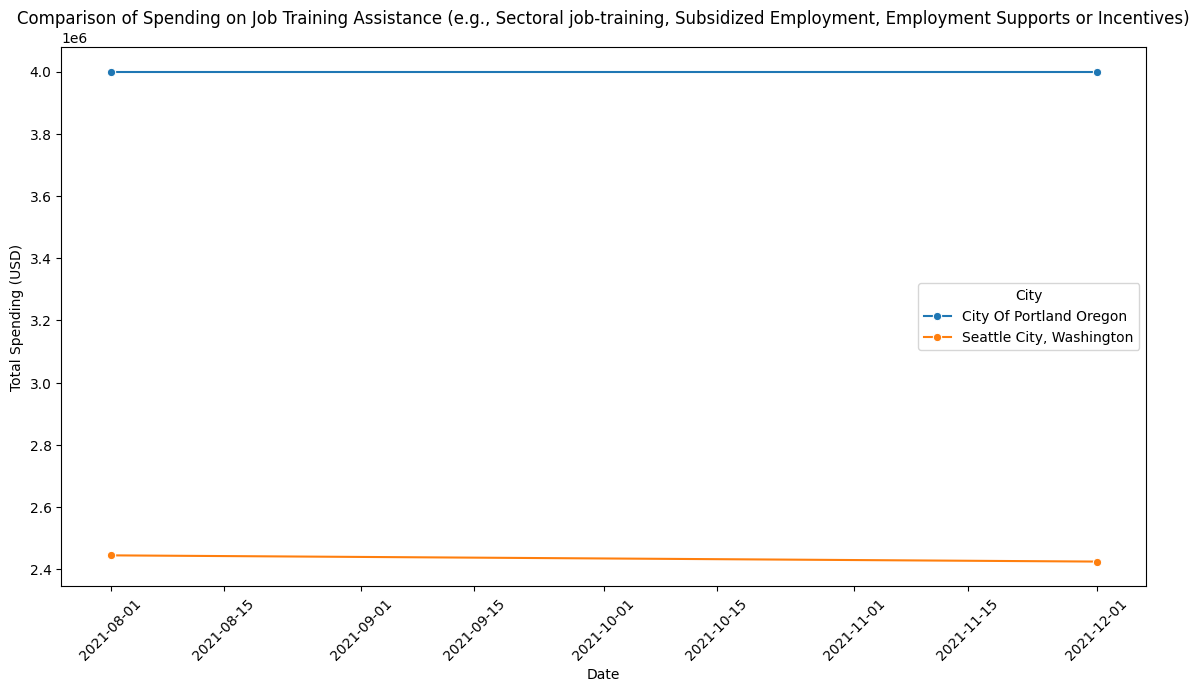

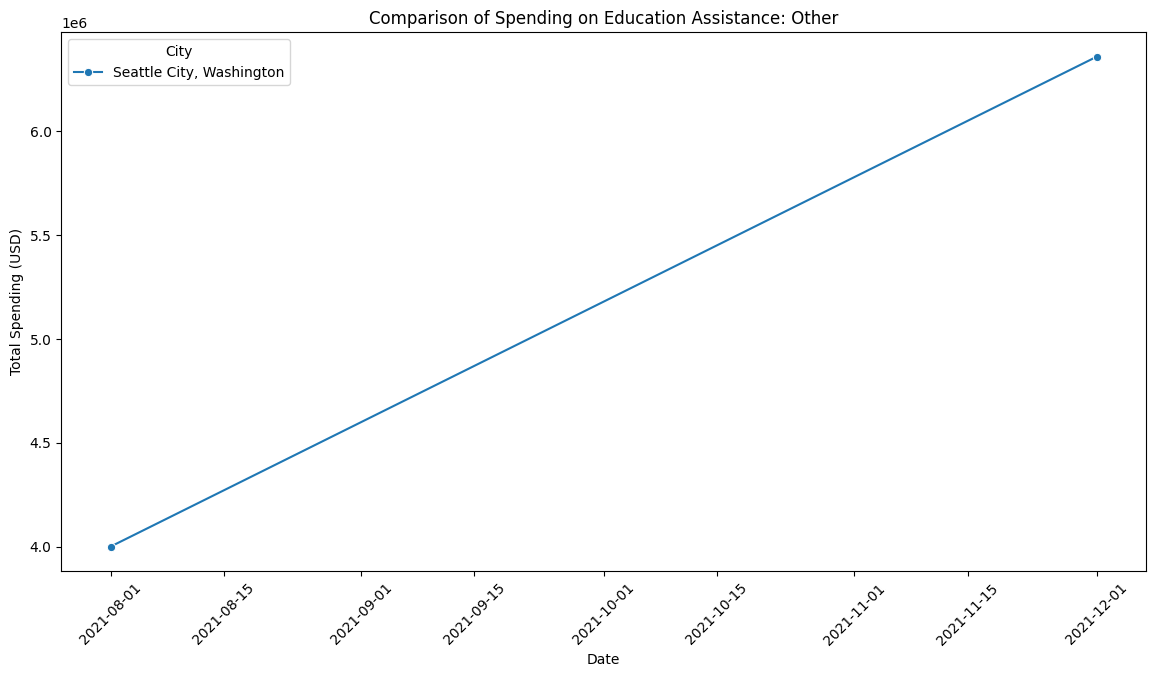

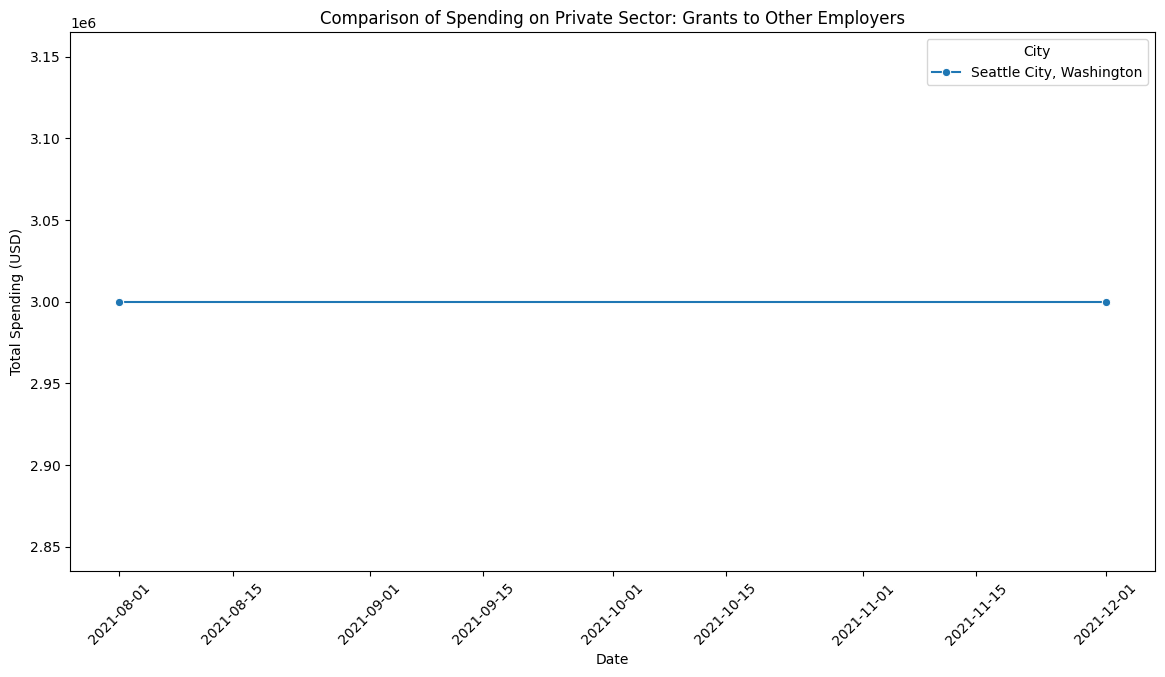

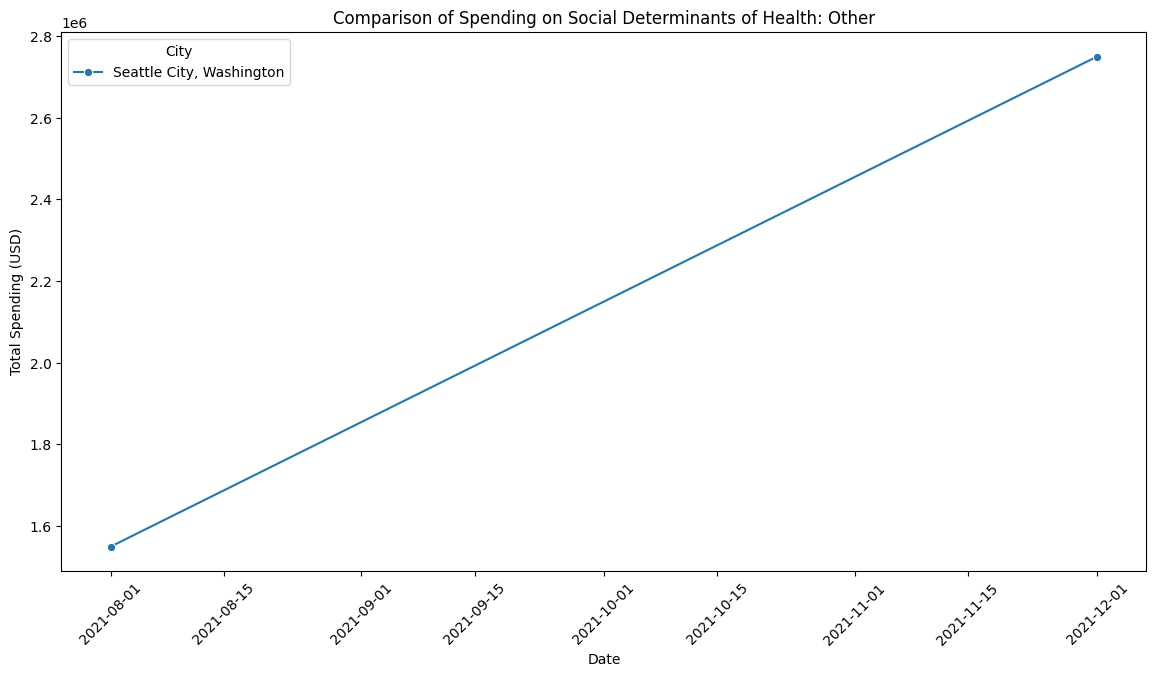

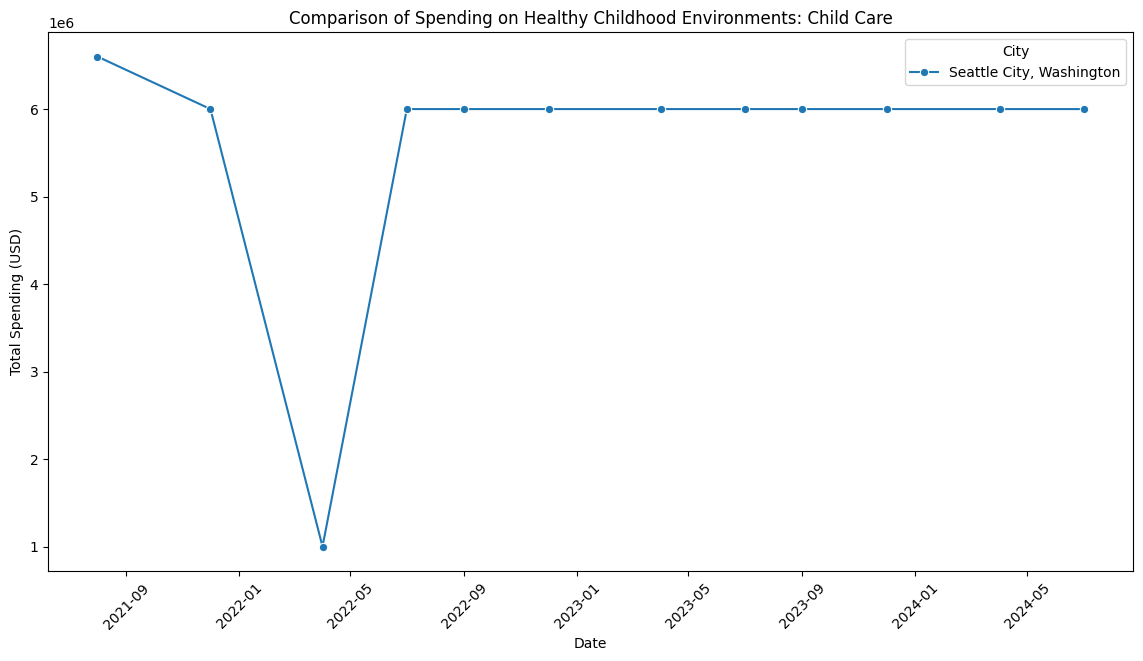

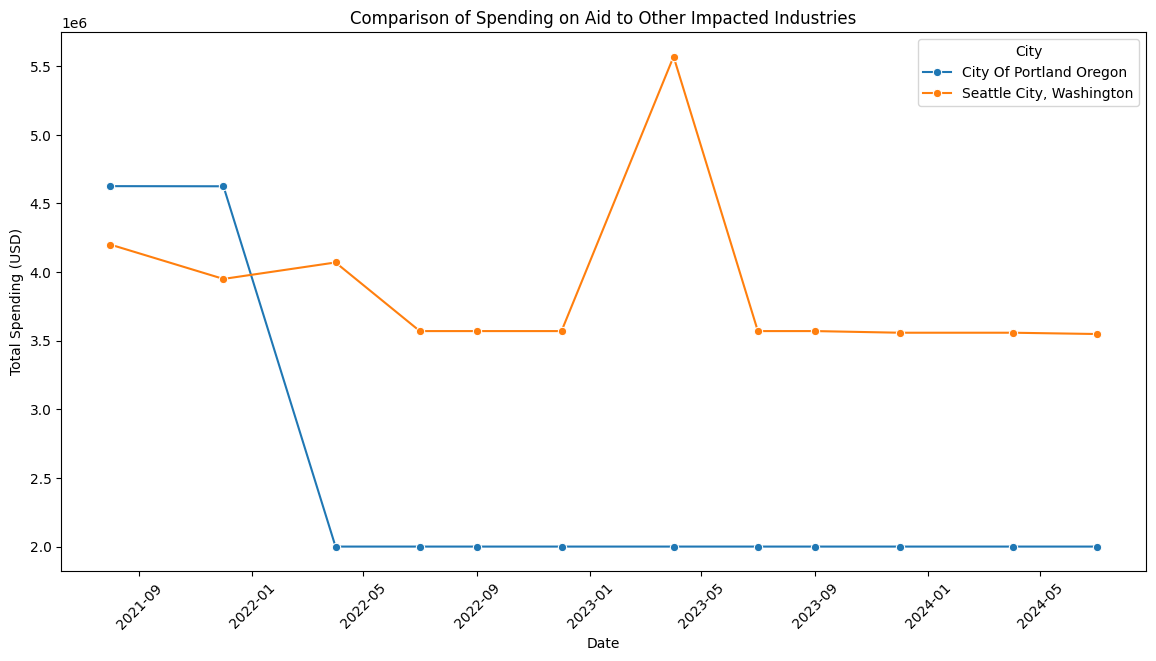

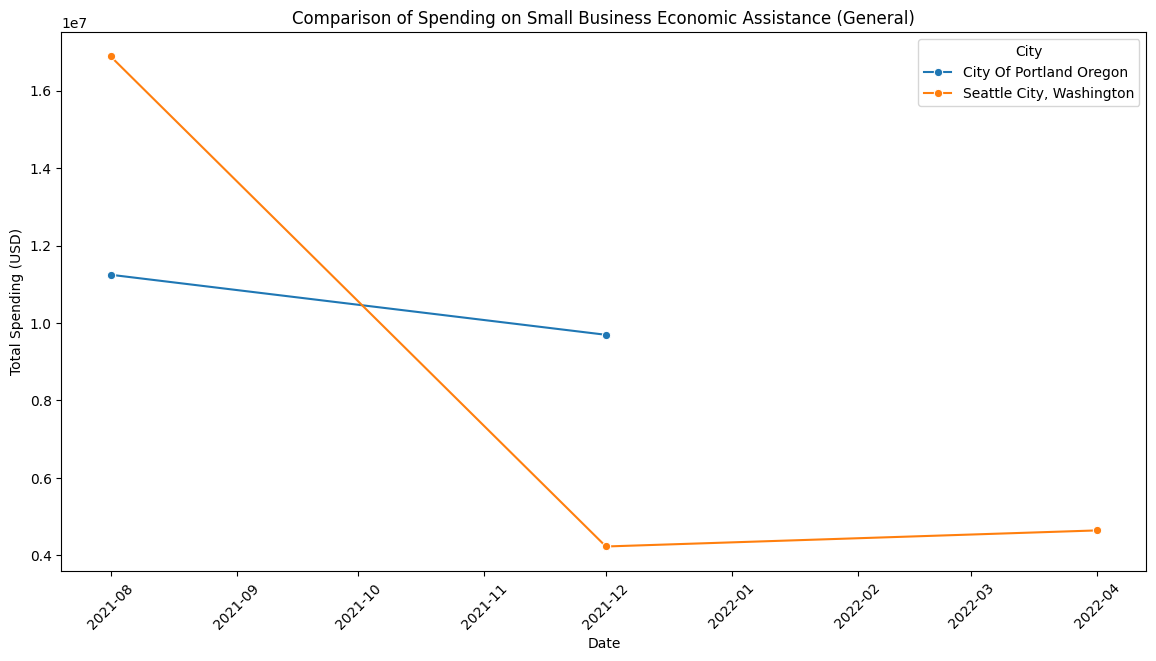

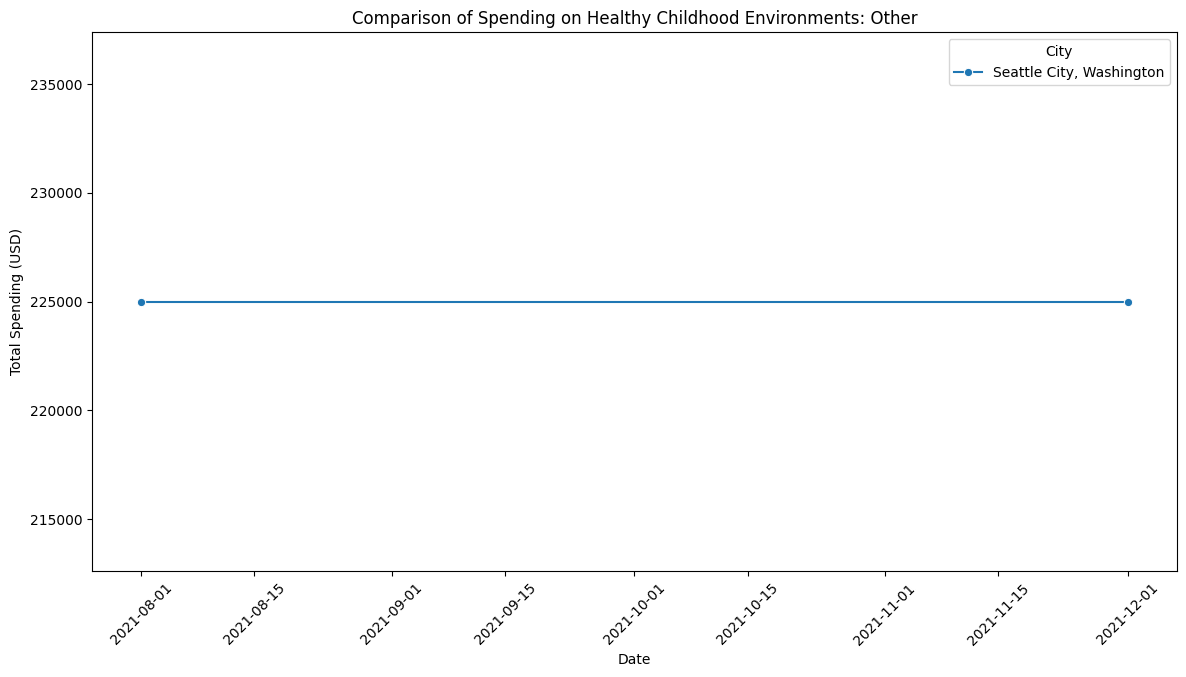

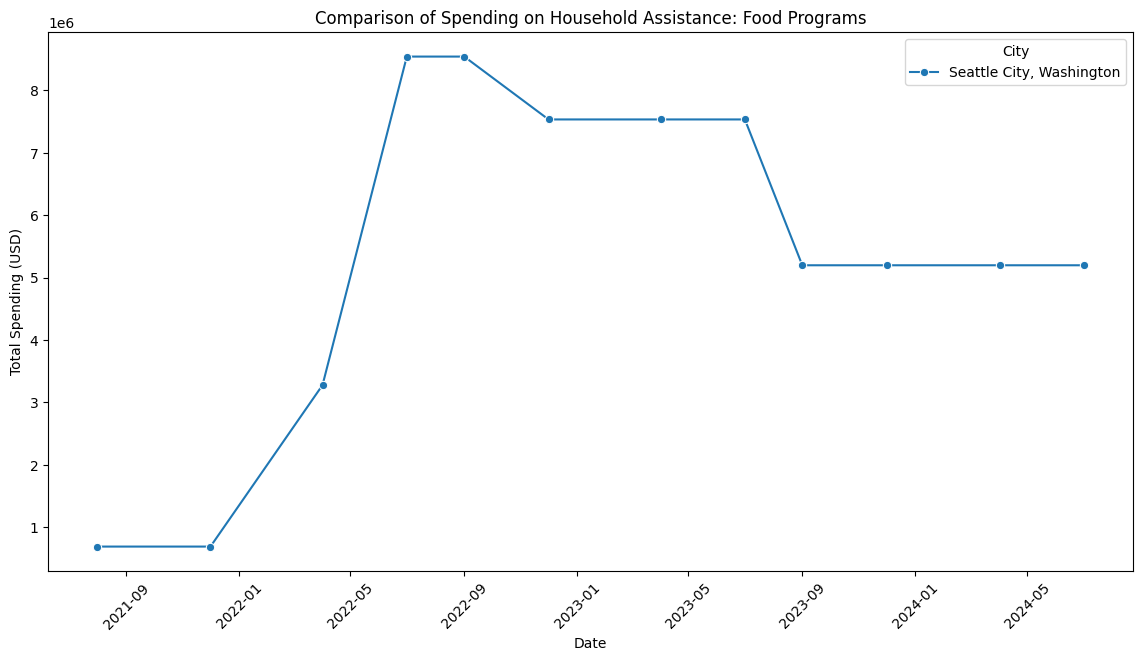

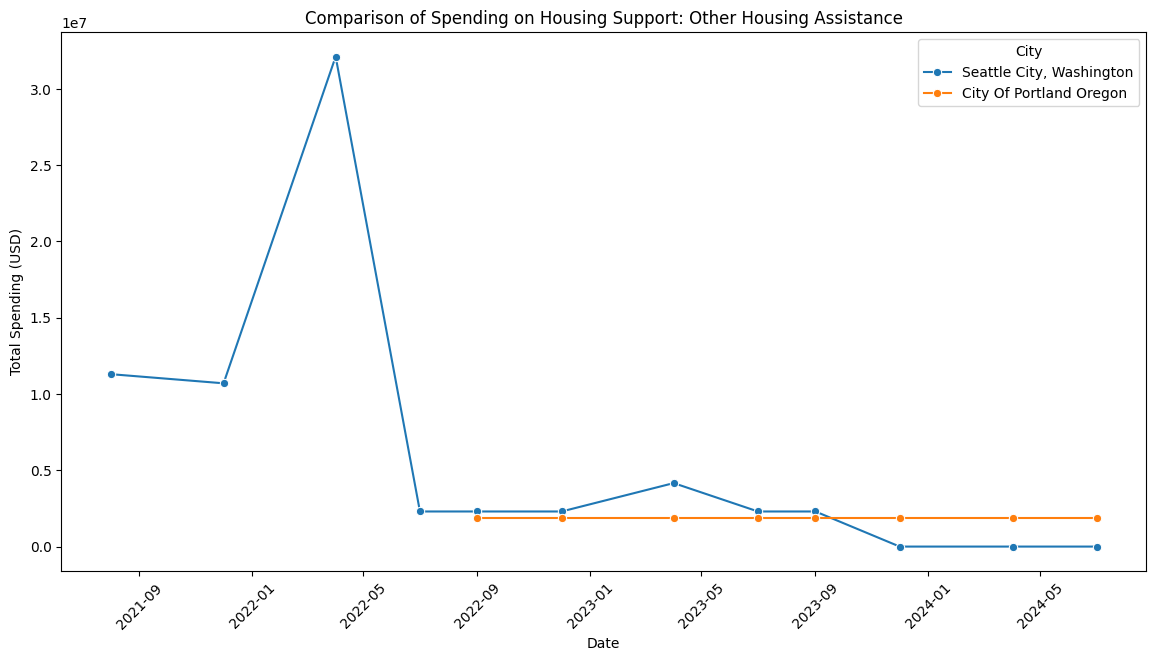

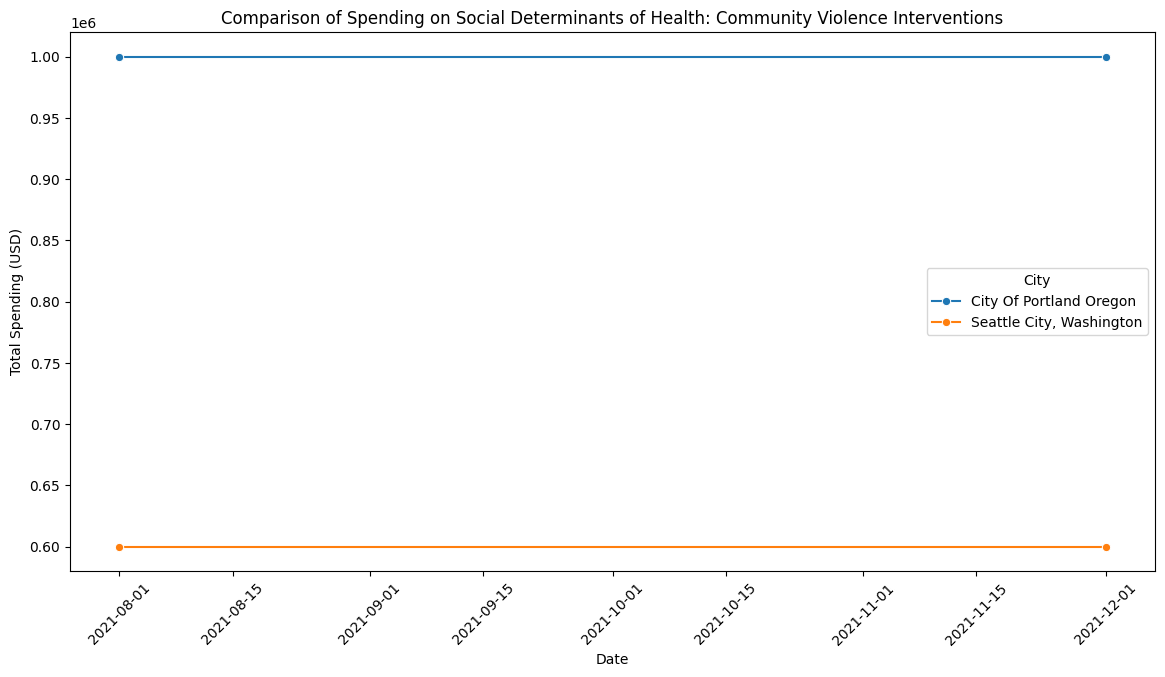

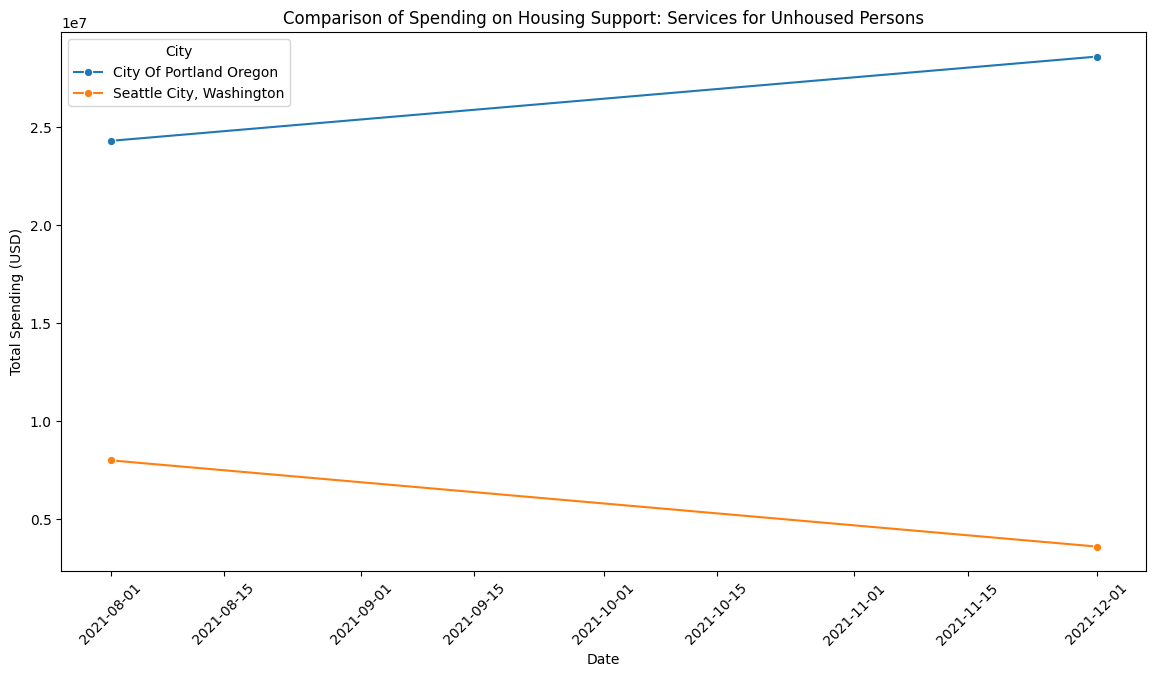

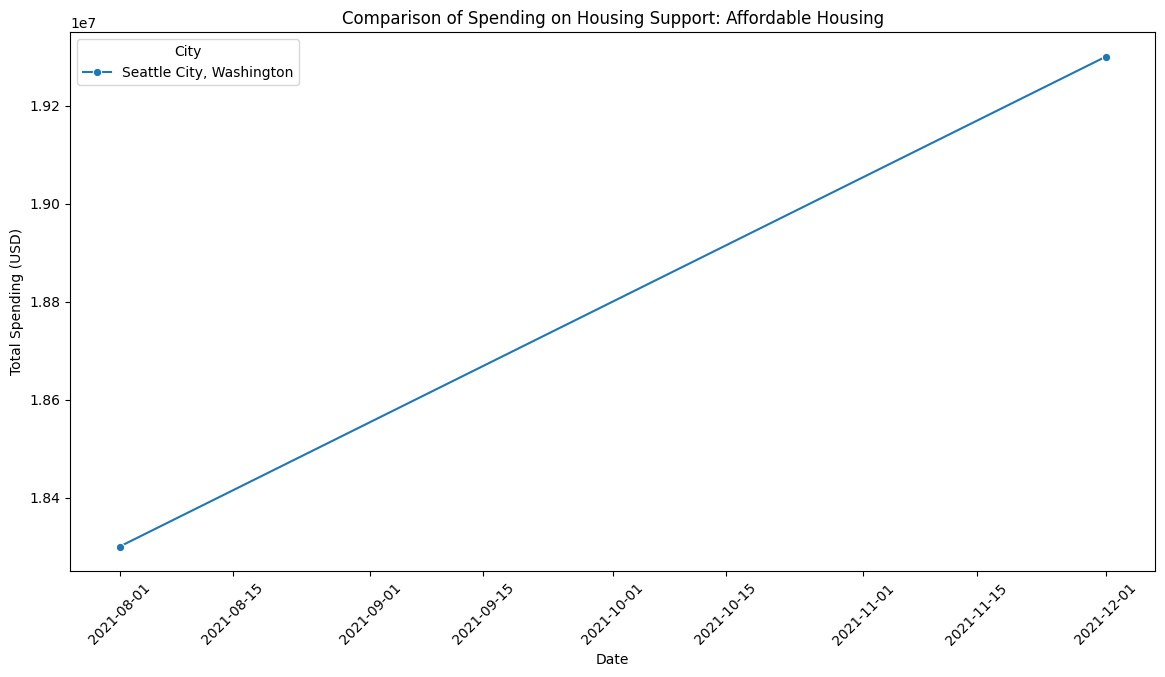

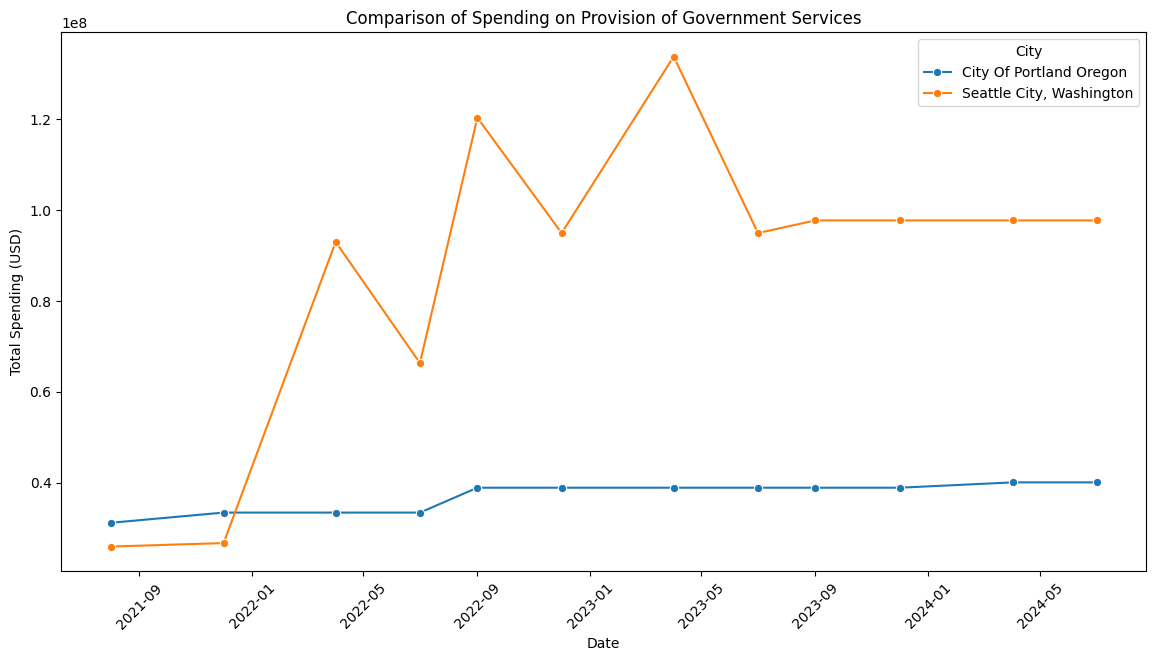

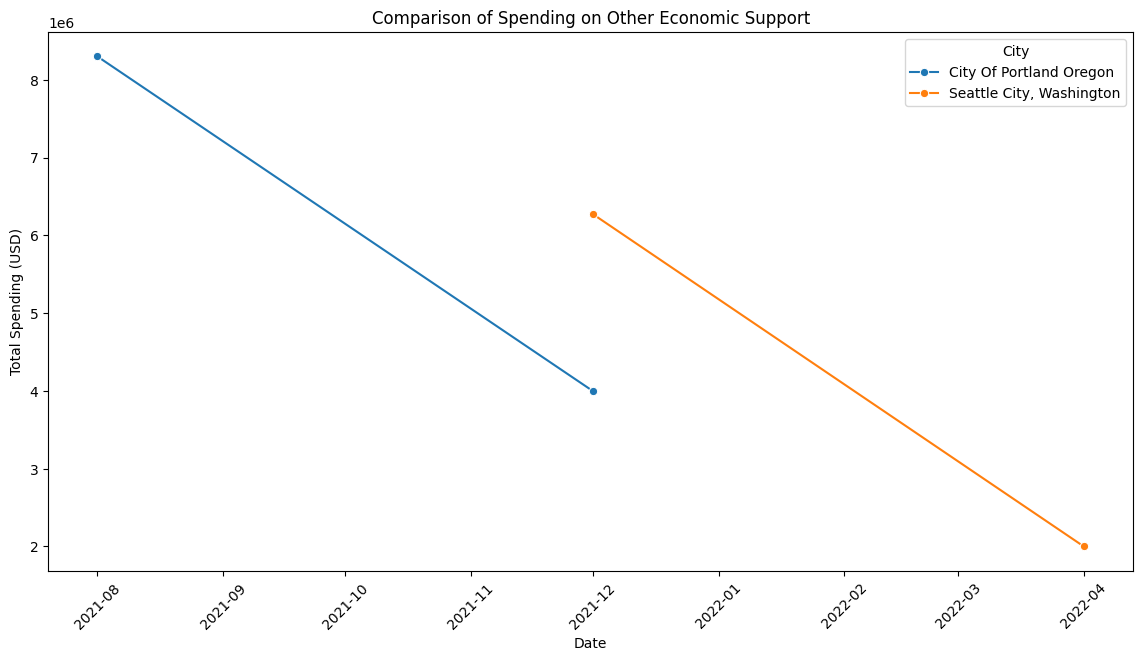

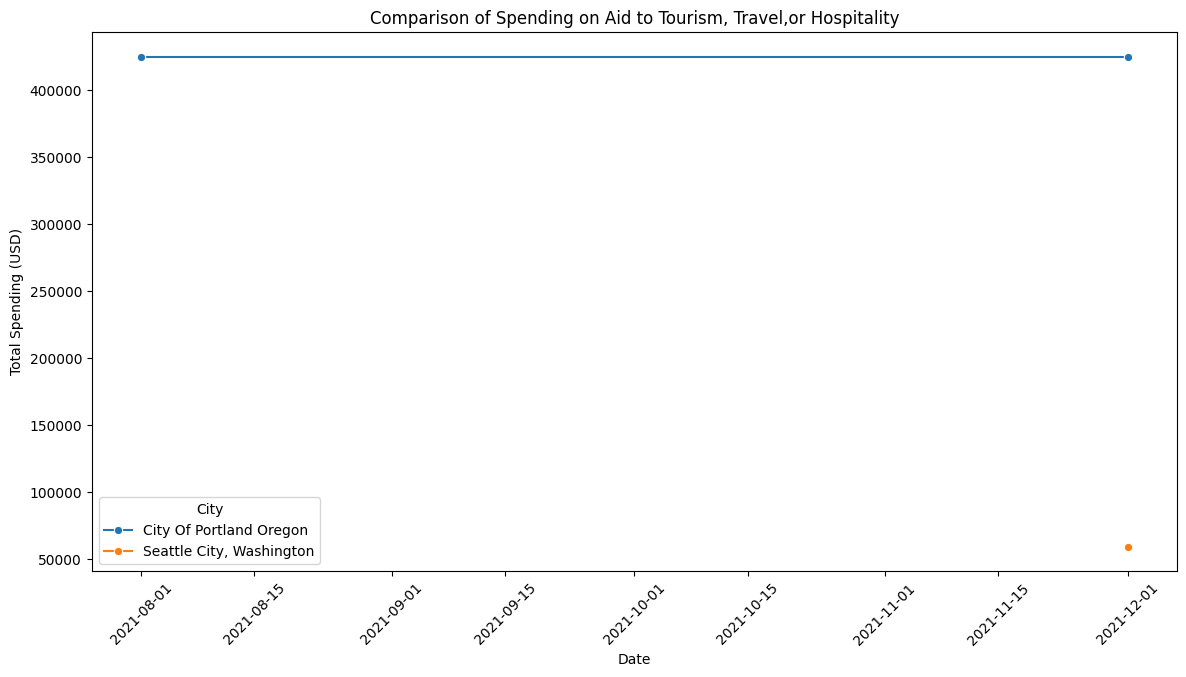

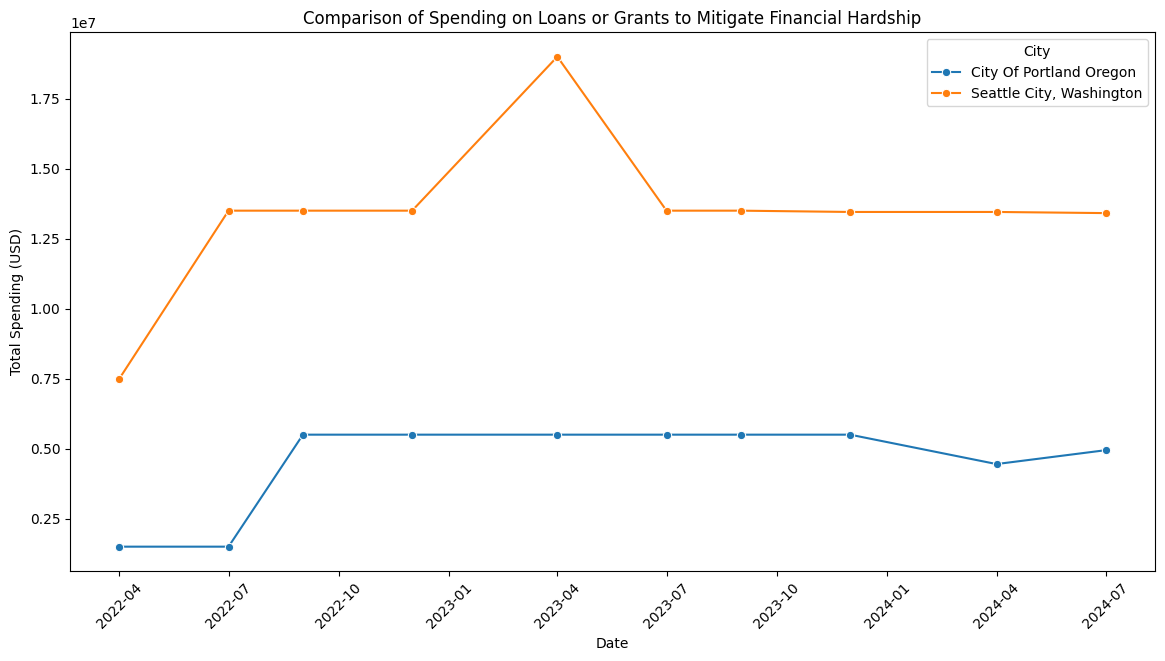

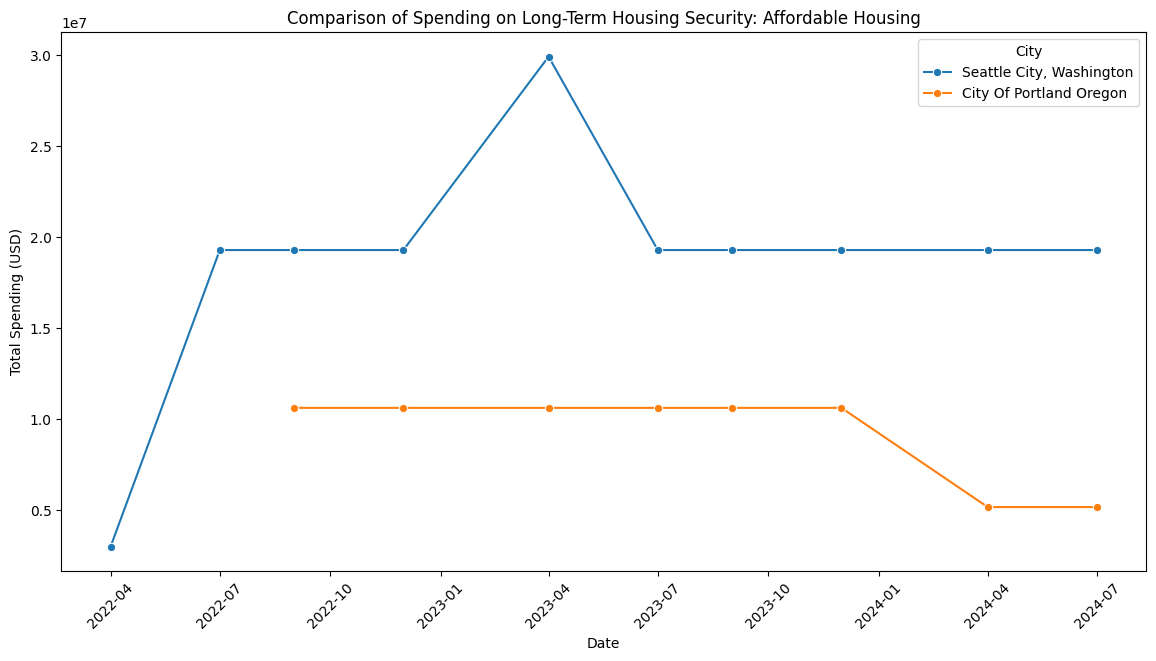

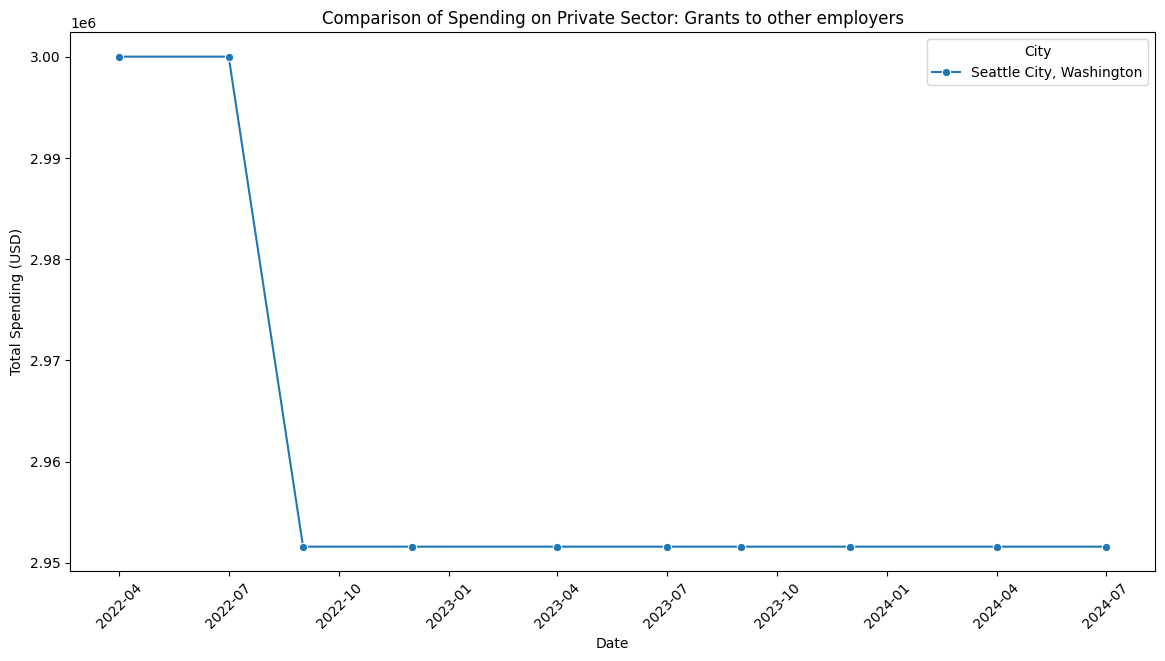

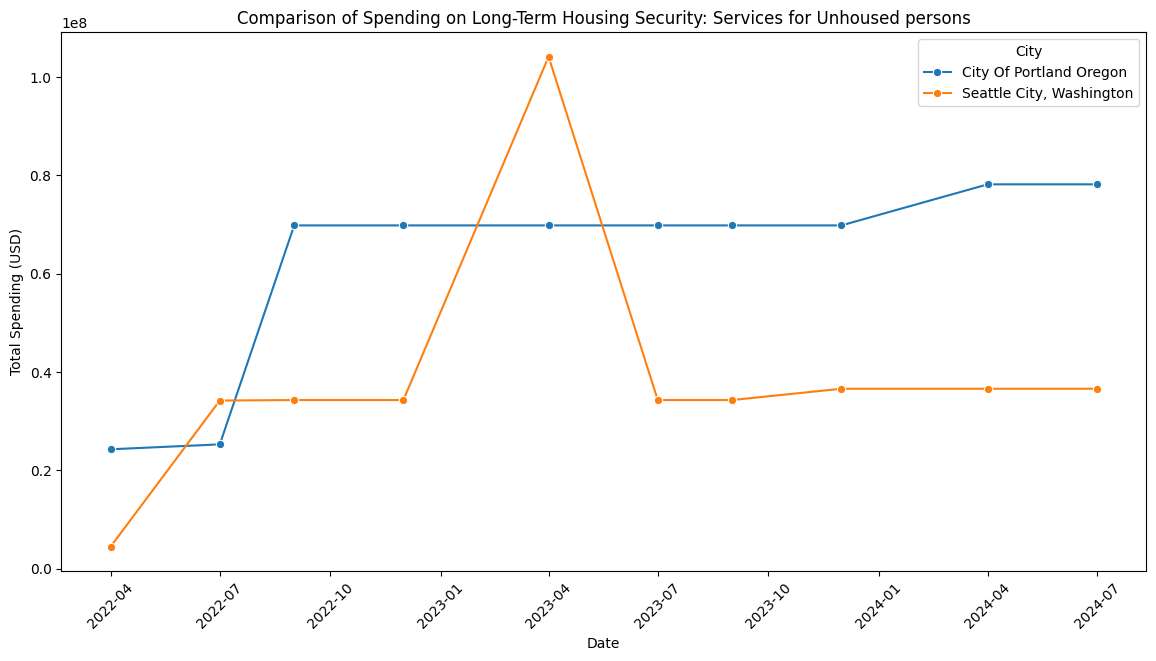

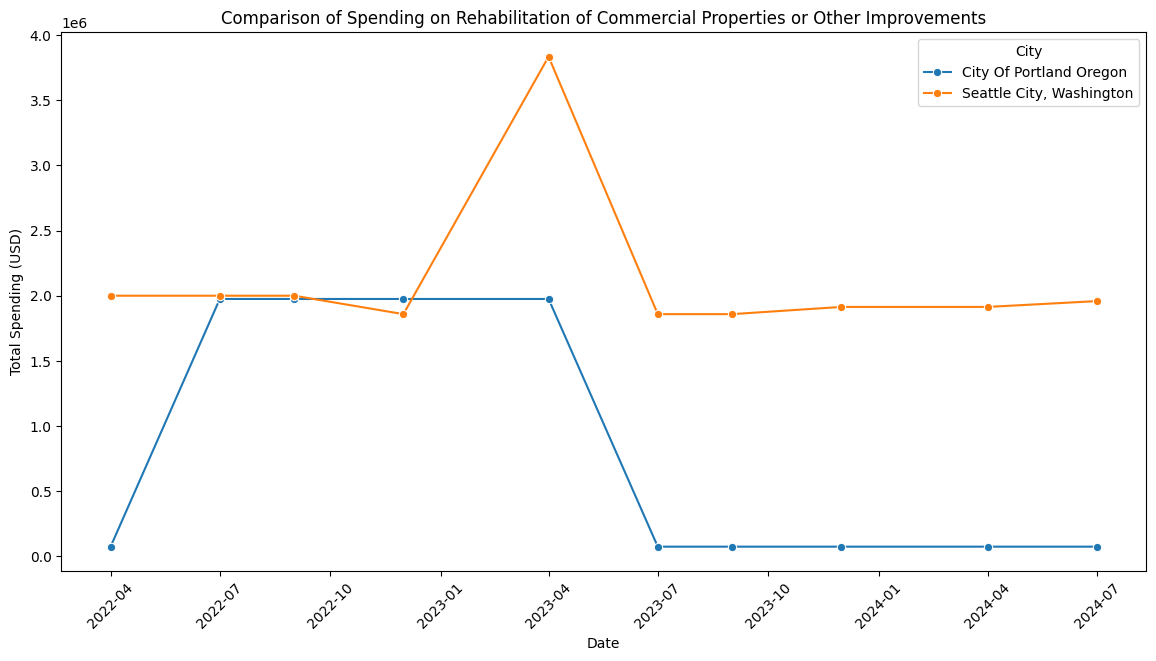

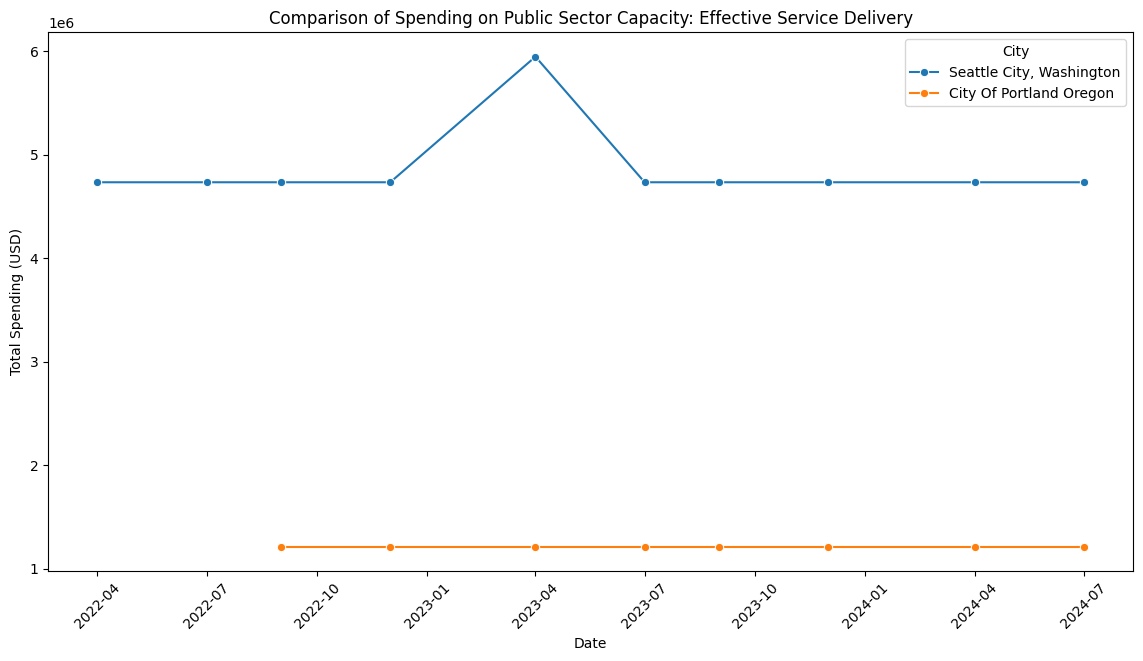

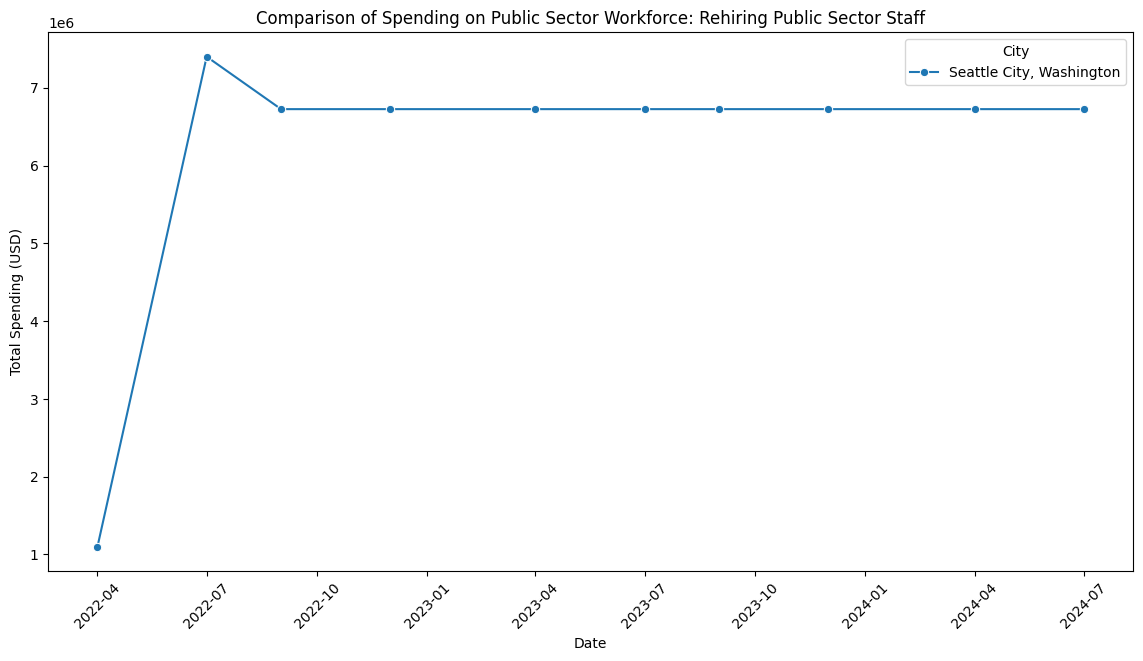

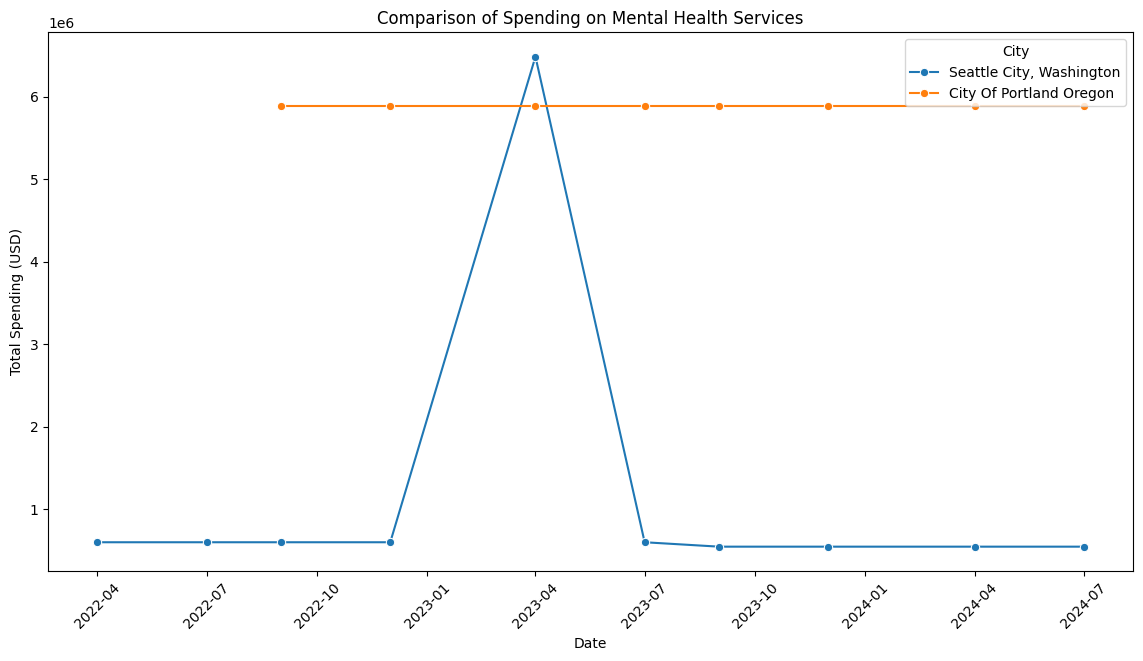

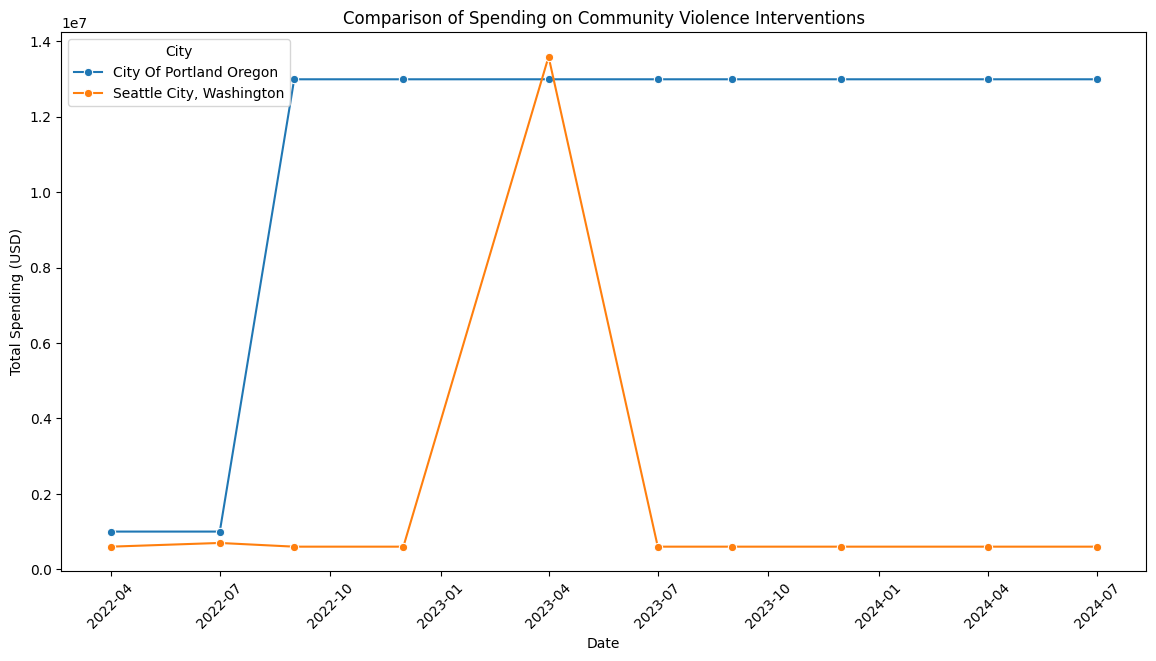

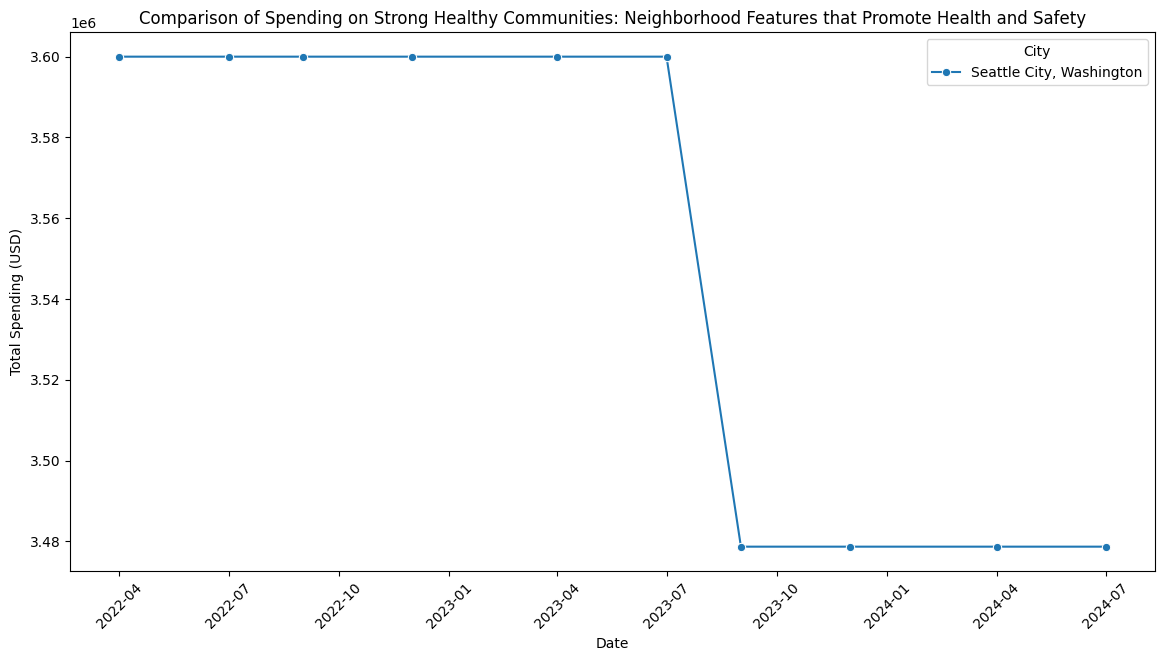

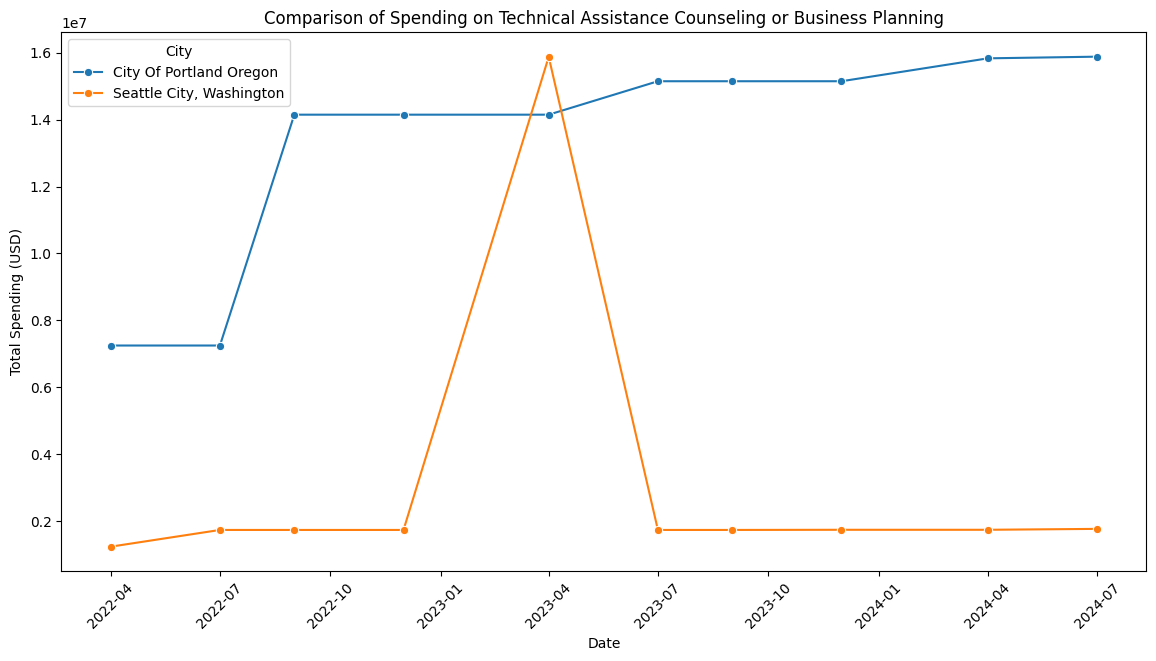

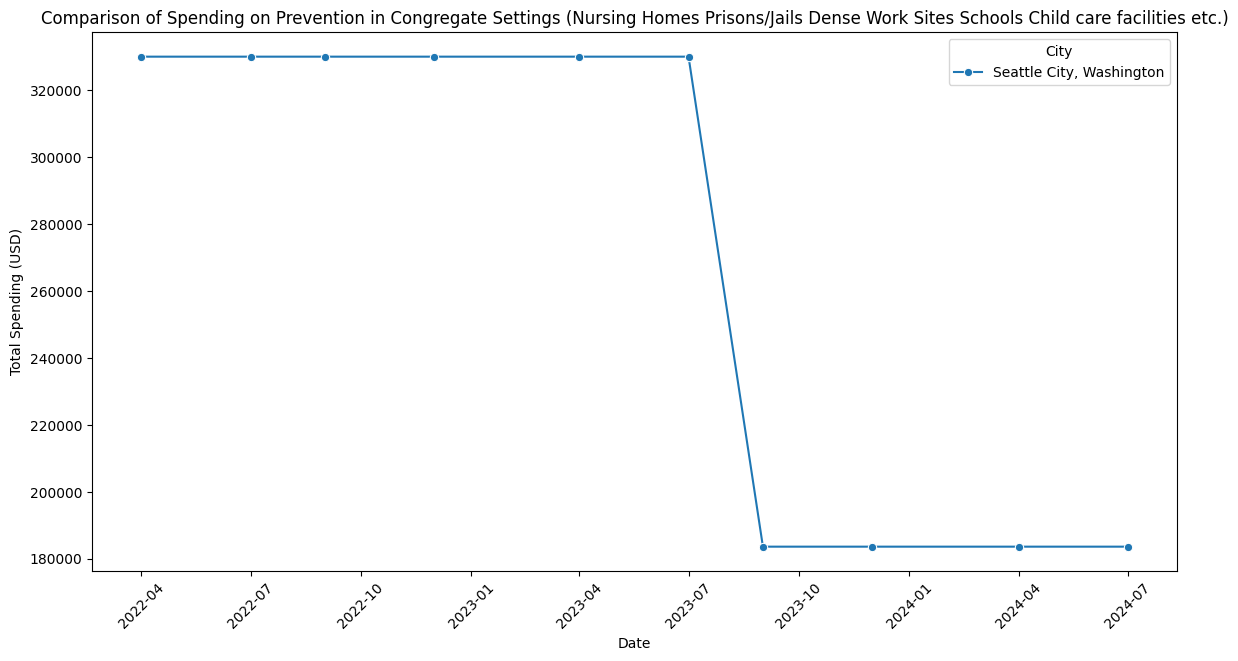

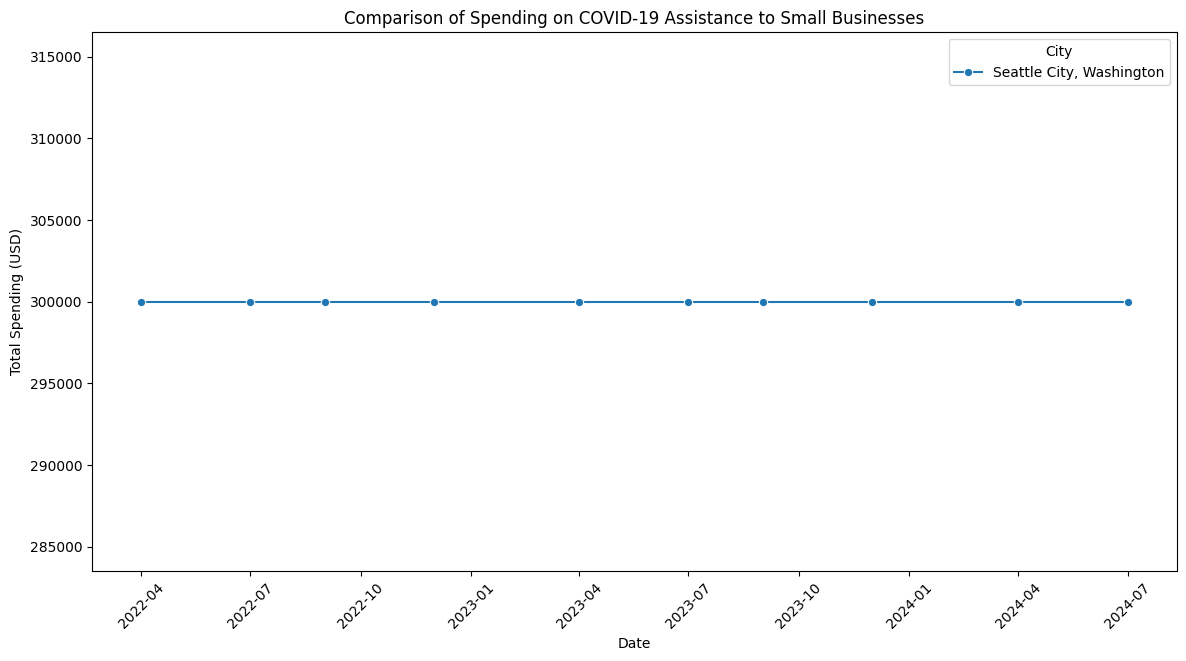

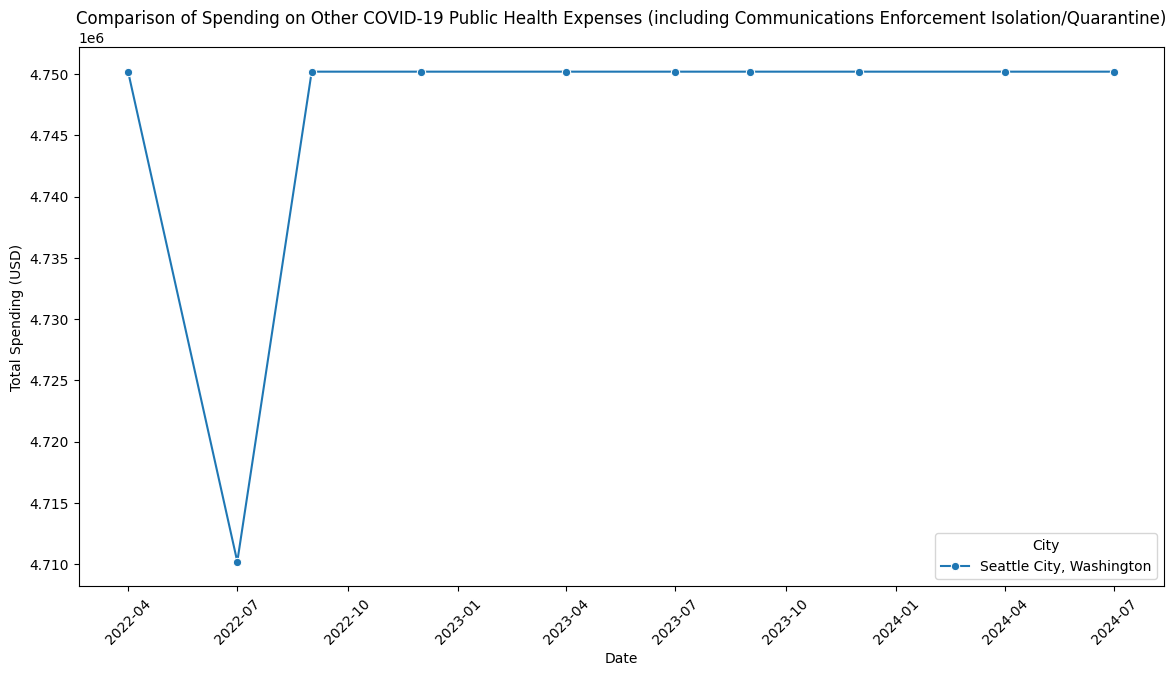

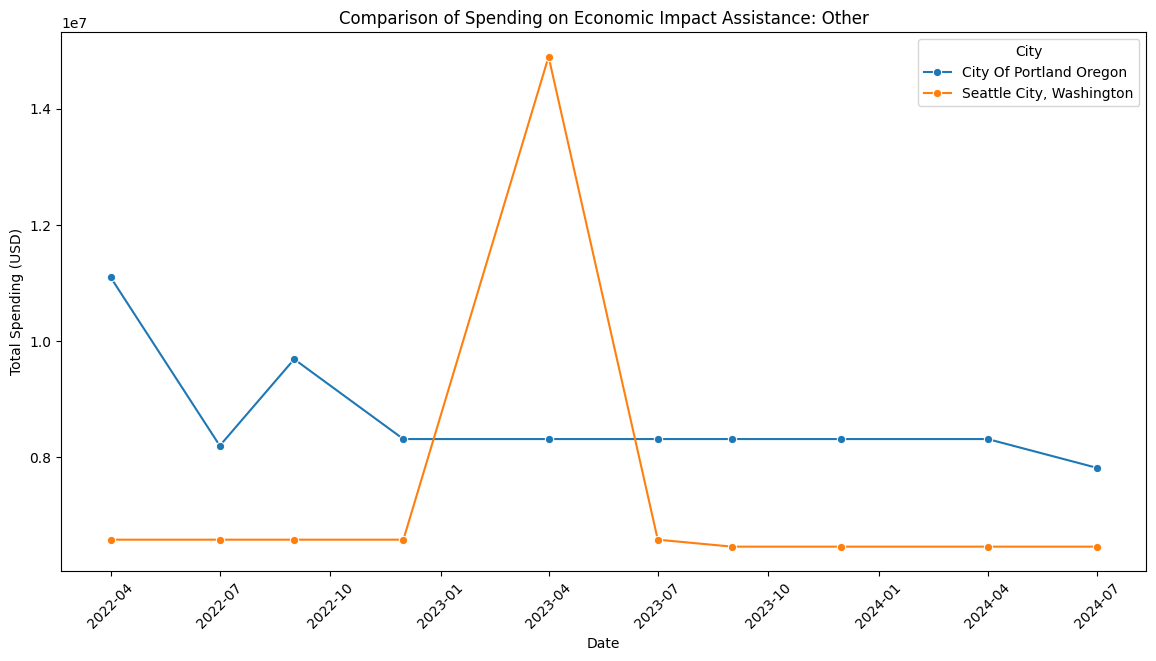

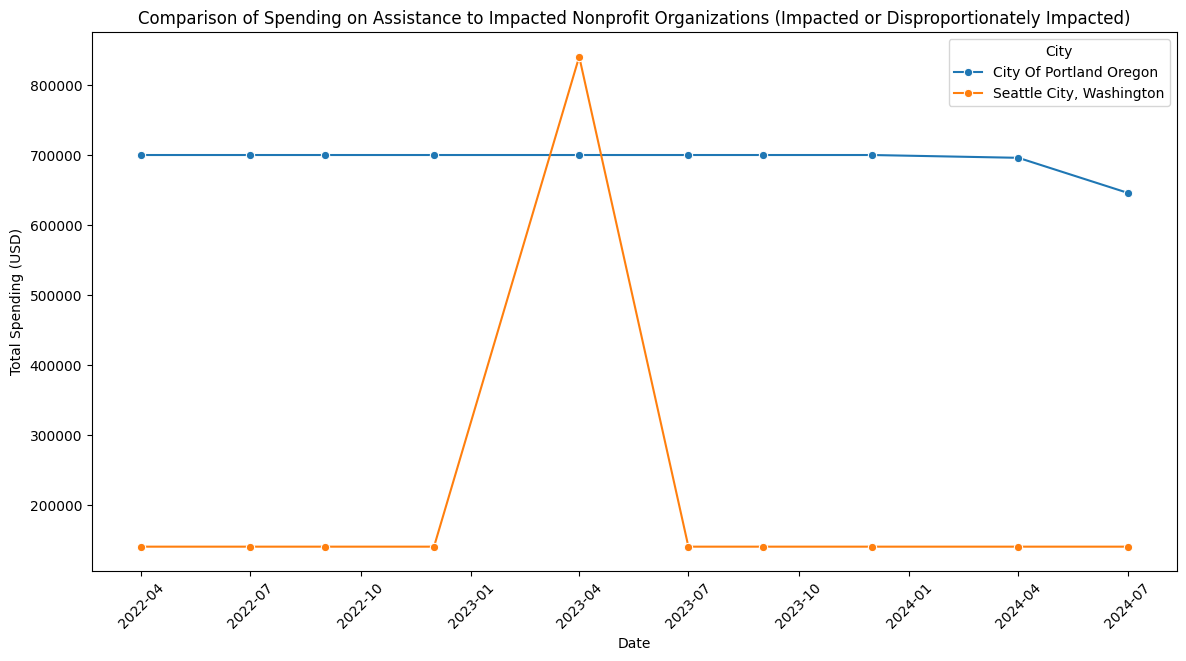

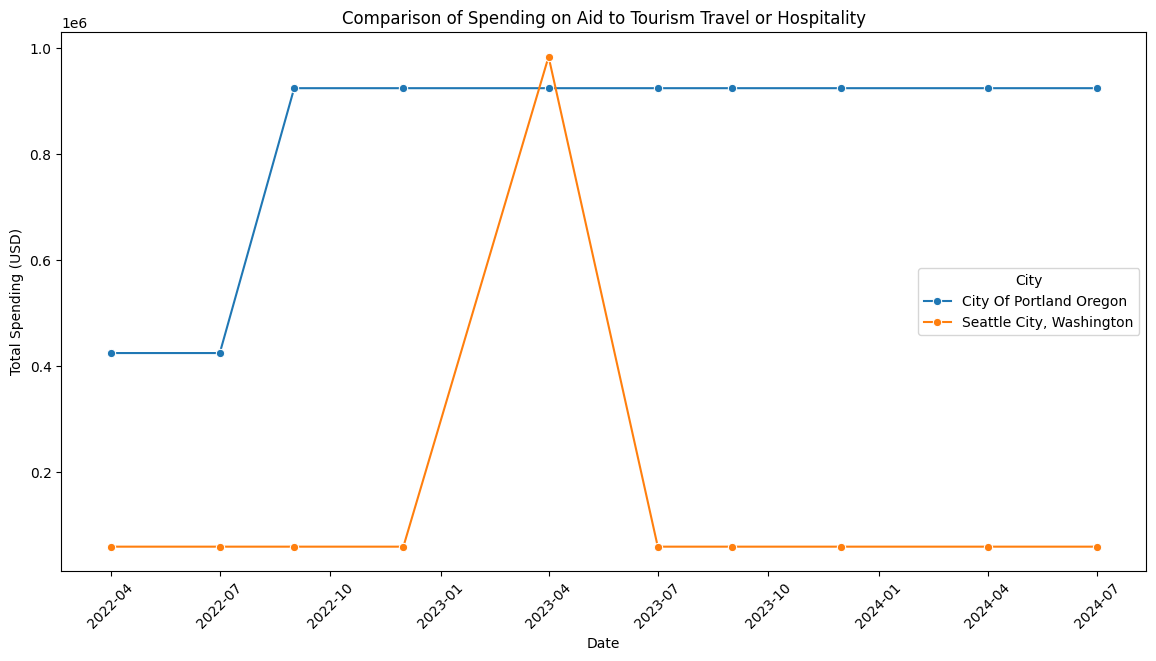

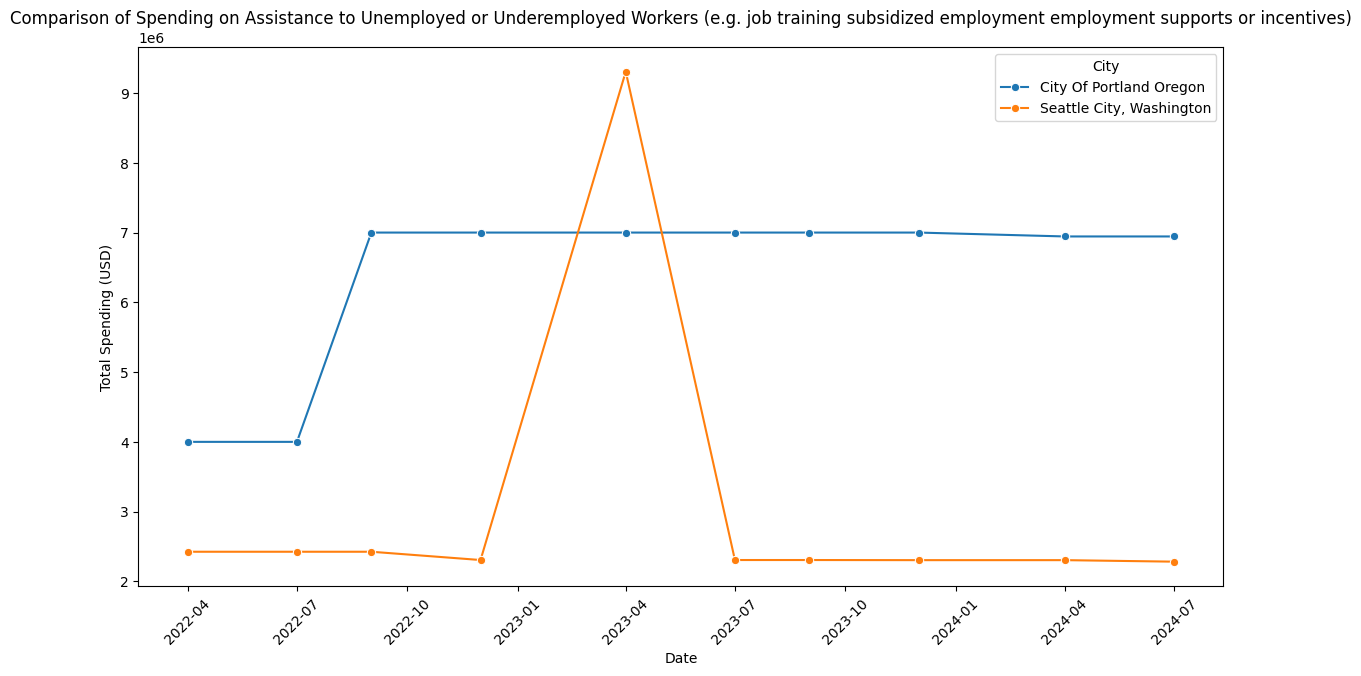

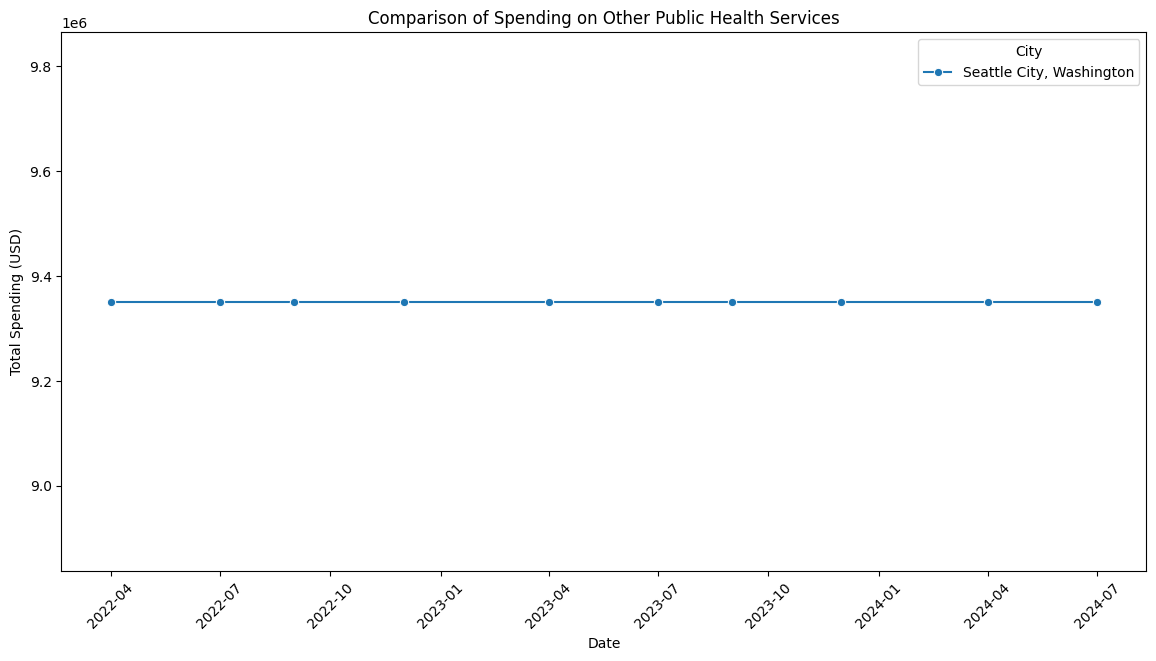

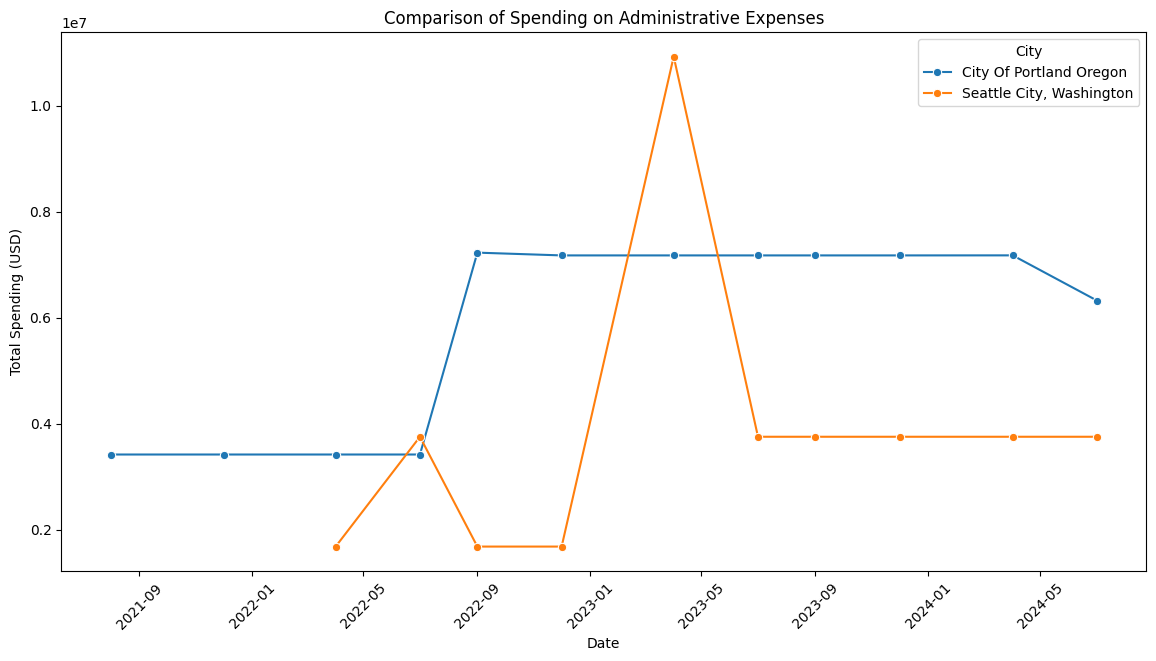

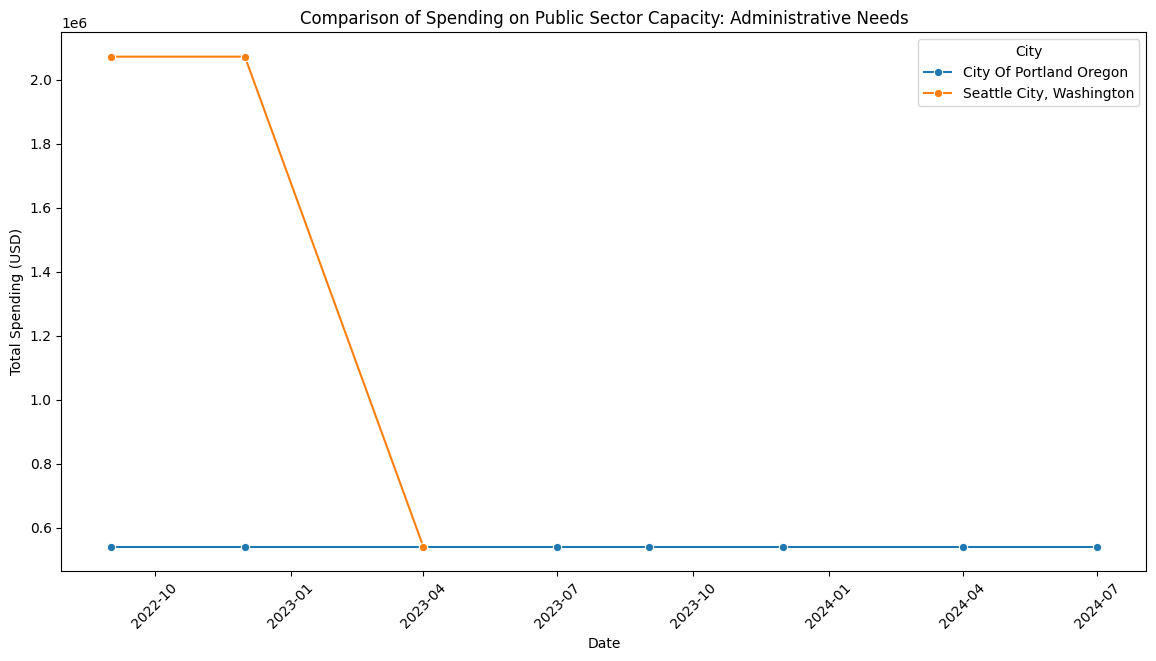

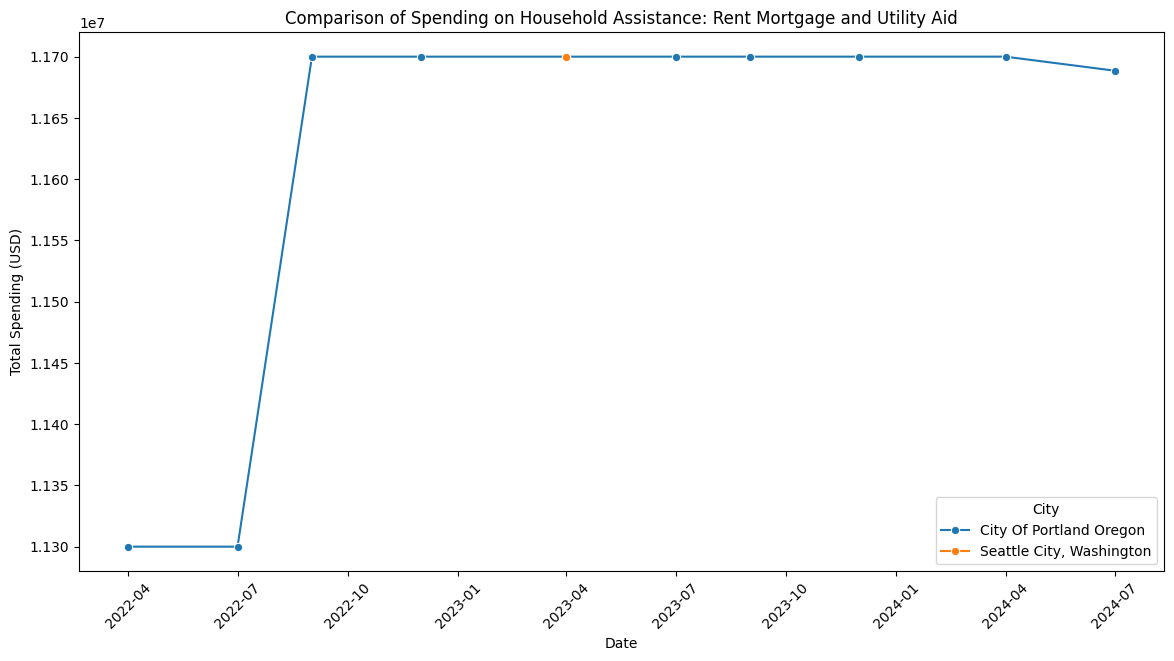

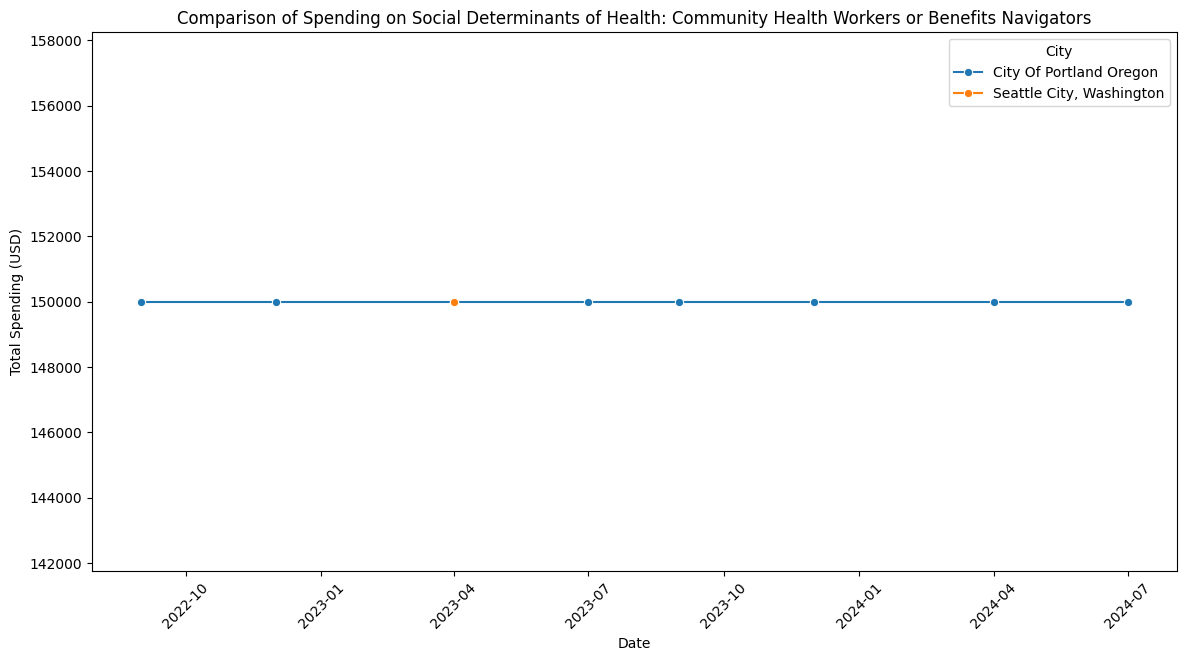

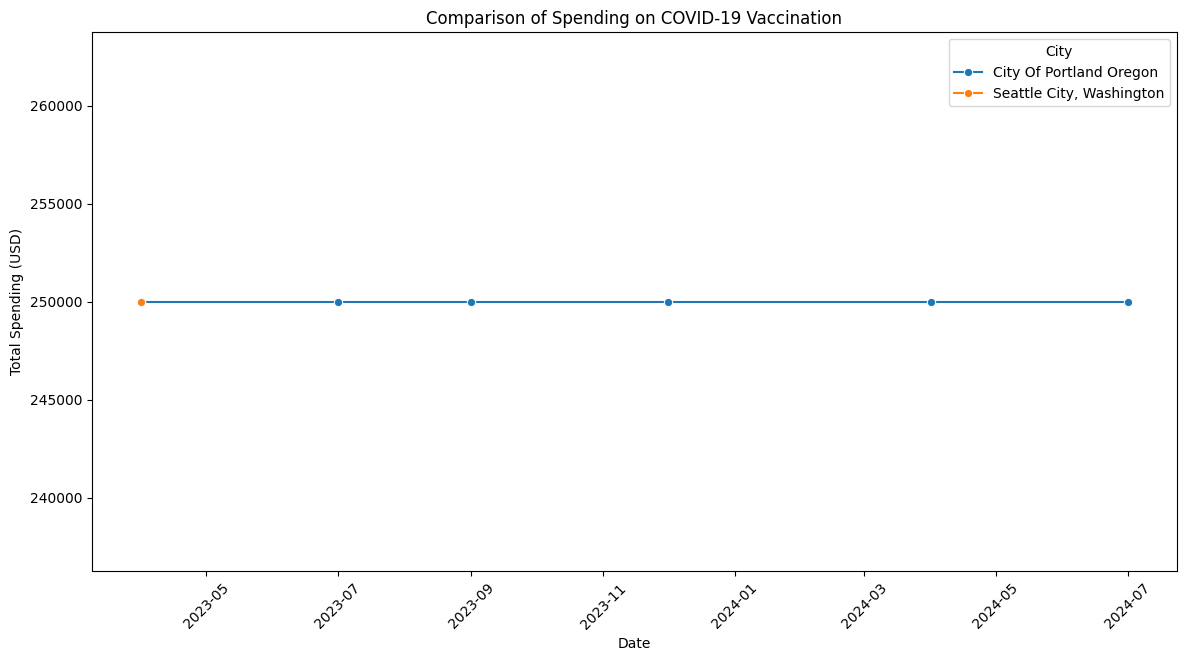

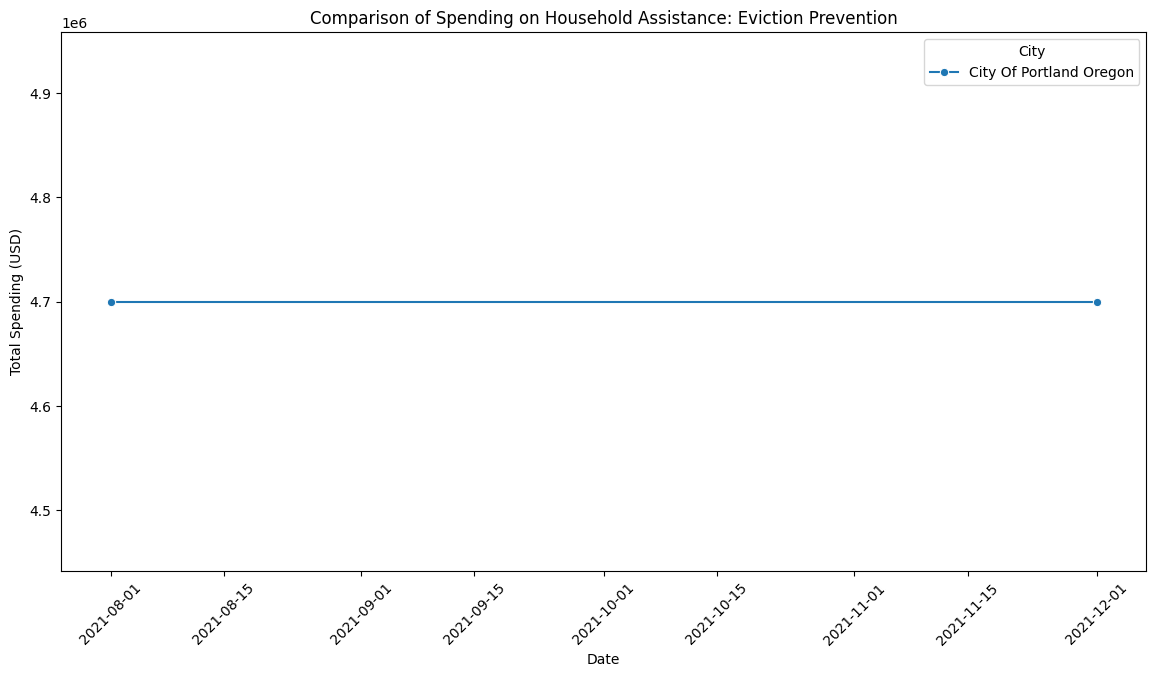

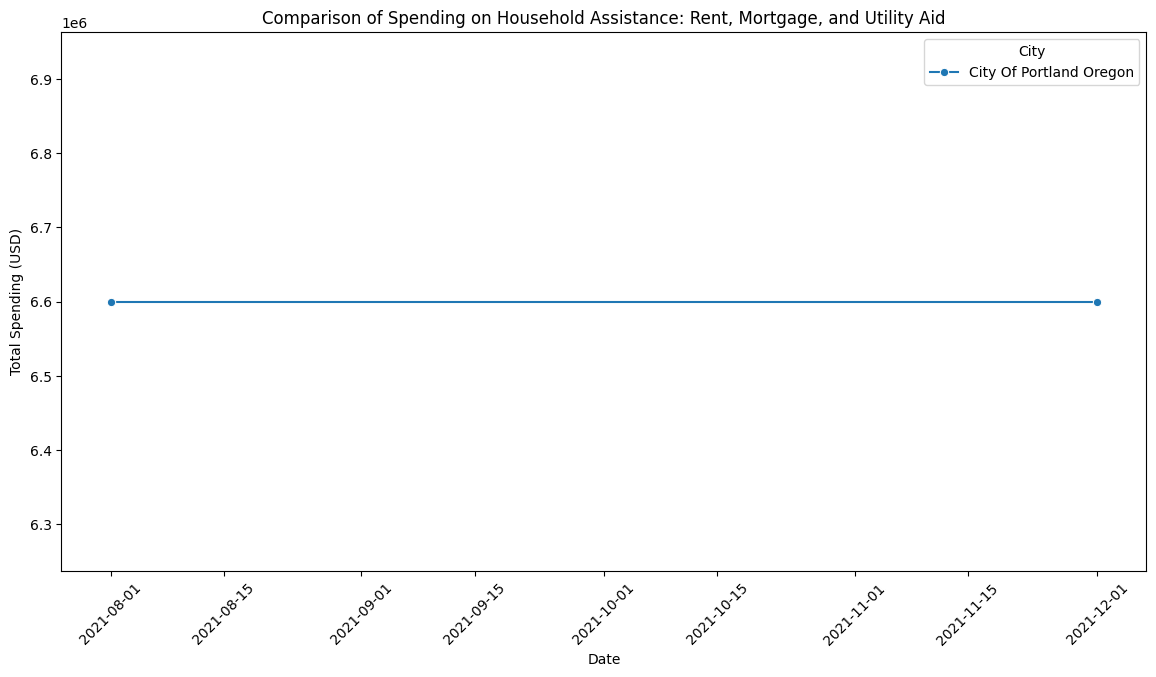

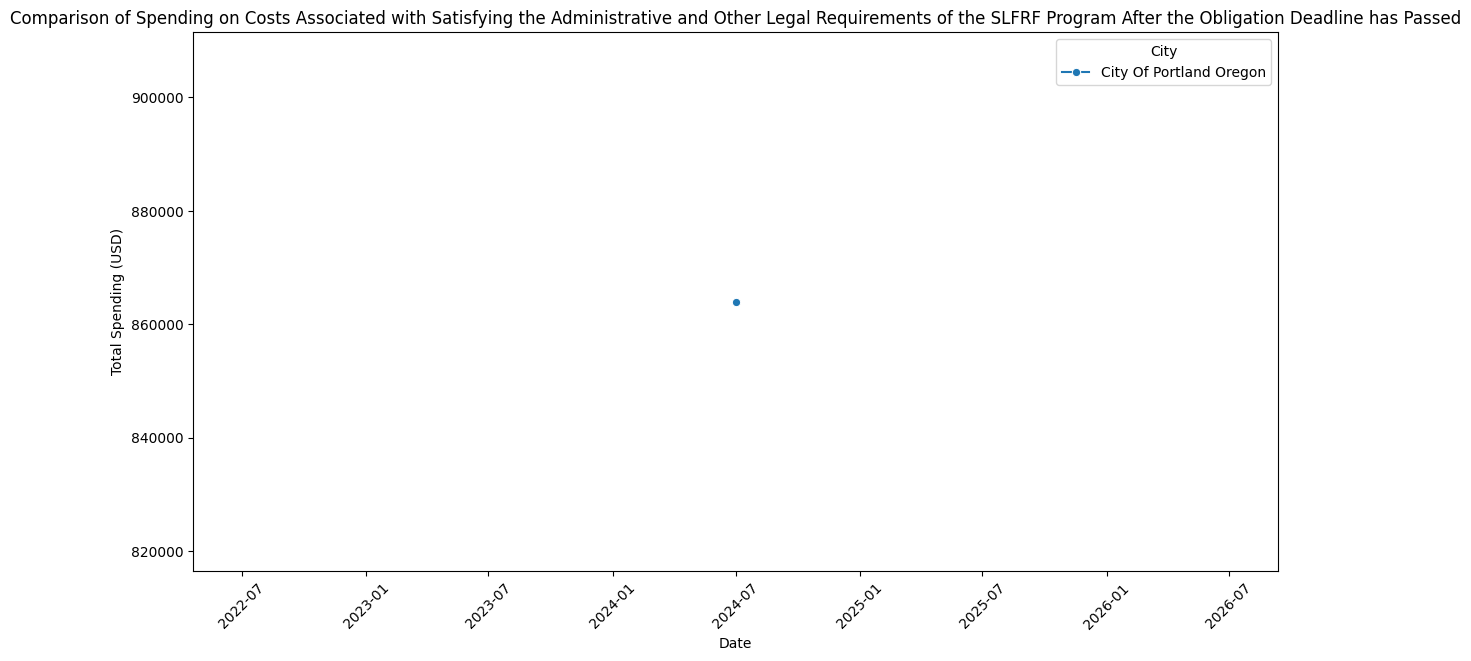

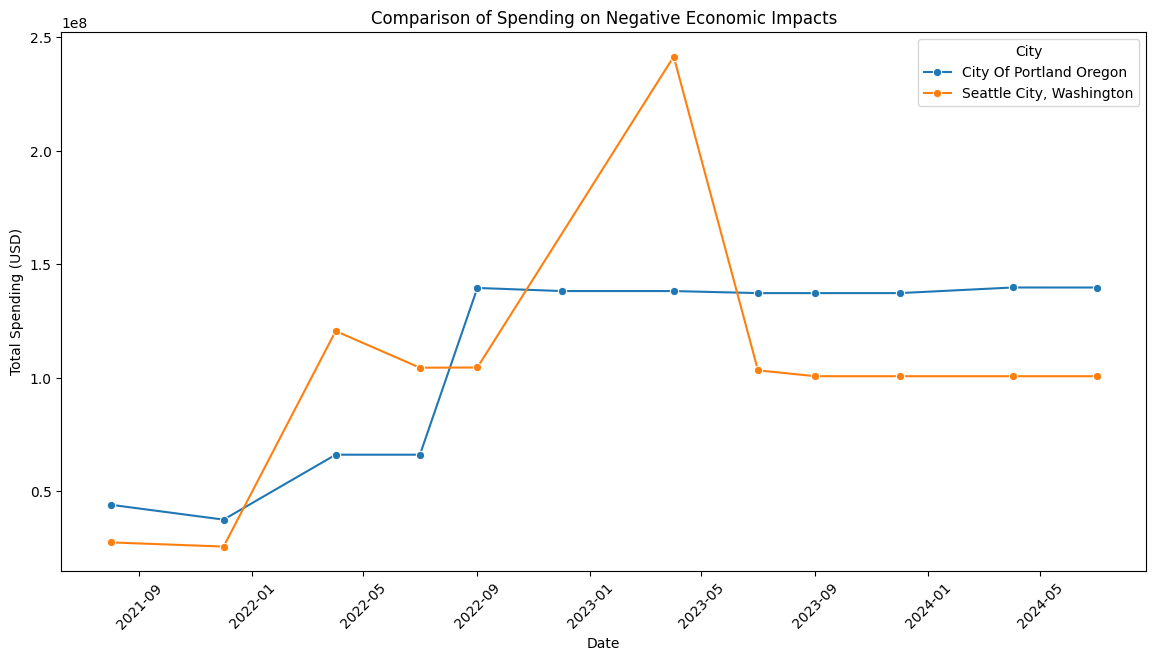

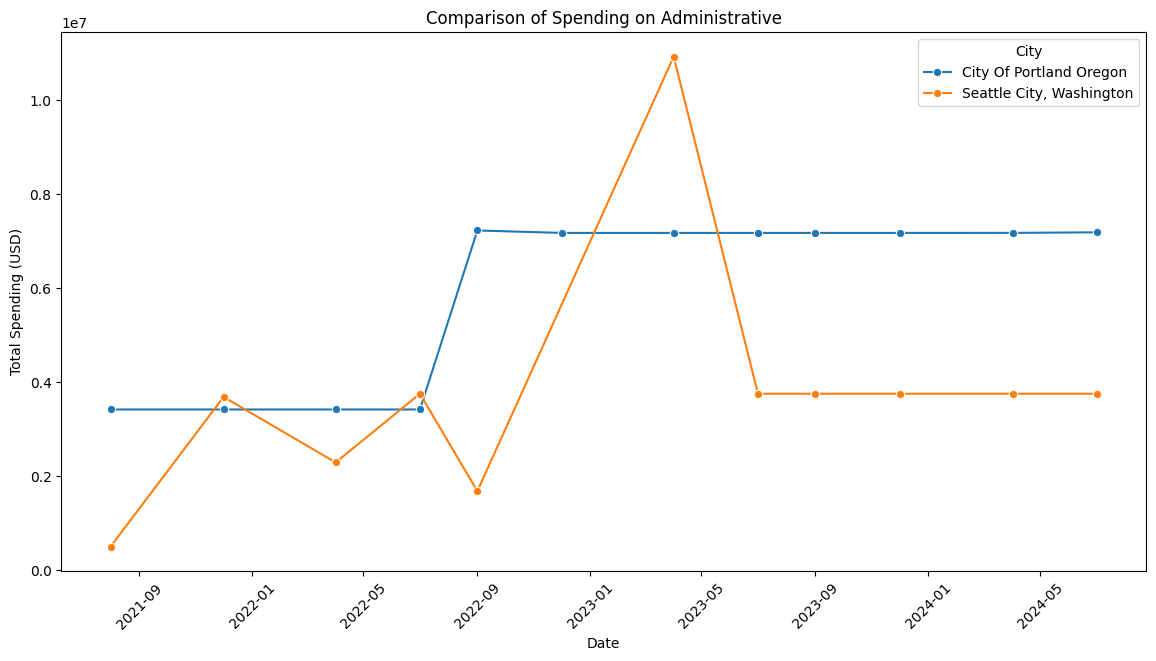

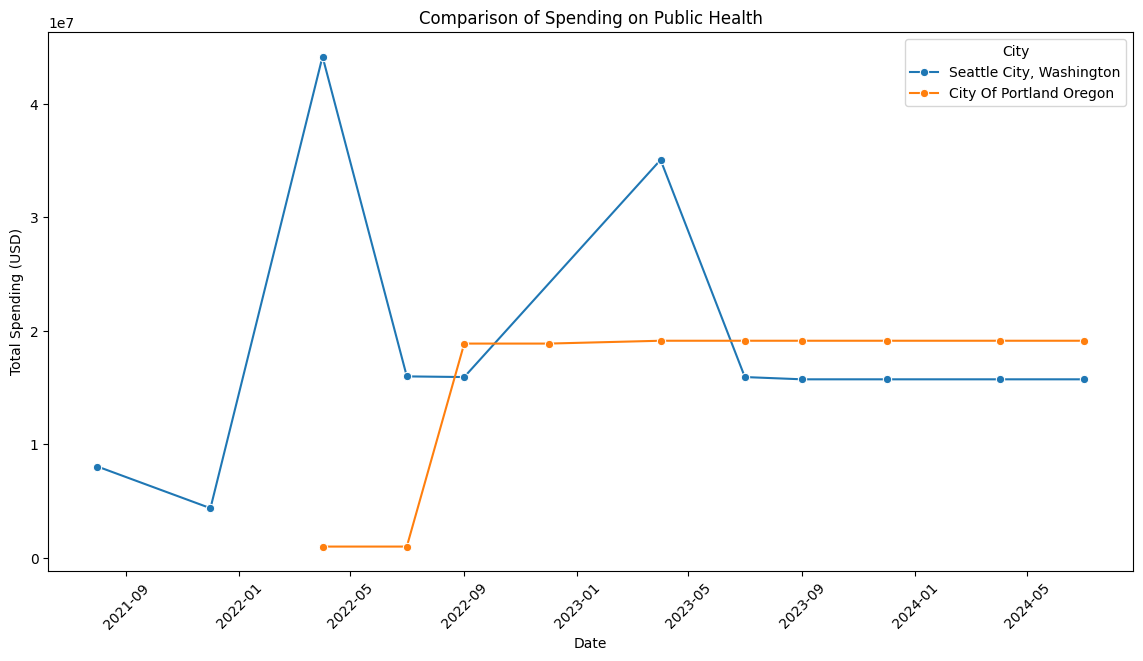

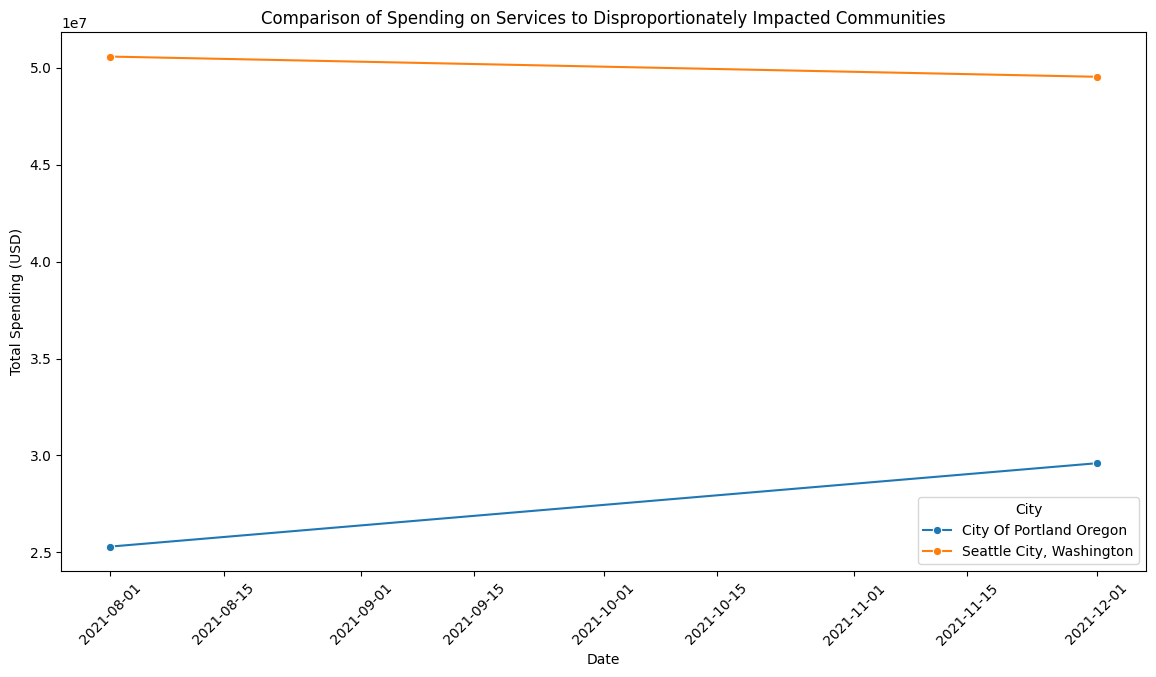

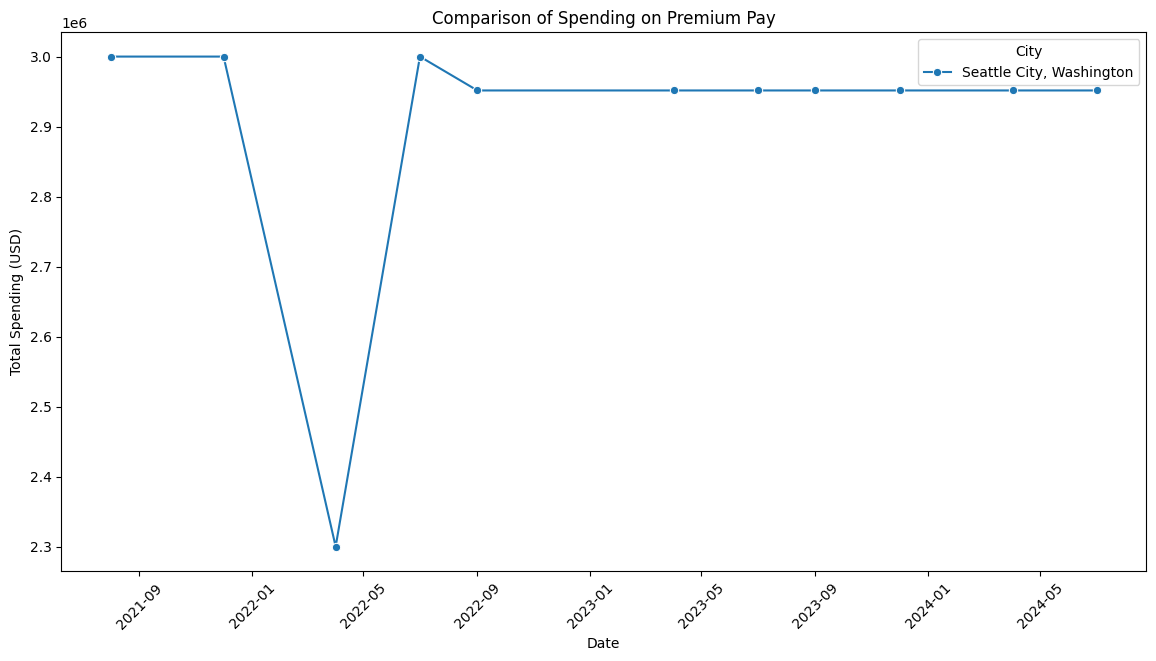

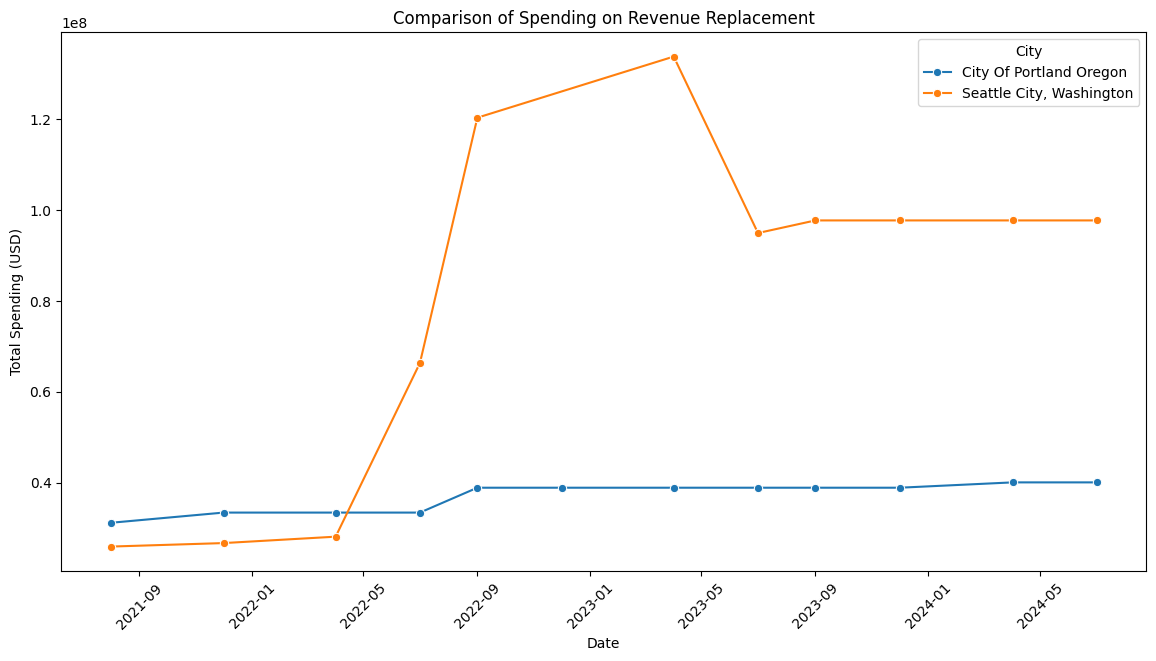

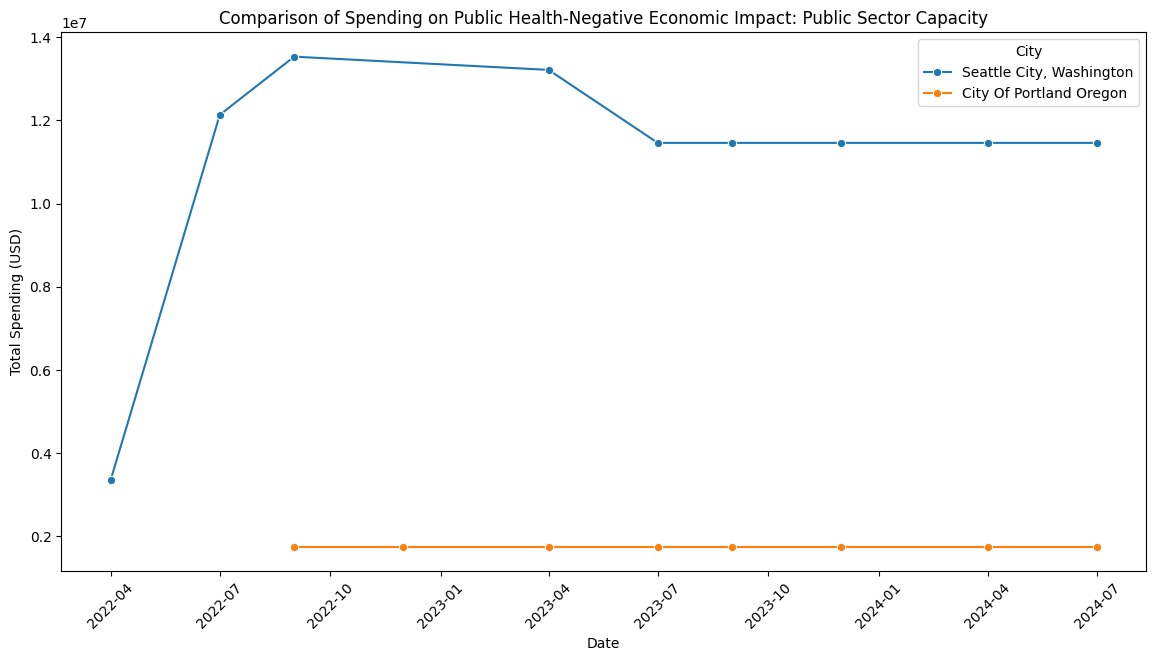

<ipython-input-6-370e0868f2aa>:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='City')


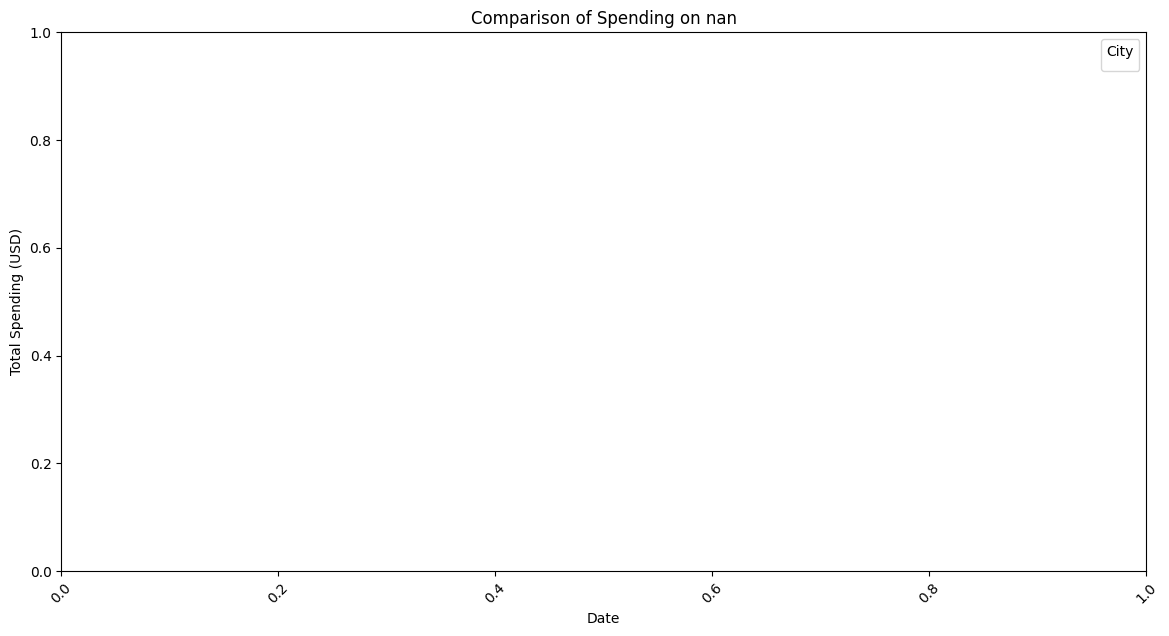

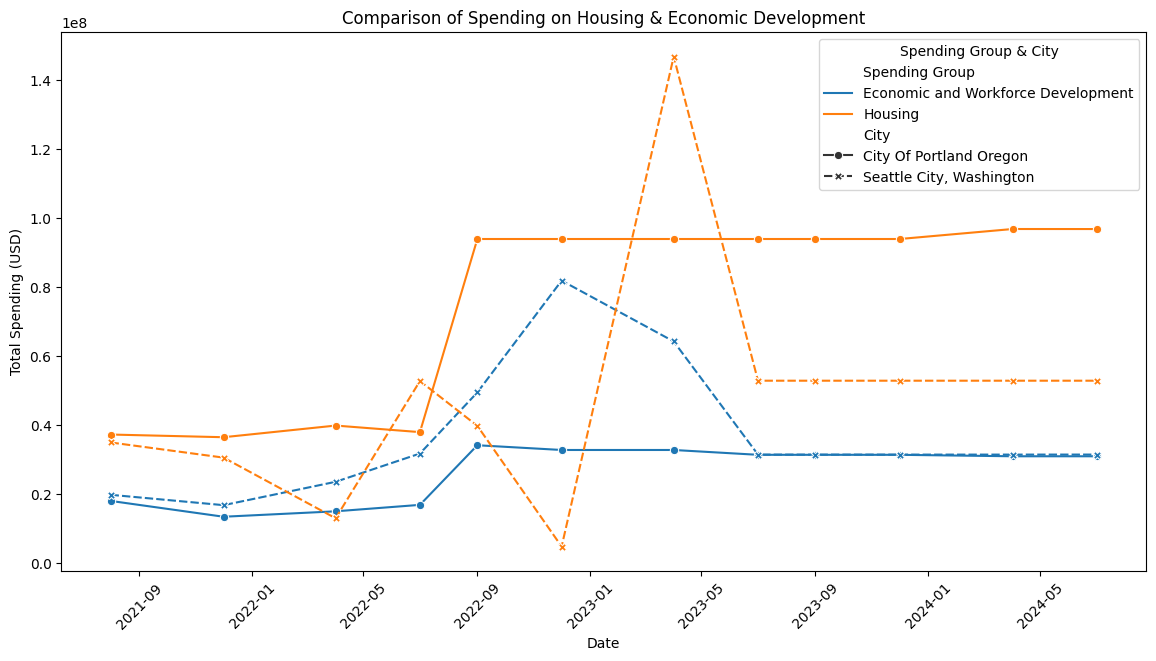

<ipython-input-6-370e0868f2aa>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_spending.index, y=monthly_spending.values, palette='viridis')


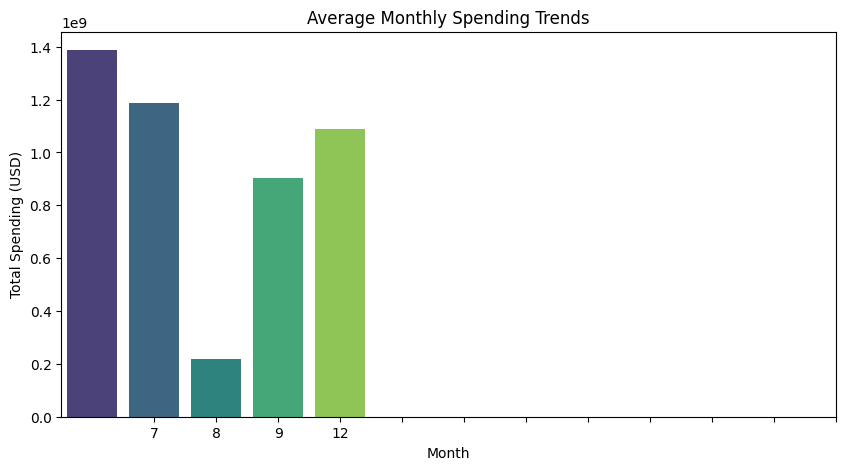

Date                      City                      Spending Group  \
0    2021-08-01  Seattle City, Washington                       Community aid   
1    2021-08-01  Seattle City, Washington  Government Operations Investments    
2    2021-08-01  Seattle City, Washington  Government Operations Investments    
3    2021-08-01  Seattle City, Washington  Government Operations Investments    
4    2021-08-01  Seattle City, Washington                       Community aid   
...         ...                       ...                                 ...   
1351 2024-07-01   City Of Portland Oregon                       Community Aid   
1352 2024-07-01   City Of Portland Oregon                       Public Safety   
1353 2024-07-01   City Of Portland Oregon  Economic and Workforce Development   
1354 2024-07-01   City Of Portland Oregon  Economic and Workforce Development   
1355 2024-07-01   City Of Portland Oregon  Economic and Workforce Development   

                        Spending Subgroup  \
0                       Nonprofit Support   
1             Other Government Investment   
2             Other Government Investment   
3     Government Employee Wages or Hiring   
4                     Other Community Aid   
...                                   ...   
1351                  Other Community Aid   
1352                  Other Public Safety   
1353                 Economic Development   
1354                 Economic Development   
1355               Small Business Support   

                                Treasury Spend Subgroup  \
0                        Aid to Nonprofit Organizations   
1                          Evaluation and Data Analysis   
2                          Evaluation and Data Analysis   
3                          Rehiring Public Sector Staff   
4                          Evaluation and Data Analysis   
...                                                 ...   
1351  Social Determinants of Health: Community Healt...   
1352               Aid to Tourism Travel or Hospitality   
1353                  Economic Impact Assistance: Other   
1354                  Economic Impact Assistance: Other   
1355     Loans or Grants to Mitigate Financial Hardship   

           Treausry Spend Group      Amount  
0     Negative Economic Impacts   200000.00  
1                Administrative   175000.00  
2                Administrative   100000.00  
3     Negative Economic Impacts  1100000.00  
4                Administrative   225000.00  
...                         ...         ...  
1351  Negative Economic Impacts   150000.00  
1352  Negative Economic Impacts   500000.00  
1353  Negative Economic Impacts   144429.27  
1354  Negative Economic Impacts  1125000.00  
1355  Negative Economic Impacts  3445570.73  

[1356 rows x 7 columns]

In [6]:
from IPython import get_ipython
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it is uploaded to Google Colab)
file_path = '/content/Seattle Portland Time Series Data.V1.csv'
df = pd.read_csv(file_path)

# Standardizing Month Abbreviations
month_corrections = {
    "Sept": "Sep"
}
df['Date'] = df['Date'].replace(month_corrections, regex=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y', errors='coerce')

# Display rows with parsing errors
if df['Date'].isnull().sum() > 0:
    print("Warning: Some date values could not be converted. Check for inconsistencies.")
    display(df[df['Date'].isnull()])

# Ensure 'Amount' is numeric
df['Amount'] = df['Amount'].replace({',': ''}, regex=True).astype(float)

# Check for missing values
display(df.isnull().sum())

# Aggregate total spending by city over time
city_spending = df.groupby(['Date', 'City'])['Amount'].sum().reset_index()

# Plot total spending trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_spending, x='Date', y='Amount', hue='City', marker='o')
plt.title('Total Spending Over Time by City')
plt.xlabel('Date')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

# Aggregate spending by high-level category (Spending Group)
category_spending = df.groupby(['Date', 'Spending Group'])['Amount'].sum().reset_index()

# Plot spending trends by category
plt.figure(figsize=(14, 7))
sns.lineplot(data=category_spending, x='Date', y='Amount', hue='Spending Group', marker='o')
plt.title('Spending Trends by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.legend(title='Spending Group', bbox_to_anchor=(1, 1))
plt.show()

# Compare spending on all Spending Groups
spending_groups = df['Spending Group'].unique()
for group in spending_groups:
    filtered_df = df[df['Spending Group'] == group]
    group_city_spending = filtered_df.groupby(['Date', 'City'])['Amount'].sum().reset_index()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=group_city_spending, x='Date', y='Amount', hue='City', marker='o')
    plt.title(f'Comparison of Spending on {group}')
    plt.xlabel('Date')
    plt.ylabel('Total Spending (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.show()

# Compare spending on all Spending Subgroups
spending_subgroups = df['Spending Subgroup'].unique()
for subgroup in spending_subgroups:
    filtered_df = df[df['Spending Subgroup'] == subgroup]
    subgroup_city_spending = filtered_df.groupby(['Date', 'City'])['Amount'].sum().reset_index()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=subgroup_city_spending, x='Date', y='Amount', hue='City', marker='o')
    plt.title(f'Comparison of Spending on {subgroup}')
    plt.xlabel('Date')
    plt.ylabel('Total Spending (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.show()

# Compare spending on all Treasury Spend Subgroups
treasury_spend_subgroups = df['Treasury Spend Subgroup'].unique()
for subgroup in treasury_spend_subgroups:
    filtered_df = df[df['Treasury Spend Subgroup'] == subgroup]
    subgroup_city_spending = filtered_df.groupby(['Date', 'City'])['Amount'].sum().reset_index()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=subgroup_city_spending, x='Date', y='Amount', hue='City', marker='o')
    plt.title(f'Comparison of Spending on {subgroup}')
    plt.xlabel('Date')
    plt.ylabel('Total Spending (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.show()

# Compare spending on all Treasury Spend Groups
treasury_spend_groups = df['Treausry Spend Group'].unique()
for group in treasury_spend_groups:
    filtered_df = df[df['Treausry Spend Group'] == group]
    group_city_spending = filtered_df.groupby(['Date', 'City'])['Amount'].sum().reset_index()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=group_city_spending, x='Date', y='Amount', hue='City', marker='o')
    plt.title(f'Comparison of Spending on {group}')
    plt.xlabel('Date')
    plt.ylabel('Total Spending (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.show()

# Compare spending on key categories (e.g., Housing and Economic Development)
key_categories = ['Housing', 'Economic and Workforce Development']
filtered_df = df[df['Spending Group'].isin(key_categories)]
category_city_spending = filtered_df.groupby(['Date', 'City', 'Spending Group'])['Amount'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=category_city_spending, x='Date', y='Amount', hue='Spending Group', style='City', markers=True)
plt.title('Comparison of Spending on Housing & Economic Development')
plt.xlabel('Date')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.legend(title='Spending Group & City', bbox_to_anchor=(1, 1))
plt.show()

# Identify seasonal spending patterns
monthly_spending = df.groupby(df['Date'].dt.month)['Amount'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_spending.index, y=monthly_spending.values, palette='viridis')
plt.title('Average Monthly Spending Trends')
plt.xlabel('Month')
plt.ylabel('Total Spending (USD)')
plt.xticks(range(1, 13))
plt.show()

# Display final cleaned dataset
# Instead of using ace_tools, we use the IPython display function
display(df) # Display the DataFrame using the display function